In [2]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
#API key
api_key = "RGAPI-a905b251-7935-4d28-9321-85d9d72fdada" #Compte Slylio 
api_key2 = "RGAPI-86be80e4-14ed-49a4-939c-234d3f04d8b7" #Compte emilio
api_key3 = "RGAPI-2671fc10-105b-473e-a9aa-634fa03e20c1" #Compte projetML (username : projetlolML, password : projetlol56)


In [ ]:
#Multi-threading API calls function if bigger dataset needed


In [332]:
"""_summary_
    This function returns the summonerId of master + ranks players in europe west.
    
    _description_
    This function returns the summonerId of the player by using the API key.
    
    _parameters_
    api_key : str
        The API key that is used to authenticate the request
"""
    
def get_summonerId(api_key):
    challenger_url = 'https://euw1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key={}'.format(api_key) # Challanger ENDPOINT
    grandmaster_url = 'https://euw1.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5?api_key={}'.format(api_key) # Grandmaster EDNPOINT
    master_url = 'https://euw1.api.riotgames.com/lol/league/v4/masterleagues/by-queue/RANKED_SOLO_5x5?api_key={}'.format(api_key) # Master ENDPOINT

    league_url_lists = [challenger_url, grandmaster_url, master_url] # Creating a list with the 3 endpoints (master, grandmaster and challenger)

    df_list = [] # A list that will store the response from the get request (league_df)

    for url in league_url_lists: # Loop interation through league_url_lists
        resp = requests.get(url) # Sending a get request to the url
        league_df = pd.json_normalize(resp.json()['entries'])
        df_list.append(league_df)
    
    final_league_df = pd.concat(df_list) # Concatenating the stored information in league_url_lists to create the final_league_df

    return final_league_df

In [333]:
league_df = get_summonerId(api_key)
print('league_df has information about {} players between master and challenger elo'.format(league_df.shape[0]))

league_df has information about 17027 players between master and challenger elo


In [334]:
def get_summonerinfo_by_summonerId(df, api_key):
    
    summoner_list = [] # list that will store the each summoner_info DataFrame

    for i in range(len(df)): # len() get the numbers of rows of the match_ids parameter inserted. Then we use the range() function to create a sequence of number starting from 0 to number returned by len(). 
                            # With that we can interate trough each line in the match_ids dataframe (our function parameter) using the iloc function to get the matchid.

        # Creating a dynamic api_ulr for each register in the summonerId column using iloc
        api_url = 'https://euw1.api.riotgames.com/lol/summoner/v4/summoners/{}?api_key={}'.format(df['summonerId'].iloc[i],api_key)

        # Repeating the process we did at the begining
        resp = requests.get(api_url)
        print(resp.status_code)

        # if, elif and while true to deal with riot api rate limit
        if resp.status_code == 200:
            pass
        elif resp.status_code == 429:
            while True: # while loop because of riot api cost
                if resp.status_code == 429: #429 error is api cost issue
                    print('429 delay try 10 second') #approximate 10 second wait before trying again
                    time.sleep(10)

                    # Trying again
                    api_url = 'https://euw1.api.riotgames.com/lol/summoner/v4/summoners/{}?api_key={}'.format(df['summonerId'].iloc[i],api_key)
                    resp = requests.get(api_url)
                    print(resp.status_code)

                elif resp.status_code == 200:
                    print('limit cost resolve')
                    break

        summoner_info = pd.json_normalize(resp.json()) # The same process we did at the beggining to create the DataFrame
        summoner_list.append(summoner_info) # Appending the DataFrame generated (summoner_info) into the list "summoner_list"
        
    final_summoner_info = pd.concat(summoner_list) # Using pd.concat to concatenate the results stored in the list "summoner_list"
            
    return final_summoner_info
    

In [335]:
summoner_df = get_summonerinfo_by_summonerId(league_df[:100], api_key)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
200
limit cost resolve
200
200


In [336]:
summoner_df

id  \
0   3u1rw3EOBkcdcLFGq3YxDkNkoU01MB-ObHByt2GQrNaGHu...   
0   fvFjZocLsvd2uQxqaaG_H62iS508YXEcQT1qtHDN05Bw2l...   
0     9ihSOdyVg5l-oY41AicsGJxbrrZ0txdKzWi_wgFZhdi_v9s   
0     Lqj6_AMUQr55uEkDi0G1SrBbT-EDQW0YAjBea8bQs-Crhdg   
0    lbOIzg0iugyB4wR6bj38Es3eaanpWLK8hm8ibHF8nzPSSXW_   
..                                                ...   
0   0GW4zBAzzpDnrN9lQdyJ3GO8EmekWAXMu73ydKb5cKCMyG...   
0     R0fLvvprpWo7fuGAS3hi0AFYuOyDiIU4H4iU8KBRWl1y1h0   
0     aIs_QexMiogaRL36rImTnIhg9SGwHm7UEuryMzq9ZTDjkTI   
0     dRAZvpC4NyaMYEF2JK8e8JFJGEqoAesyB5OMarzwRWcXi7Q   
0   k92cGL_2DUMTrGiw_x1IrHQelyq92bHpzmir1TVNN4is8l...   

                                            accountId  \
0   sW0fGVVG_EaMQ5ryVz-cLDiZhsvHH49kEmrhBZKn7BGuXK...   
0   eOF_U8sP9EfqgxQ2sxBvfpAMcef99cYQ53uzK1E8SMFT-y...   
0      puurjS_iOaWi5XadUiRa_pNLrhtiLxfBOy6jFozo0X2Kcw   
0     SvMwZyVQfJxiT9w4bpfR_cqfu1qZ10z3mBgA0leQRDSiUXY   
0   MpPOH_wRFX8V6xqF18p29SmNLVq52TnrShkP1ewOywIe_w...   
..                                                ...   
0   HOt7Jm2hX2k4fOW1Kf9lSQqh45E6fk-HMY-_loZ7jxBr1j...   
0      aorh5GX_1bJPF7q2k10A58yv3ycyk25Va9qjMnNcPHBL0Q   
0     7o56ffgQd86YXcFhyhnpB7YafZzYXH5P9oQmQmpfuf-ffkA   
0     _RIhchShnWeci2utwSA8ti33SfeQD69FSs_97y2TNN9HXc4   
0   nhxO0SzbK5K0kUOlzHlnZz0flHhiDAlmYFsTn8zpTEdJ7h...   

                                                puuid              name  \
0   j988F8cEgM0Q6ILCDcoCWIWF6Ms5gw88UycK6HOgpjkrHC...      vovalaclasse   
0   zW8xM65AQTs0vhu8vViLxBVkELwrE5V8o1N5SQ9PCp33cL...               zyb   
0   DG2FkblhxePfDI1q6jwduzl3ZiUUomz04g2xzZIm843H47...  Captain AmerEika   
0   4HH1AaFe6y65u2wFoYJqn9bwDJpcU8xUb5d1Jy9g6HUTzo...        papi oscar   
0   _P01LTyZ4DBR9VBQO_3h7HxiEJ-tAkATO9REBr5JEImHZX...           Six10 x   
..                                                ...               ...   
0   aXkwtzH2PyqySXgnA6oIlF8rm8FK_DxSD5HsNz-1oWS9aX...         mid díffy   
0   z4ktW-vhd4SDWlDXKUodFRsoO9d7K5umXdPCwDkwPRiqt-...        Vizícsacsi   
0   C5vV9H4swn3QXJSyeS29pUjL3IgmSwjGBci7nzUPVPL90k...      pocovirtuoso   
0   aQHsB3p_2ngueGMEVt73gG9PYQ16Kk7RBBhACTXh9XBNFo...     Walid Georgey   
0   K7d-Q94Q_AFjBzVpcxIQwXpNwW0YL2rvJYQP2wJR5nqUdN...  LPL DNA TEST ACC   

    profileIconId   revisionDate  summonerLevel  
0              29  1710427876943            218  
0            6446  1710502142635            217  
0            4834  1710434462512            855  
0            3458  1710499597475            985  
0            5775  1710439199583            190  
..            ...            ...            ...  
0               7  1709754672000             63  
0            5922  1710353040000            362  
0              24  1710503664985            434  
0            5169  1710500537383            770  
0              25  1710431286938            188  

[100 rows x 7 columns]

In [339]:
def get_matchids_by_puuid(df, api_key):

    matchids_list = []

    for i in range(len(df)):

        api_url = 'https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?queue=420&type=ranked&start=0&count=50&api_key={}'.format(df['puuid'].iloc[i], api_key)

        resp = requests.get(api_url) # Sending a get request to the api_url
        print(resp.json())

        if resp.status_code == 200:
            matchids = pd.DataFrame(resp.json(), columns=['matchid']) 
            matchids_list.append(matchids) # Appending the DataFrame generated to the list "matchids_list"
        elif resp.status_code == 429:
            while True: # while loop because of riot api cost
                if resp.status_code == 429: #429 error is api cost issue
                    print('429 delay try 100 second') #approximate 110 second wait
                    time.sleep(10)

                    api_url = 'https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?queue=420&type=ranked&start=0&count=50&api_key={}'.format(df['puuid'].iloc[i], api_key)
                    resp = requests.get(api_url)
                    print(resp.status_code)

                    if resp.status_code == 200:
                        matchids = pd.DataFrame(resp.json(), columns=['matchid']) 
                        matchids_list.append(matchids) # Appending the DataFrame generated to the list "matchids_list"
                        print('limit cost resolve')
                        break
                else:
                    break

    matchids_df = pd.concat(matchids_list) # Using pd.concat to concatenate the results stored in the "matchids_list"
    
    return matchids_df


In [340]:
matchids_df  = get_matchids_by_puuid(summoner_df, api_key)

['EUW1_6855764131', 'EUW1_6854703049', 'EUW1_6854653952', 'EUW1_6854609124', 'EUW1_6854488538', 'EUW1_6854067538', 'EUW1_6854005334', 'EUW1_6853968035', 'EUW1_6853828518', 'EUW1_6853619297', 'EUW1_6852755726', 'EUW1_6852709399', 'EUW1_6852662519', 'EUW1_6852589344', 'EUW1_6851432580', 'EUW1_6851095195', 'EUW1_6851033214', 'EUW1_6849571370', 'EUW1_6849522939', 'EUW1_6848988225', 'EUW1_6848087237', 'EUW1_6848036600', 'EUW1_6847991120', 'EUW1_6847954620', 'EUW1_6847879585', 'EUW1_6847822241', 'EUW1_6846618762', 'EUW1_6846311835', 'EUW1_6846273577', 'EUW1_6845377842', 'EUW1_6845149601', 'EUW1_6845112231', 'EUW1_6845045754', 'EUW1_6844674704', 'EUW1_6844649898', 'EUW1_6844603231', 'EUW1_6844568148', 'EUW1_6844520145', 'EUW1_6844306460', 'EUW1_6844230189', 'EUW1_6844184844', 'EUW1_6844130643', 'EUW1_6844036270', 'EUW1_6843991617', 'EUW1_6843952833', 'EUW1_6843922936', 'EUW1_6842452152', 'EUW1_6842427531', 'EUW1_6840340156', 'EUW1_6840056419']
['EUW1_6856835404', 'EUW1_6856452395', 'EUW1_6855

In [342]:
#Remove duplicates
size_before = matchids_df.shape[0]
matchids_df = matchids_df.drop_duplicates()
size_after = matchids_df.shape[0]
print('Removed {} duplicates'.format(size_before - size_after))
print('matchids_df has information about {} matches'.format(matchids_df.shape[0]))

Removed 0 duplicates
matchids_df has information about 3846 matches


In [343]:
matchids_df.reset_index(inplace=True)
matchids_df.drop(columns = 'index', inplace = True )
matchids_df

matchid
0     EUW1_6855764131
1     EUW1_6854703049
2     EUW1_6854653952
3     EUW1_6854609124
4     EUW1_6854488538
...               ...
3841  EUW1_6851713183
3842  EUW1_6851696996
3843  EUW1_6851685736
3844  EUW1_6850406336
3845  EUW1_6850334118

[3846 rows x 1 columns]

In [344]:
matchids_df.to_csv('matchids.csv', index = False)

In [345]:
def get_match_info_by_matchId(match_ids, api_key):

    matchid_info_list = [] # List that will store the dataframes generated, for each match id in the for loop 

    for i in range(len(match_ids)):# len() get the numbers of rows of the match_ids parameter inserted. Then we use the range() function to create a sequence of number starting from 0 to number returned by len(). 
                            # With that we can interate trough each line in the match_ids dataframe (our function parameter) using the iloc function to get the matchid.

        api_ulr = 'https://europe.api.riotgames.com/lol/match/v5/matches/{}?api_key={}'.format(match_ids['matchid'].iloc[i], api_key) # here we use the iloc function as explained above to form the api link for each matchid
        resp = requests.get(api_ulr) # Sending a get request to the api_url
        print(resp.status_code) # Printing the status_code of the request

        if resp.status_code == 200: # Here we need to use if statment, because of the riot API rate limit which is 20 requests every 1 sec and 100 requests every 2 minutes. A 200 status_code means that the request was successful so it can move on.
            pass                        
        elif resp.status_code == 429: # A 429 means that we have exceeded the rate limit. To solve that we need to wait and then try again to get a successful request
            while True: # To do taht we use a while true loop, to execute the if, elif statment repeatdly until the status_code is 200. After that we use break statement to come out of this loop.
                if resp.status_code == 429: 
                    print('429 delay try 10 second') #approximate 110 second wait to work
                    time.sleep(10) # Sleep

                    api_url = 'https://europe.api.riotgames.com/lol/match/v5/matches/{}?api_key={}'.format(match_ids['matchid'].iloc[i], api_key) # Trying the request again
                    resp = requests.get(api_url)
                    print(resp.status_code)

                elif resp.status_code == 200:
                    print('limit cost resolve')
                    break        

        # Same process we did in the beginning             
        matchid_info = pd.json_normalize(resp.json()['info']['participants'])
        matchid_info_list.append(matchid_info) # Merging all the dataframes generated and then stored in the matchid_info_list with the concat() function
        
    matchid_info_df = pd.concat(matchid_info_list)

    return matchid_info_df

In [347]:
matchs_info_df = get_match_info_by_matchId(matchids_df, api_key)

200
200
200
200
200
200
200
200
200
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
200
limit cost resolve
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
429
429 delay try 10 second
200
limit cost resolve
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
20

In [360]:
matchs_info_df
matchs_info_df.to_csv('matchs_info_2900.csv', index = False)


In [366]:
#print(matchs_info_df.columns.tolist())
"""
    Retire les colonnes inutiles (jugé par un expert de league of legends (Emilio))
"""

matchs_info_df = pd.read_csv('matchs_info_2900.csv')
#Move win column to index 1 (for easier debugging)
matchs_info_df = matchs_info_df[['win'] + [col for col in matchs_info_df.columns if col != 'win']]
toRemove = ['championId', 'championName', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'inhibitorsLost','item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'nexusKills','nexusLost','nexusTakedowns','participantId','placement','playerAugment1','playerAugment2','playerAugment3','playerAugment4', 'playerScore0', 'playerScore1', 'playerScore3', 'playerScore4', 'playerScore5', 'playerScore6', 'playerScore7', 'playerScore8', 'playerScore9', 'playerScore10', 'playerScore11', 'playerSubteamId', 'profileIcon', 'puuid', 'riotIdGameName', 'riotIdTagline', 'role', 'subteamPlacement', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'challenges.dancedWithRiftHerald', 'challenges.killsOnRecentlyHealedByAramPack', 'challenges.killsWithHelpFromEpicMonster', 'challenges.lostAnInhibitor', 'challenges.outnumberedNexusKill', 'challenges.poroExplosions', 'challenges.snowballsHit', 'challenges.unseenRecalls','missions.playerScore0','missions.playerScore1','missions.playerScore2','missions.playerScore3','missions.playerScore4','missions.playerScore5','missions.playerScore6','missions.playerScore7','missions.playerScore8','missions.playerScore9','missions.playerScore10','missions.playerScore11', 'perks.statPerks.defense', 'perks.statPerks.flex', 'perks.statPerks.offense', 'perks.styles', 'challenges.teleportTakedowns', 'challenges.highestCrowdControlScore', 'challenges.earliestBaron', 'eligibleForProgression', 'gameEndedInEarlySurrender', 'lane', 'largestCriticalStrike', 'nexusKills', 'nexusLost', 'nexusTakedowns','individualPosition', 'summonerId','challenges.legendaryItemUsed','challenges.moreEnemyJungleThanOpponent', 'challenges.legendaryItemUsed', 'summonerId', 'individualPosition']
matchs_info_df_non_filtre = matchs_info_df
print(matchs_info_df_non_filtre.columns)


Index(['win', 'allInPings', 'assistMePings', 'assists', 'baronKills',
       'basicPings', 'bountyLevel', 'champExperience', 'champLevel',
       'championTransform',
       ...
       'challenges.fastestLegendary', 'challenges.firstTurretKilledTime',
       'challenges.soloTurretsLategame', 'challenges.highestChampionDamage',
       'challenges.highestWardKills', 'challenges.thirdInhibitorDestroyedTime',
       'challenges.shortestTimeToAceFromFirstTakedown',
       'challenges.fasterSupportQuestCompletion',
       'challenges.earliestElderDragon', 'challenges.hadAfkTeammate'],
      dtype='object', length=207)


In [367]:
matchs_info_df = matchs_info_df.drop(columns=toRemove, axis=1, inplace=False)
print(matchs_info_df.columns)


KeyError: "['championId', 'championName', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'participantId', 'placement', 'playerAugment1', 'playerAugment2', 'playerAugment3', 'playerAugment4', 'playerScore0', 'playerScore1', 'playerScore3', 'playerScore4', 'playerScore5', 'playerScore6', 'playerScore7', 'playerScore8', 'playerScore9', 'playerScore10', 'playerScore11', 'playerSubteamId', 'profileIcon', 'puuid', 'riotIdGameName', 'riotIdTagline', 'role', 'subteamPlacement', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'challenges.dancedWithRiftHerald', 'challenges.killsOnRecentlyHealedByAramPack', 'challenges.killsWithHelpFromEpicMonster', 'challenges.lostAnInhibitor', 'challenges.outnumberedNexusKill', 'challenges.poroExplosions', 'challenges.snowballsHit', 'challenges.unseenRecalls', 'missions.playerScore0', 'missions.playerScore1', 'missions.playerScore2', 'missions.playerScore3', 'missions.playerScore4', 'missions.playerScore5', 'missions.playerScore6', 'missions.playerScore7', 'missions.playerScore8', 'missions.playerScore9', 'missions.playerScore10', 'missions.playerScore11', 'perks.statPerks.defense', 'perks.statPerks.flex', 'perks.statPerks.offense', 'perks.styles', 'challenges.teleportTakedowns', 'challenges.highestCrowdControlScore', 'challenges.earliestBaron', 'eligibleForProgression', 'gameEndedInEarlySurrender', 'lane', 'largestCriticalStrike', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'individualPosition', 'summonerId', 'challenges.legendaryItemUsed', 'challenges.moreEnemyJungleThanOpponent', 'challenges.legendaryItemUsed', 'summonerId', 'individualPosition'] not found in axis"

In [368]:
#
matchs_info_test = matchs_info_df.groupby(np.arange(len(matchs_info_df))//5).sum()
pd.set_option('display.max_columns', None)

matchs_info_test

win  allInPings  assistMePings  assists  baronKills  basicPings  \
0       5          10             52       53           2           0   
1       0           0             21       56           0           0   
2       5           4              7       74           1           0   
3       0           0             22       36           0           0   
4       0           0             28       23           0           0   
...   ...         ...            ...      ...         ...         ...   
7681    0          16             39       27           0           0   
7682    0           5              8       16           0           0   
7683    5          14             29       37           1           0   
7684    0           1              4       28           0           0   
7685    5           5             28       56           1           0   

      bountyLevel  champExperience  champLevel  championTransform  \
0              16            76252          78                  0   
1               0            65874          73                  0   
2               9            72084          77                  2   
3               0            58202          68                  2   
4               0            44885          59                  0   
...           ...              ...         ...                ...   
7681            0            63306          72                  0   
7682            0            49733          63                  0   
7683           15            69770          75                  0   
7684            0            55555          68                  0   
7685           10            68334          75                  0   

      commandPings  consumablesPurchased  damageDealtToBuildings  \
0               82                    33                   16971   
1               23                    16                   10820   
2               28                    18                   25142   
3               44                    11                    6090   
4               34                    19                   12308   
...            ...                   ...                     ...   
7681            59                    21                    8509   
7682            38                    10                    5558   
7683            37                    20                   25171   
7684             8                    26                    1912   
7685            77                    27                   28127   

      damageDealtToObjectives  damageDealtToTurrets  damageSelfMitigated  \
0                       80671                 16971               143109   
1                       63552                 10820               101925   
2                       89125                 25142                84676   
3                       29829                  6090                97738   
4                       38095                 12308                94651   
...                       ...                   ...                  ...   
7681                    29656                  8509                68300   
7682                    26607                  5558                88853   
7683                   100292                 25171                58541   
7684                    29152                  1912                71193   
7685                    74615                 28127                61616   

      dangerPings  deaths  detectorWardsPlaced  doubleKills  dragonKills  \
0               0      33                   23            3            1   
1               0      30                    8            1            3   
2               0      24                    6            6            1   
3               0      51                    3            3            2   
4               0      31                    6            2            0   
...           ...     ...                  ...          ...          ...   
7681            0      40             

In [369]:
#On récupère les deux équipes pour pouvoir les mettre sur la même ligne et avoir une ligne = un match
equipes_1 = matchs_info_test.iloc[::2]
equipes_1.reset_index(inplace=True)
equipes_1.drop(columns = 'index', inplace = True)

equipes_2 = matchs_info_test.iloc[1::2]
equipes_2.reset_index(inplace=True)
equipes_2.drop(columns = 'index', inplace = True)



/tmp/ipykernel_5223/2589628194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipes_1.drop(columns = 'index', inplace = True)
/tmp/ipykernel_5223/2589628194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipes_2.drop(columns = 'index', inplace = True)


In [370]:
equipes_1

win  allInPings  assistMePings  assists  baronKills  basicPings  \
0       5          10             52       53           2           0   
1       5           4              7       74           1           0   
2       0           0             28       23           0           0   
3       0           1              4       15           0           0   
4       5          13             51       54           1           0   
...   ...         ...            ...      ...         ...         ...   
3838    0           0             37       66           1           0   
3839    0           6             32       53           0           0   
3840    5           6             48       53           1           0   
3841    0           5              8       16           0           0   
3842    0           1              4       28           0           0   

      bountyLevel  champExperience  champLevel  championTransform  \
0              16            76252          78                  0   
1               9            72084          77                  2   
2               0            44885          59                  0   
3               1            51233          64                  0   
4               1            73516          77                  0   
...           ...              ...         ...                ...   
3838            1            74780          78                  0   
3839            0            70681          75                  0   
3840           10            75051          78                  0   
3841            0            49733          63                  0   
3842            0            55555          68                  0   

      commandPings  consumablesPurchased  damageDealtToBuildings  \
0               82                    33                   16971   
1               28                    18                   25142   
2               34                    19                   12308   
3               37                    13                   10292   
4               97                    38                   17393   
...            ...                   ...                     ...   
3838            40                    26                    8412   
3839            58                    18                    5308   
3840            43                    20                   29850   
3841            38                    10                    5558   
3842             8                    26                    1912   

      damageDealtToObjectives  damageDealtToTurrets  damageSelfMitigated  \
0                       80671                 16971               143109   
1                       89125                 25142                84676   
2                       38095                 12308                94651   
3                       44376                 10292                66732   
4                       37231                 17393               122815   
...                       ...                   ...                  ...   
3838                    48310                  8412               195351   
3839                    43028                  5308               115893   
3840                    94259                 29850               103114   
3841                    26607                  5558                88853   
3842                    29152                  1912                71193   

      dangerPings  deaths  detectorWardsPlaced  doubleKills  dragonKills  \
0               0      33                   23            3            1   
1               0      24                    6            6            1   
2               0      31                    6            2            0   
3               0      41                    6            0            0   
4               0      36                   23            3            0   
...           ...     ...                  ...          ...          ...   
3838            0      37             

In [371]:
equipes_2

win  allInPings  assistMePings  assists  baronKills  basicPings  \
0       0           0             21       56           0           0   
1       0           0             22       36           0           0   
2       5           4             11       38           1           0   
3       5           6             32       78           1           0   
4       0           1              9       60           0           0   
...   ...         ...            ...      ...         ...         ...   
3838    5          29             41       57           0           0   
3839    5          32             60       55           1           0   
3840    0          16             39       27           0           0   
3841    5          14             29       37           1           0   
3842    5           5             28       56           1           0   

      bountyLevel  champExperience  champLevel  championTransform  \
0               0            65874          73                  0   
1               0            58202          68                  2   
2              14            58965          68                  0   
3              17            62811          71                  0   
4               0            67486          74                  0   
...           ...              ...         ...                ...   
3838            7            73914          78                  0   
3839            6            74642          78                  0   
3840            0            63306          72                  0   
3841           15            69770          75                  0   
3842           10            68334          75                  0   

      commandPings  consumablesPurchased  damageDealtToBuildings  \
0               23                    16                   10820   
1               44                    11                    6090   
2               27                    18                   24120   
3               58                    25                   21218   
4               34                    36                   29385   
...            ...                   ...                     ...   
3838            90                    26                   23645   
3839            80                    22                   32074   
3840            59                    21                    8509   
3841            37                    20                   25171   
3842            77                    27                   28127   

      damageDealtToObjectives  damageDealtToTurrets  damageSelfMitigated  \
0                       63552                 10820               101925   
1                       29829                  6090                97738   
2                       79973                 24120                74817   
3                       65393                 21218               111961   
4                      103011                 29385               126487   
...                       ...                   ...                  ...   
3838                    86068                 23645               117201   
3839                   114875                 32074                99083   
3840                    29656                  8509                68300   
3841                   100292                 25171                58541   
3842                    74615                 28127                61616   

      dangerPings  deaths  detectorWardsPlaced  doubleKills  dragonKills  \
0               0      30                    8            1            3   
1               0      51                    3            3            2   
2               0      17                   10            5            3   
3               0      18                   15            3            3   
4               0      30                   25            3            4   
...           ...     ...                  ...          ...          ...   
3838            0      38             

In [372]:
#Concat columns of equipes_1 and equipes_2 with _0 et _1 suffix
matchs_dataset = pd.concat([equipes_1.add_suffix('_0'), equipes_2.add_suffix('_1')], axis=1) 


In [374]:
matchs_dataset
#TO DO ONE TIME bcs columns are already renamed or dropped
wins = matchs_dataset['win_0']/5
matchs_dataset['win_0'] = wins
matchs_dataset.drop(columns='win_1', inplace=True)
matchs_dataset.rename(columns = {'win_0':'win'}, inplace = True)



In [375]:
matchs_dataset.drop_duplicates(inplace=True)

In [376]:
matchs_dataset

win  allInPings_0  assistMePings_0  assists_0  baronKills_0  \
0     1.0            10               52         53             2   
1     1.0             4                7         74             1   
2     0.0             0               28         23             0   
3     0.0             1                4         15             0   
4     1.0            13               51         54             1   
...   ...           ...              ...        ...           ...   
3838  0.0             0               37         66             1   
3839  0.0             6               32         53             0   
3840  1.0             6               48         53             1   
3841  0.0             5                8         16             0   
3842  0.0             1                4         28             0   

      basicPings_0  bountyLevel_0  champExperience_0  champLevel_0  \
0                0             16              76252            78   
1                0              9              72084            77   
2                0              0              44885            59   
3                0              1              51233            64   
4                0              1              73516            77   
...            ...            ...                ...           ...   
3838             0              1              74780            78   
3839             0              0              70681            75   
3840             0             10              75051            78   
3841             0              0              49733            63   
3842             0              0              55555            68   

      championTransform_0  commandPings_0  consumablesPurchased_0  \
0                       0              82                      33   
1                       2              28                      18   
2                       0              34                      19   
3                       0              37                      13   
4                       0              97                      38   
...                   ...             ...                     ...   
3838                    0              40                      26   
3839                    0              58                      18   
3840                    0              43                      20   
3841                    0              38                      10   
3842                    0               8                      26   

      damageDealtToBuildings_0  damageDealtToObjectives_0  \
0                        16971                      80671   
1                        25142                      89125   
2                        12308                      38095   
3                        10292                      44376   
4                        17393                      37231   
...                        ...                        ...   
3838                      8412                      48310   
3839                      5308                      43028   
3840                     29850                      94259   
3841                      5558                      26607   
3842                      1912                      29152   

      damageDealtToTurrets_0  damageSelfMitigated_0  dangerPings_0  deaths_0  \
0                      16971                 143109              0        33   
1                      25142                  84676              0        24   
2                      12308                  94651              0        31   
3                      10292                  66732              0        41   
4                      17393                 122815              0        36   
...                      ...                    ...            ...       ...   
3838                    8412                 195351              0        37   
3839                    5308                 115893              0        37   
3840                   29850                 103114   

In [378]:
matchs_dataset.to_csv('matchs_dataset.csv', index = False)

# Visualisation du dataset

In [8]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle


In [9]:
data = pd.read_csv('matchs_dataset_1.csv')
data = shuffle(data)
target = data['win']
data.drop(columns = 'win', inplace = True)

In [10]:
#Avant PCA
data

allInPings_0  assistMePings_0  assists_0  baronKills_0  basicPings_0  \
1644             4                7         28             0             0   
2616            34               28         57             2             0   
2036             4               11         10             0             0   
1872             2                7         15             0             0   
3140             6               21         85             1             0   
...            ...              ...        ...           ...           ...   
1568             9               32         30             1             0   
1268             7               12         18             0             0   
773              6               28         33             0             0   
648              1                8         30             0             0   
3661             4               49         43             1             0   

      bountyLevel_0  champExperience_0  champLevel_0  championTransform_0  \
1644              0              55552            67                    0   
2616              0              75492            78                    0   
2036              0              36804            52                    0   
1872              1              34205            50                    0   
3140              7              93774            88                    0   
...             ...                ...           ...                  ...   
1568              0              75272            78                    0   
1268              0              47881            62                    0   
773               8              65839            72                    0   
648               0              51121            64                    0   
3661             11              64929            72                    0   

      commandPings_0  ...  challenges.fastestLegendary_1  \
1644              28  ...                    1231.494017   
2616              57  ...                       0.000000   
2036              41  ...                       0.000000   
1872              22  ...                       0.000000   
3140              34  ...                       0.000000   
...              ...  ...                            ...   
1568              95  ...                       0.000000   
1268              32  ...                       0.000000   
773               51  ...                    1627.275490   
648               30  ...                    1284.614887   
3661              30  ...                       0.000000   

      challenges.firstTurretKilledTime_1  challenges.soloTurretsLategame_1  \
1644                         4239.740796                               1.0   
2616                            0.000000                               0.0   
2036                         3328.685725                               2.0   
1872                         3836.306227                               1.0   
3140                         4258.025566                               3.0   
...                                  ...                               ...   
1568                            0.000000                               1.0   
1268                         3730.314819                               2.0   
773                             0.000000                               0.0   
648                          4109.404327                               3.0   
3661                            0.000000                               0.0   

      challenges.highestChampionDamage_1  challenges.highestWardKills_1  \
1644                                 1.0                            0.0   
2616                                 1.0                            2.0   
2036                                 1.0                            1.0   
1872                                 1.0                            2.0   
3140                                 0.0                            0.0   
...                                 

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(data)
X_pca = pca.fit_transform(data)
data_pca = data_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])



In [19]:
data_pca

PC1            PC2            PC3            PC4
0      42156.871934 -149547.186624   64361.738943  194538.159150
1     316242.093517  -28258.062544  205706.855368  -91138.370278
2    -423690.989191 -133320.400448    2011.199113   68711.082160
3    -472691.219460 -120407.768578   50860.583594   95024.161107
4     617905.850216  -34192.130065 -156875.353399  -84718.902256
...             ...            ...            ...            ...
3838  468570.618732   26714.273297  150414.803620  130896.877734
3839 -247071.656784  -20634.842818   15250.465083   42883.724937
3840   38807.005105  155786.038256   15305.854276  104266.915508
3841  -88294.798547 -252597.116538 -104770.993702    5314.297895
3842    7029.007717  186606.579590   16272.318203   22258.320774

[3843 rows x 4 columns]

In [11]:
target

1644    0.0
2616    0.0
2036    0.0
1872    0.0
3140    1.0
       ... 
1568    0.0
1268    0.0
773     1.0
648     0.0
3661    1.0
Name: win, Length: 3843, dtype: float64

In [12]:
data_to_display = data[data.columns[:len(data.columns)//2]]
data_sample = data.sample(500)
target_sample = target.sample(500)
data_sample

allInPings_0  assistMePings_0  assists_0  baronKills_0  basicPings_0  \
2954             0               43         42             1             0   
1422             1               11         49             1             0   
3231             1               19         33             0             0   
461              0               10         54             0             0   
3378             1               17         27             0             0   
...            ...              ...        ...           ...           ...   
2061             1               42         42             1             0   
3684             0               29         57             0             0   
2807             3               26         53             1             0   
97               9               27         77             1             0   
1189             0               15         43             1             0   

      bountyLevel_0  champExperience_0  champLevel_0  championTransform_0  \
2954              3              68392            73                    0   
1422              8              68624            74                    0   
3231              1              53632            66                    0   
461               5              70587            75                    0   
3378              0              51022            63                    0   
...             ...                ...           ...                  ...   
2061              7              71381            76                    0   
3684              0              73534            77                    0   
2807             10              69263            75                    0   
97               17              55566            66                    0   
1189             13              63638            71                    0   

      commandPings_0  ...  challenges.fastestLegendary_1  \
2954              38  ...                            0.0   
1422              30  ...                            0.0   
3231              50  ...                            0.0   
461               28  ...                            0.0   
3378              67  ...                            0.0   
...              ...  ...                            ...   
2061              50  ...                            0.0   
3684              37  ...                            0.0   
2807              50  ...                            0.0   
97                49  ...                            0.0   
1189              73  ...                            0.0   

      challenges.firstTurretKilledTime_1  challenges.soloTurretsLategame_1  \
2954                         3408.020740                               2.0   
1422                            0.000000                               1.0   
3231                         3231.812408                               3.0   
461                             0.000000                               2.0   
3378                            0.000000                               2.0   
...                                  ...                               ...   
2061                         4435.600103                               1.0   
3684                         3685.171462                               4.0   
2807                            0.000000                               2.0   
97                              0.000000                               2.0   
1189                            0.000000                               1.0   

      challenges.highestChampionDamage_1  challenges.highestWardKills_1  \
2954                                 1.0                            0.0   
1422                                 1.0                            0.0   
3231                                 0.0                            1.0   
461                                  1.0                            1.0   
3378                                 1.0                            1.0   
...                                 

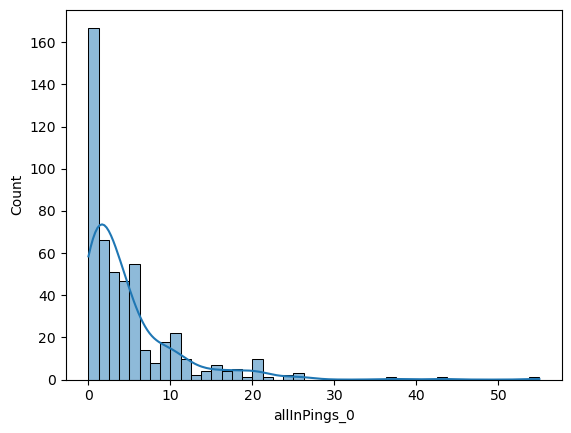

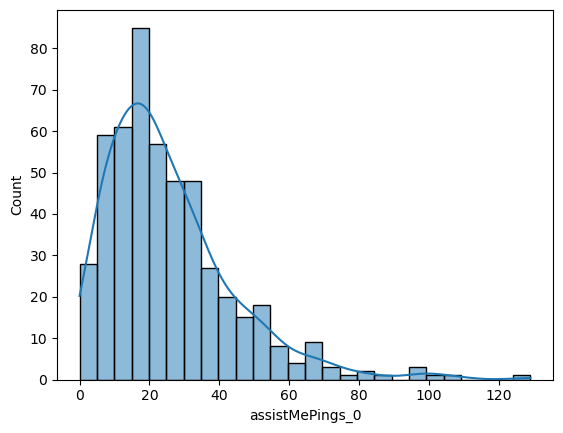

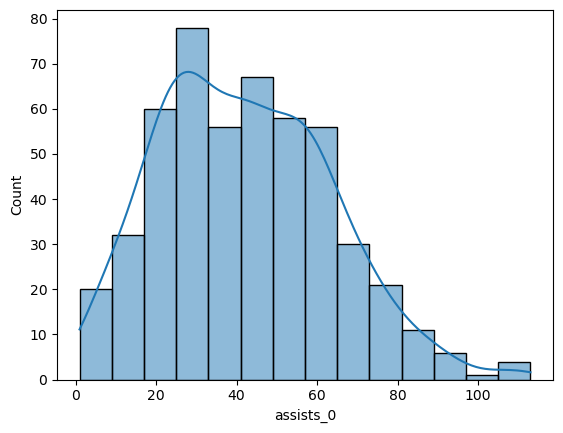

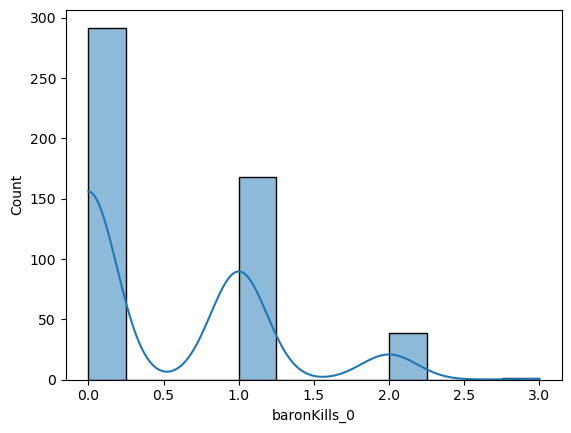

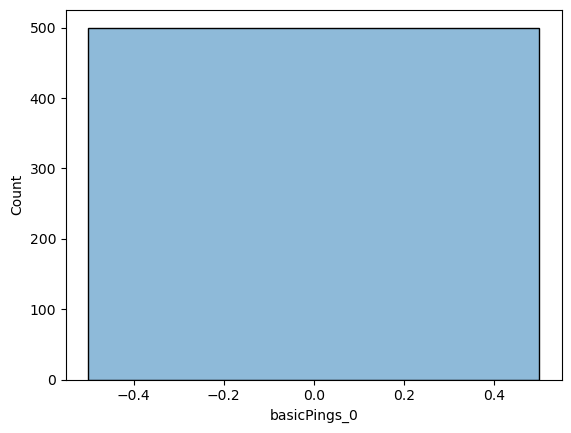

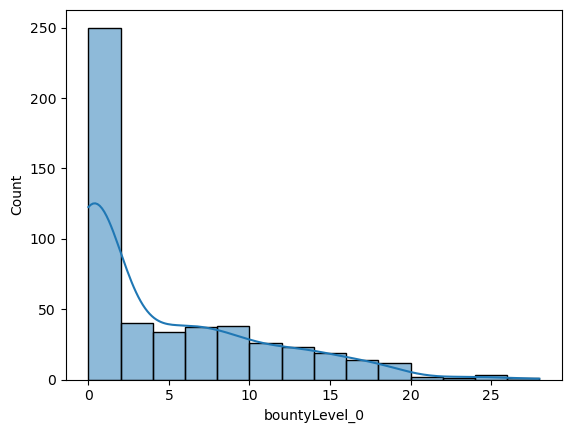

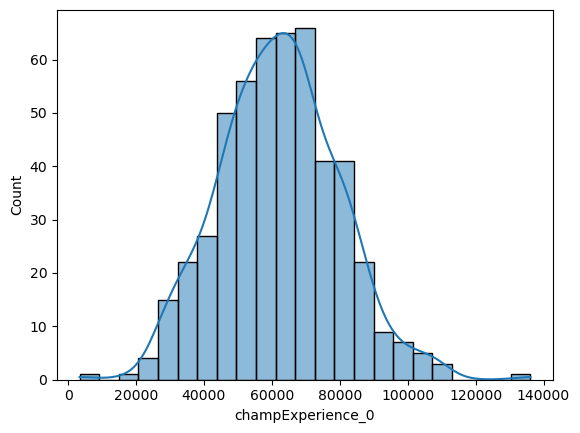

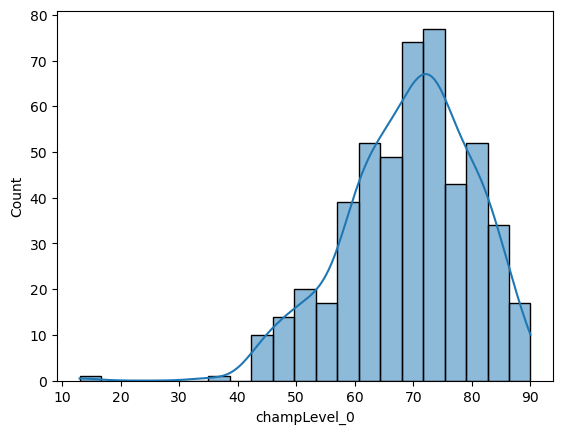

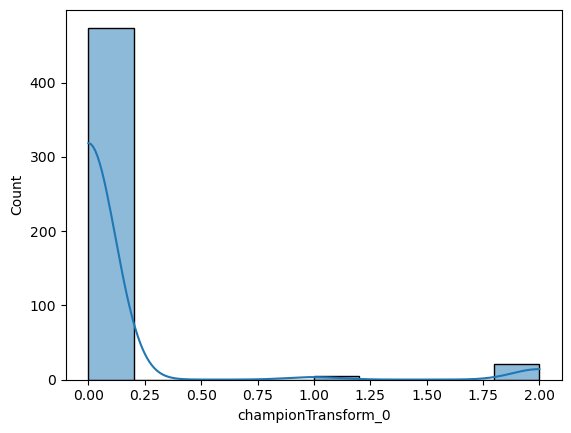

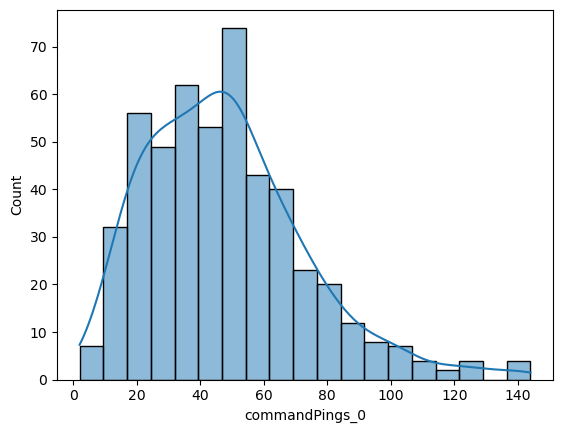

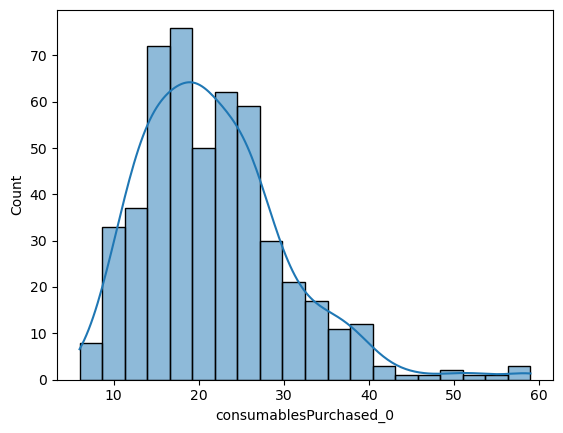

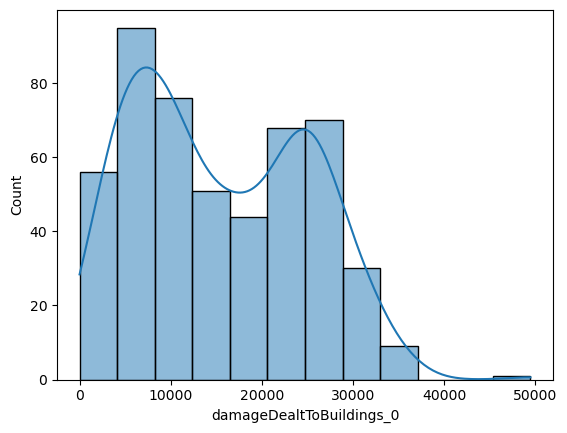

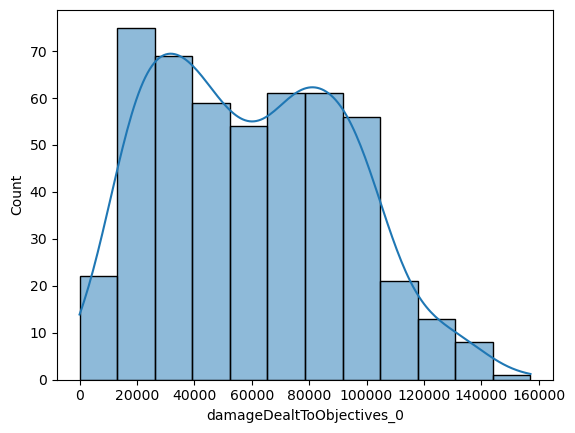

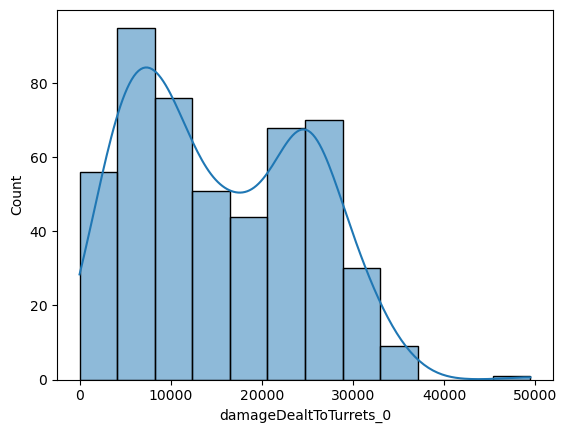

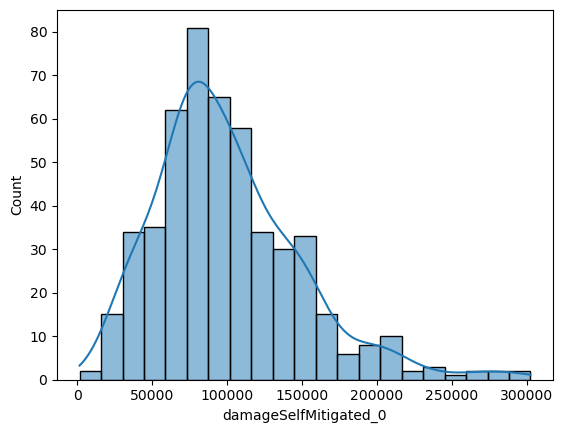

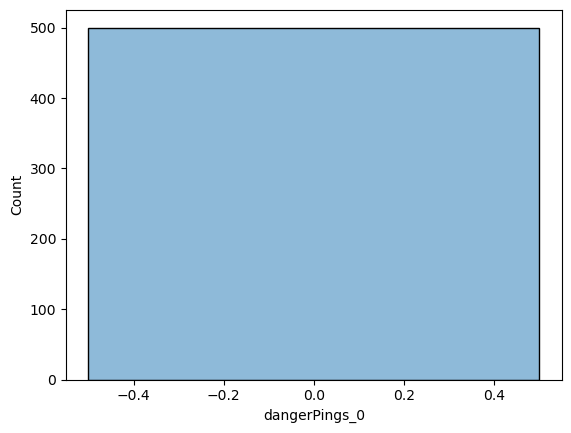

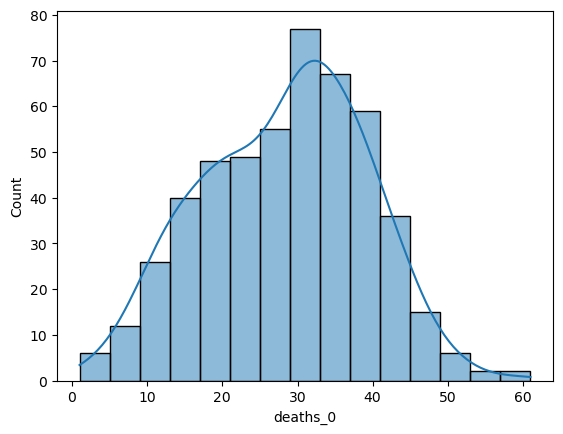

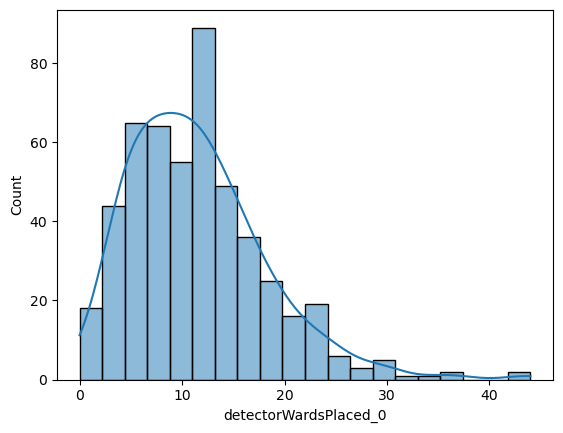

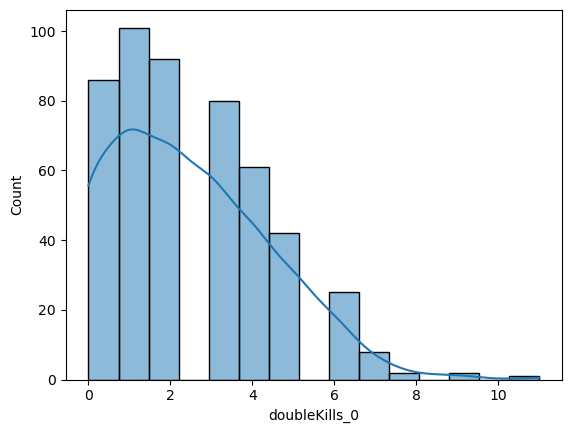

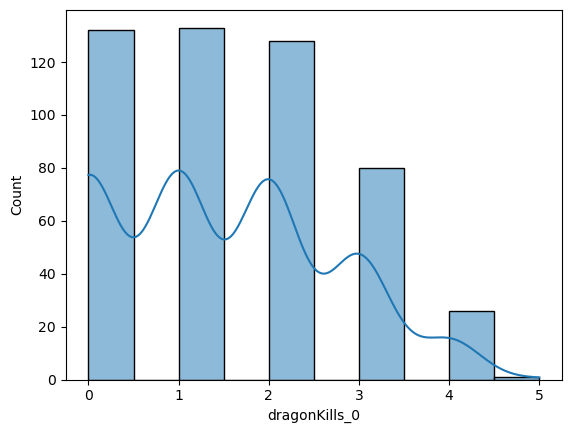

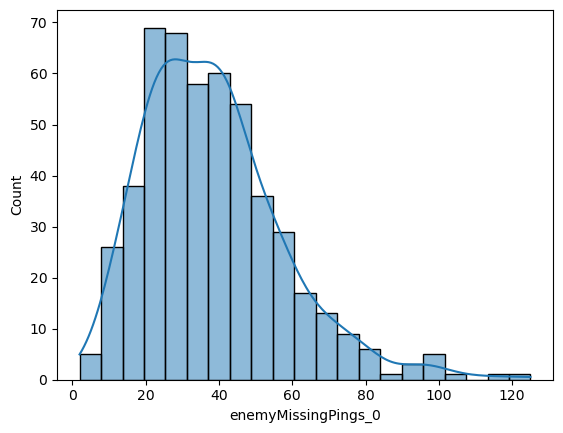

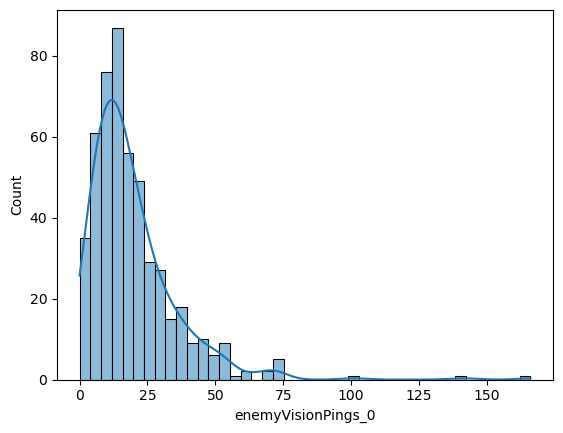

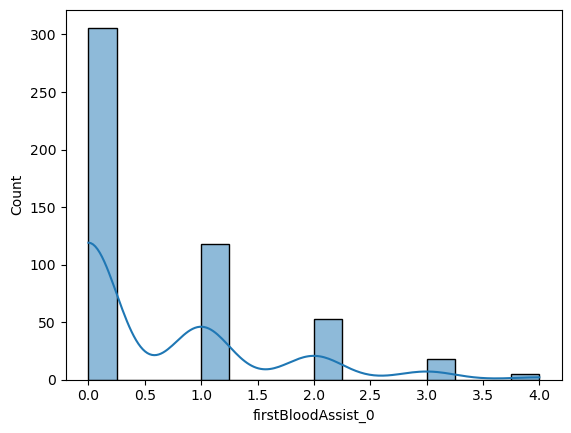

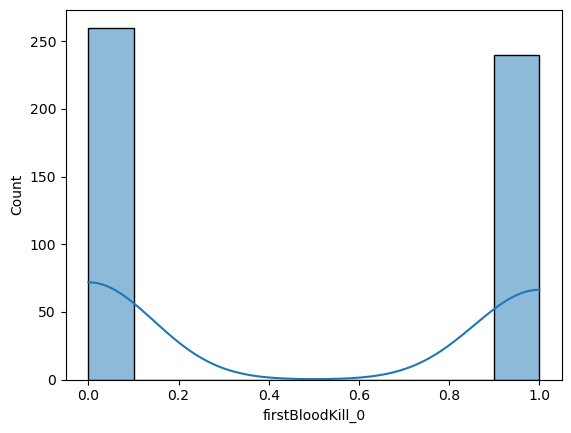

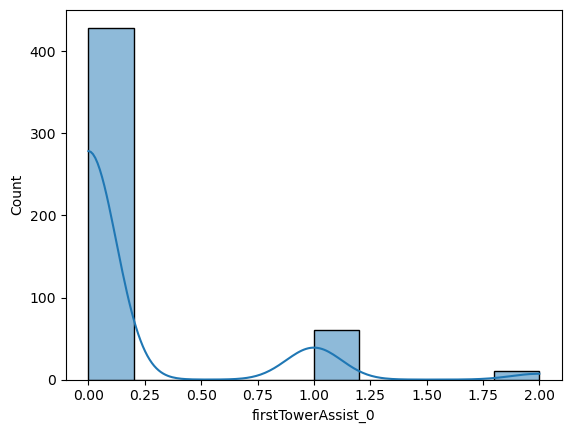

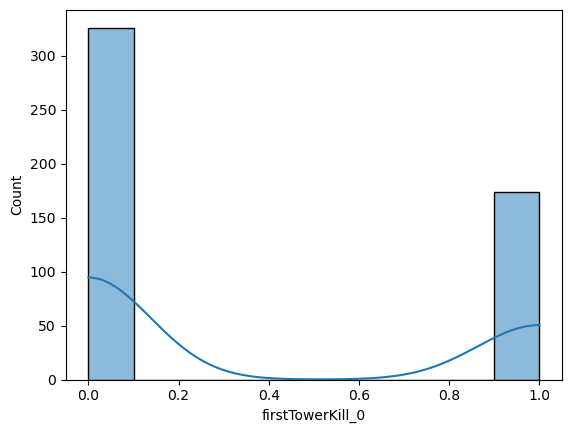

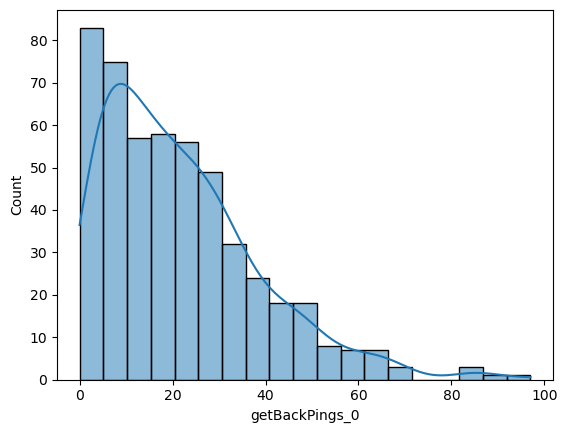

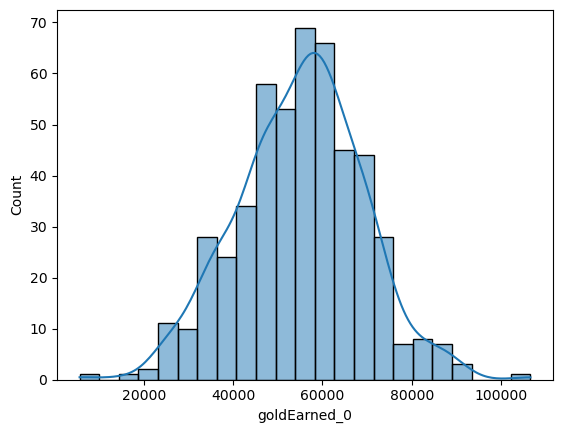

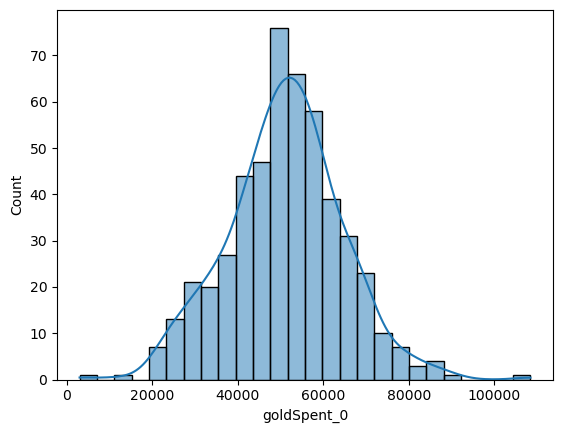

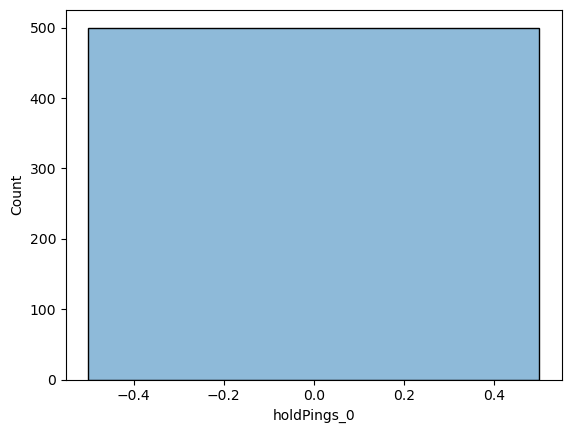

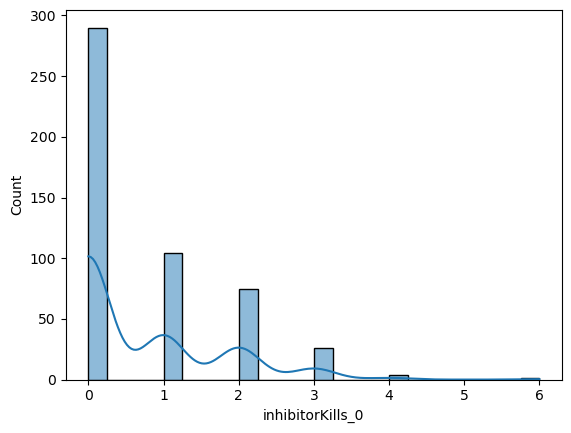

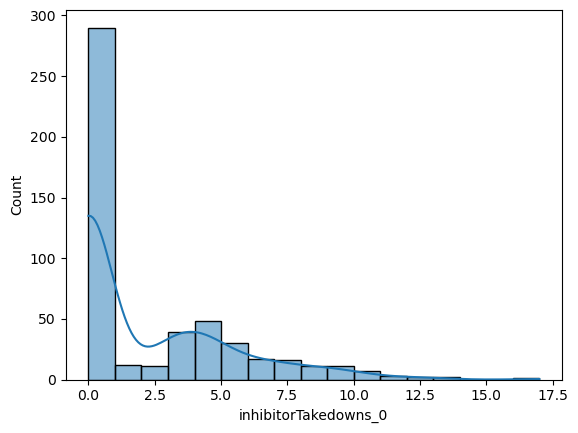

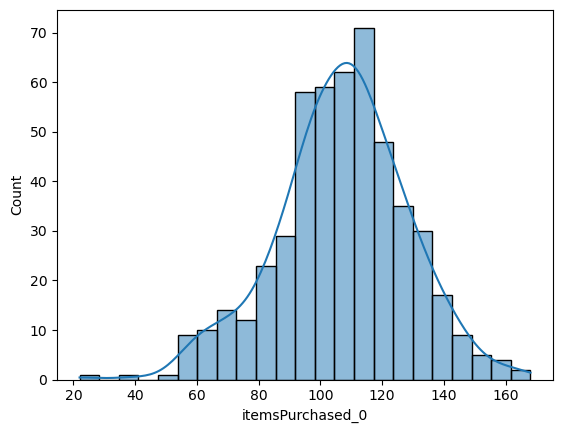

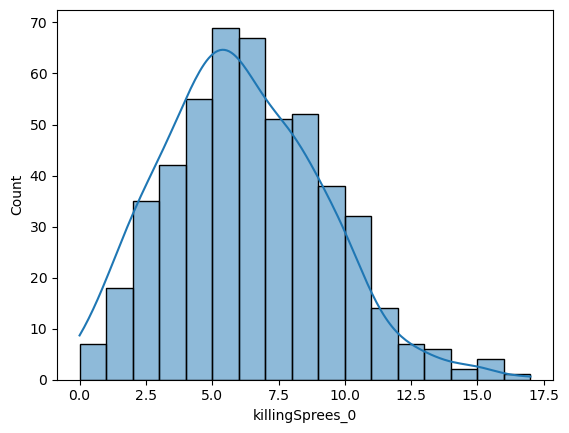

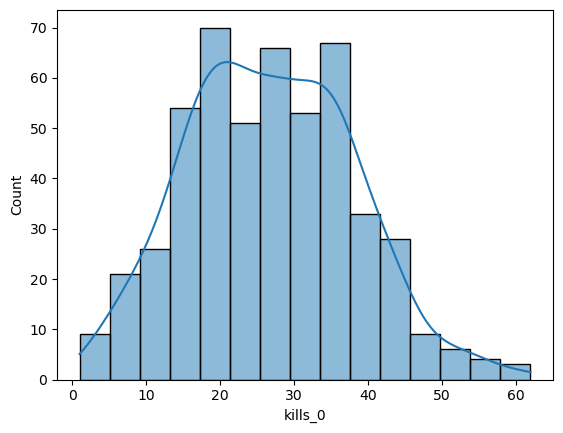

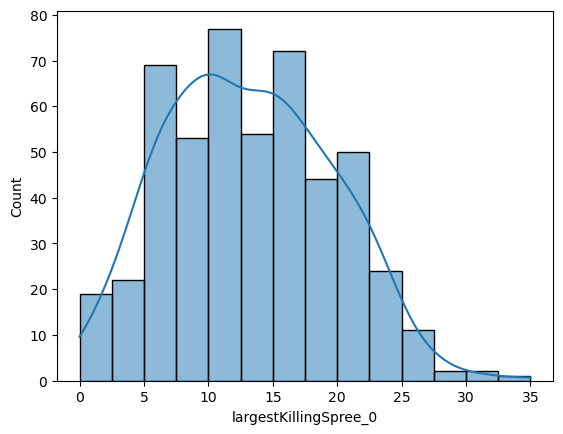

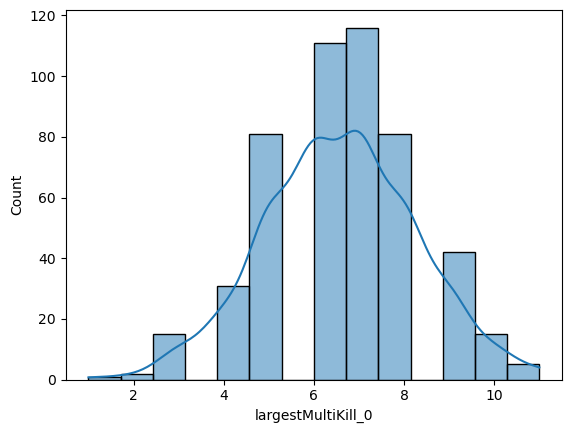

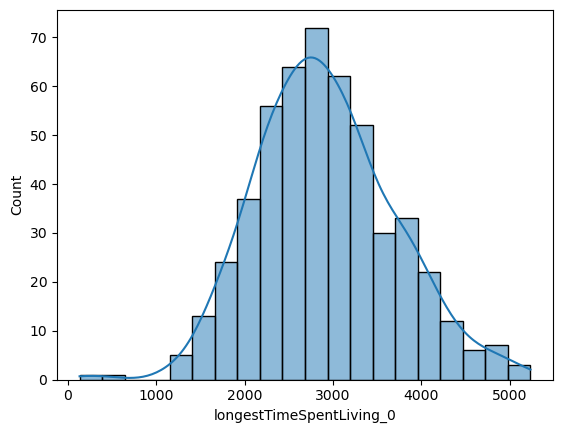

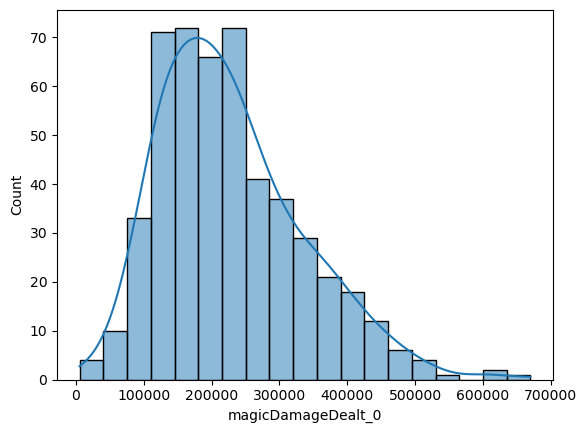

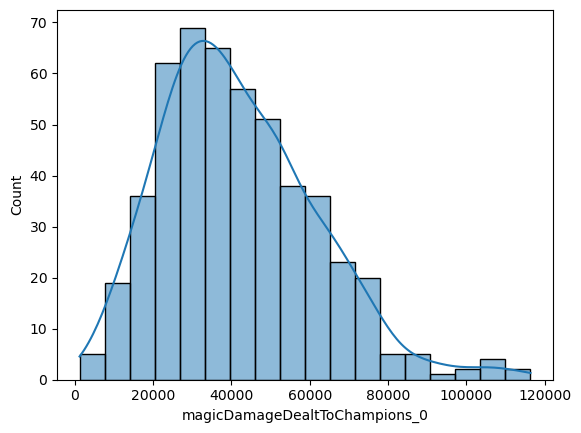

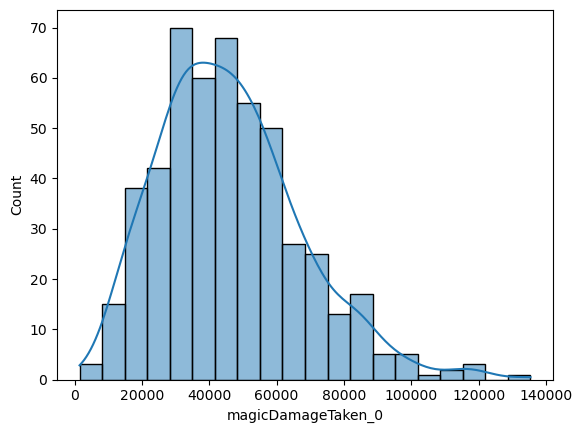

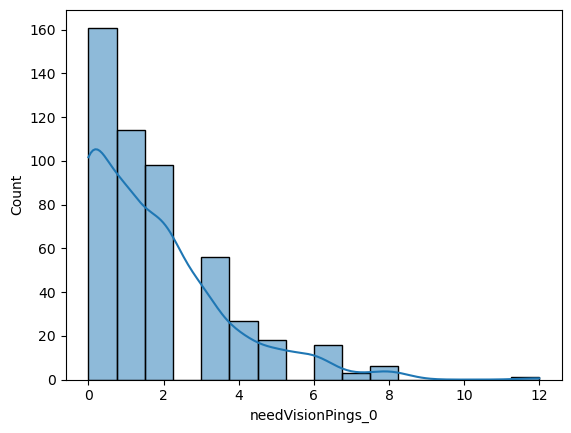

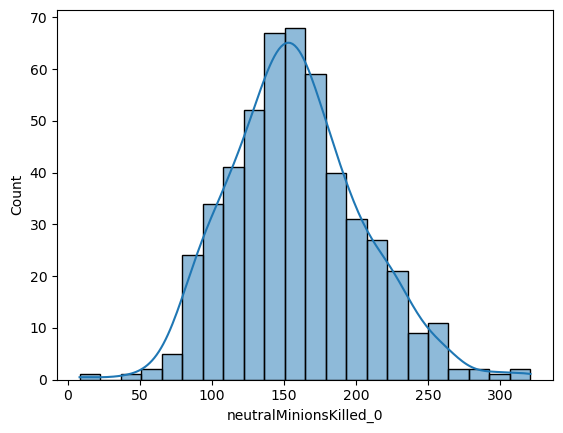

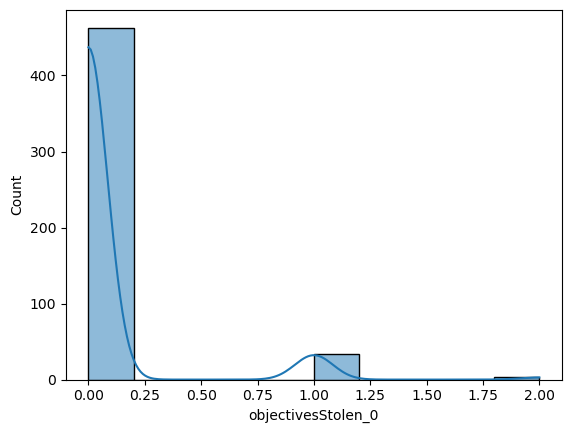

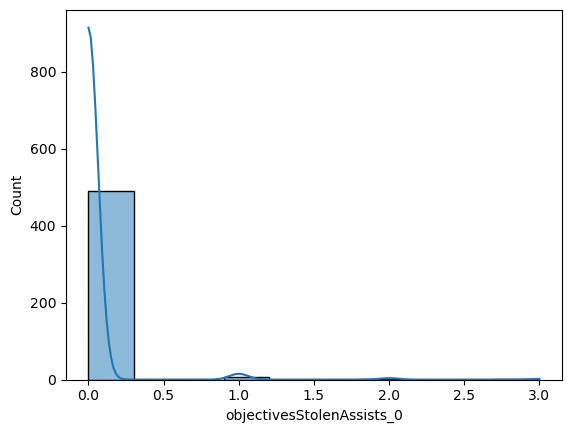

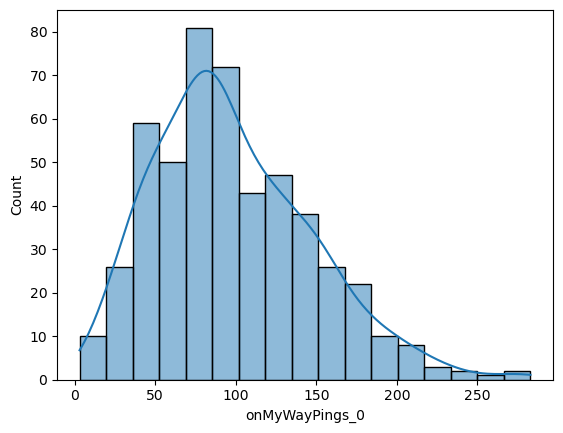

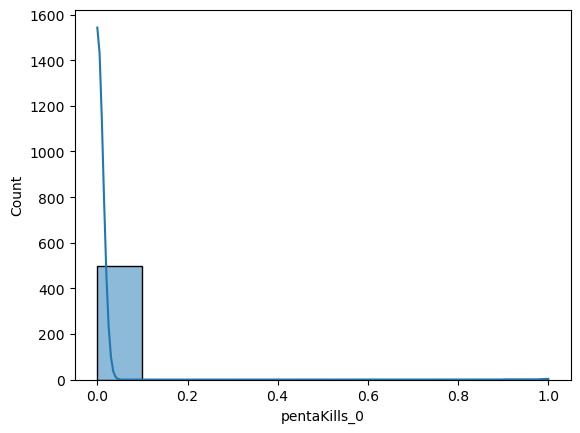

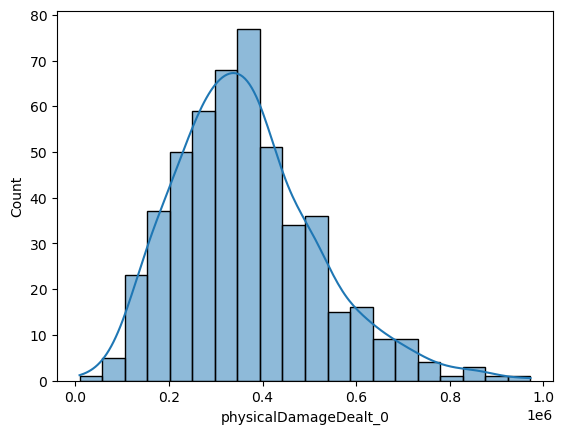

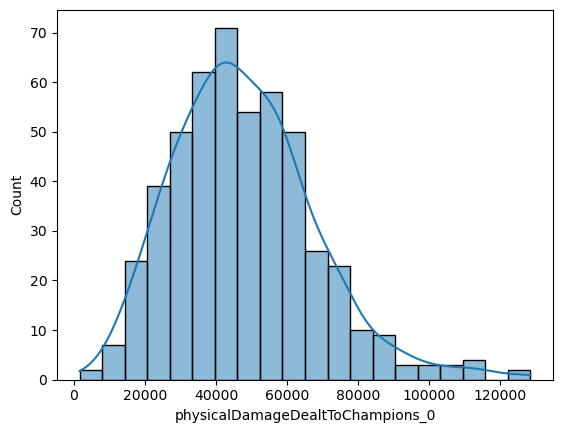

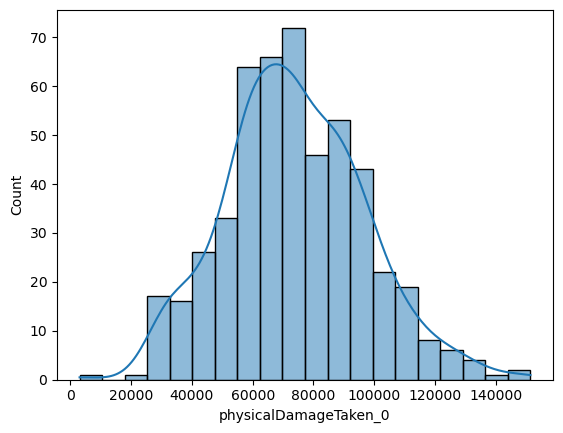

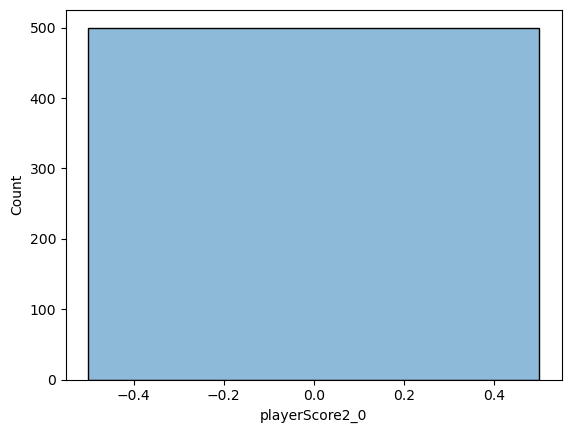

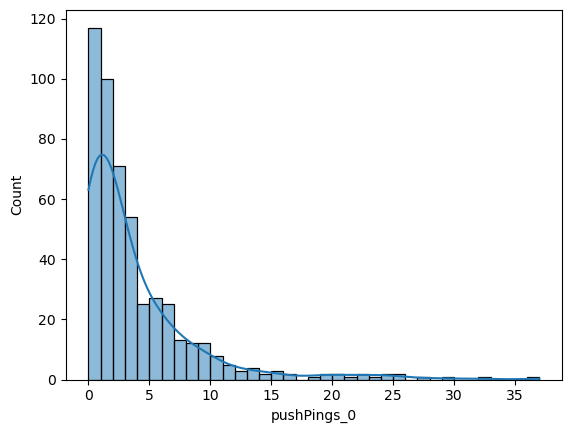

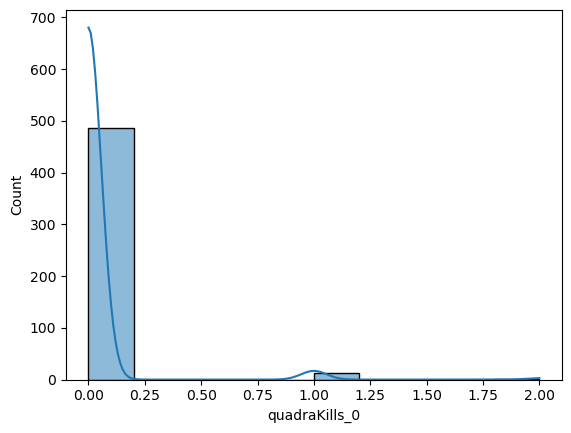

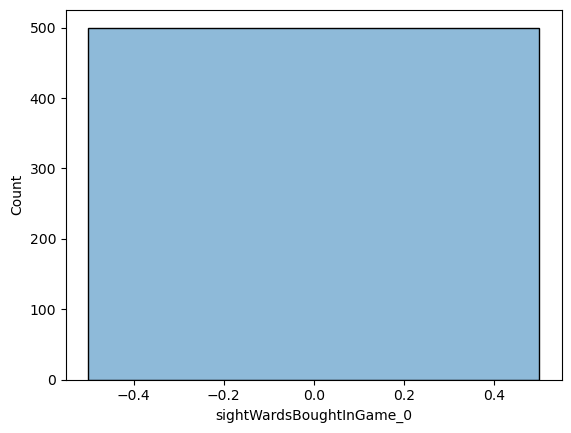

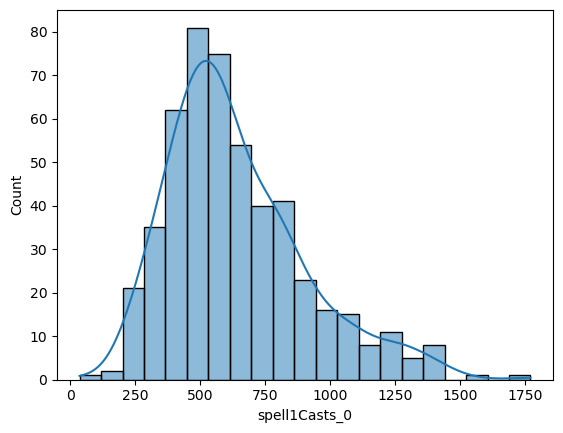

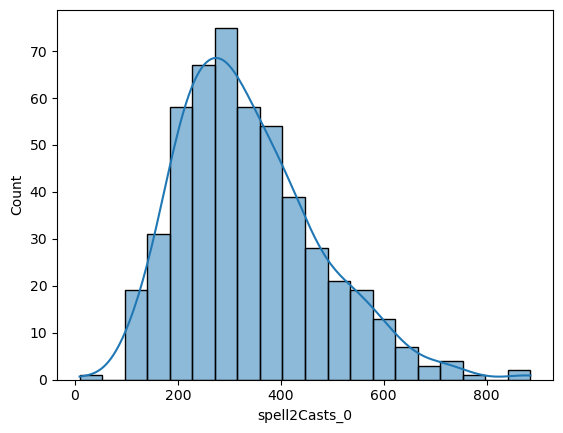

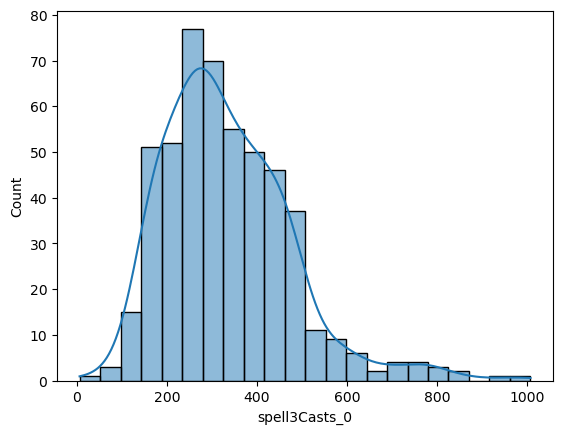

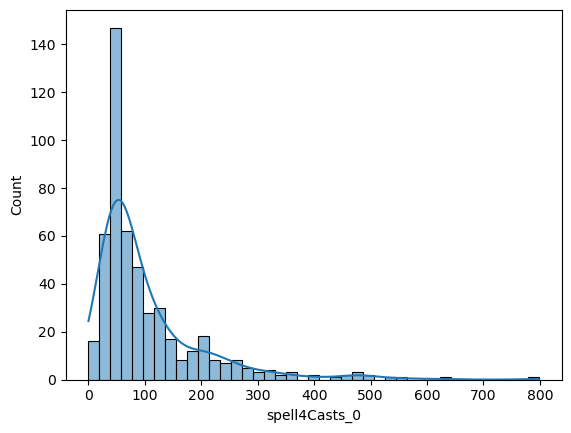

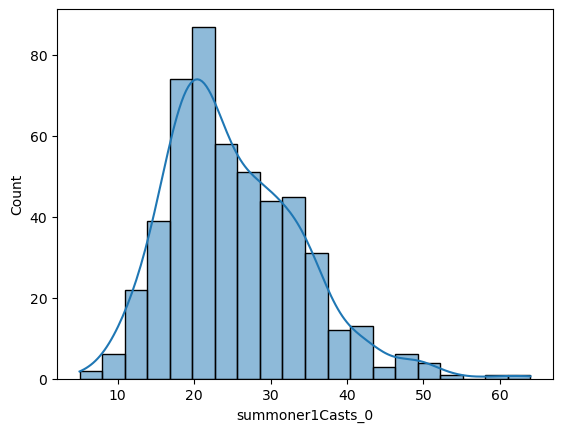

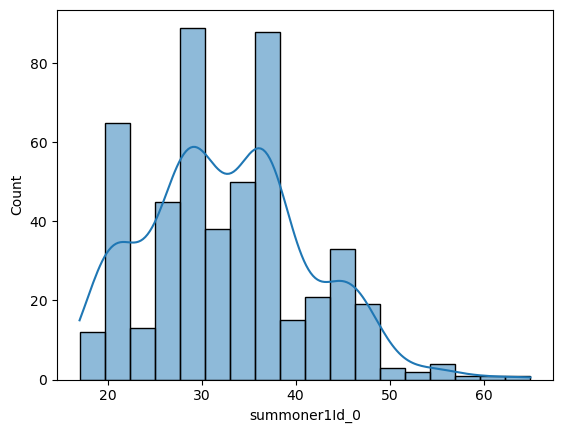

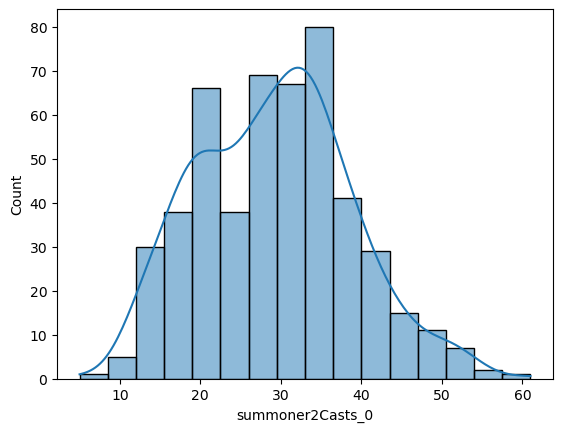

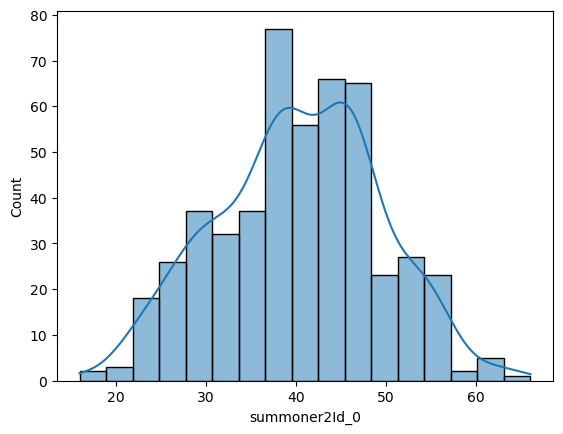

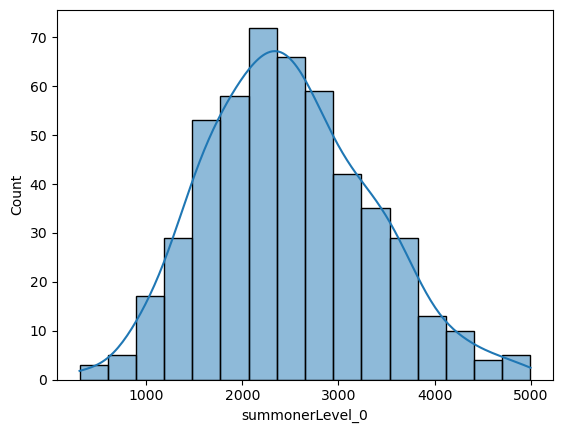

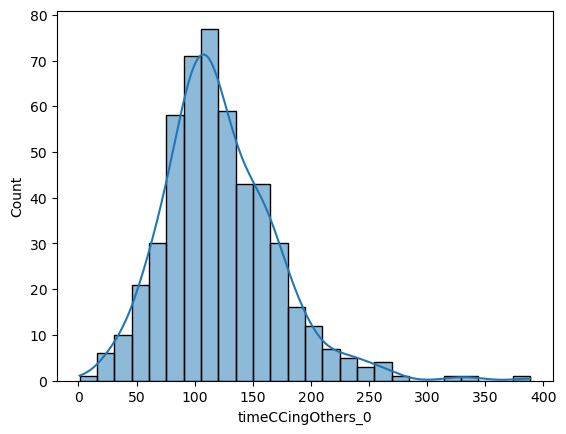

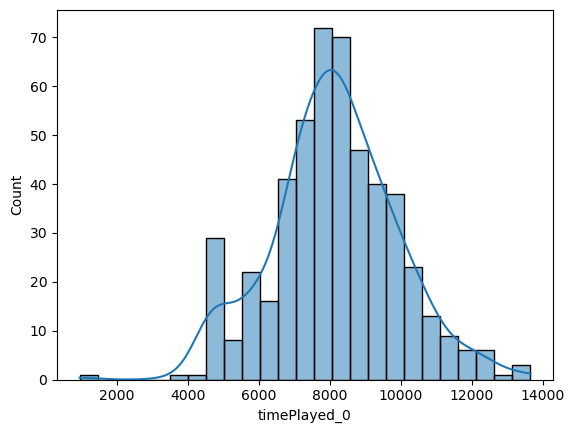

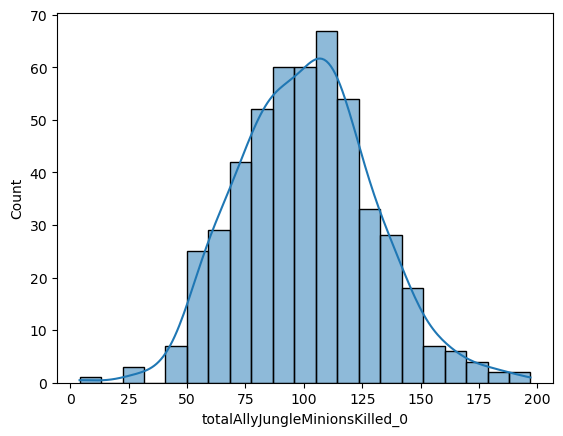

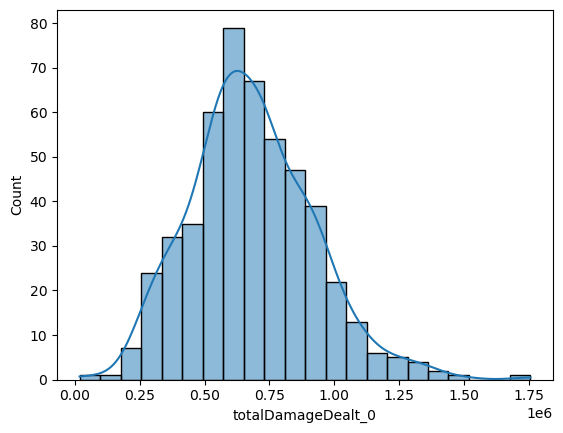

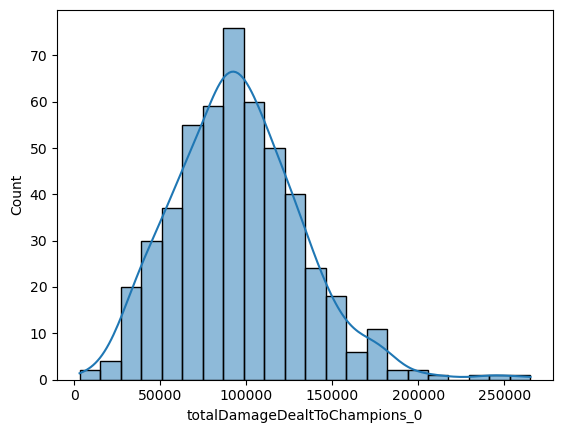

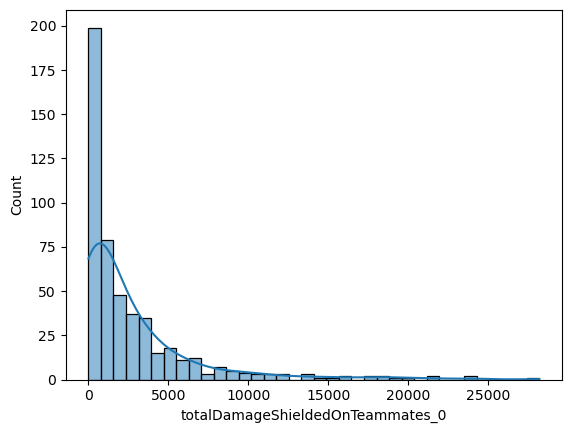

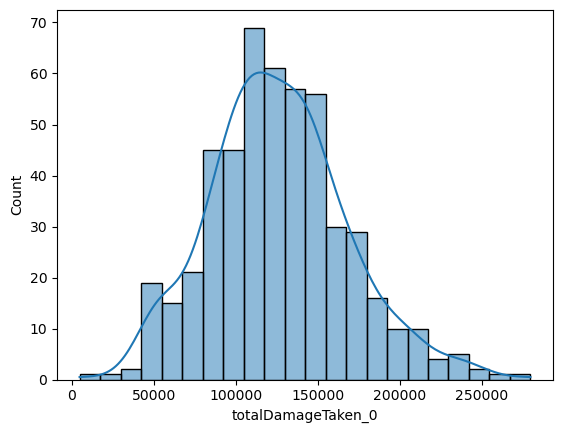

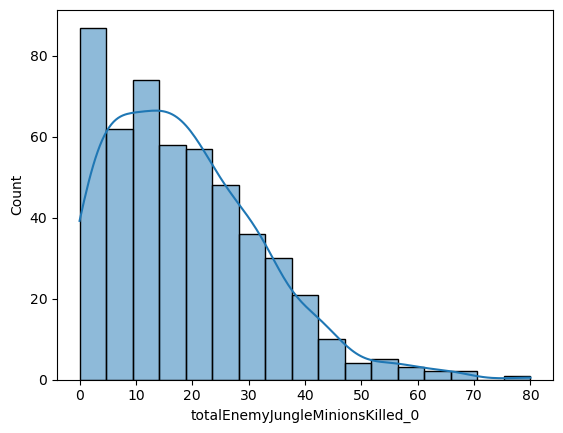

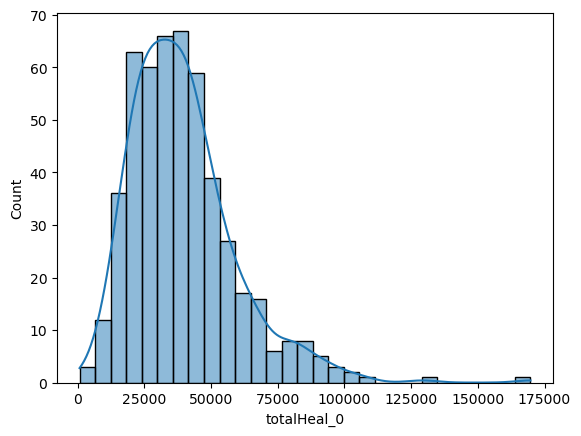

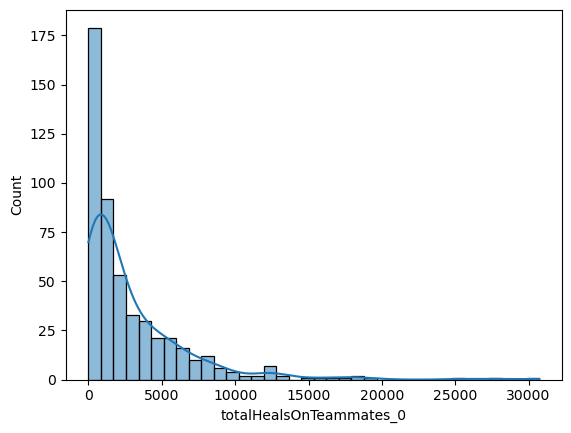

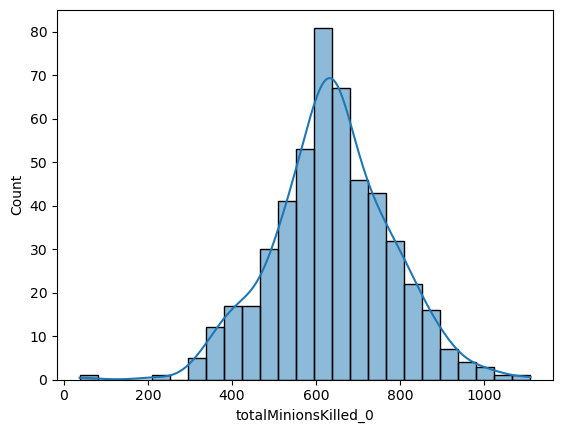

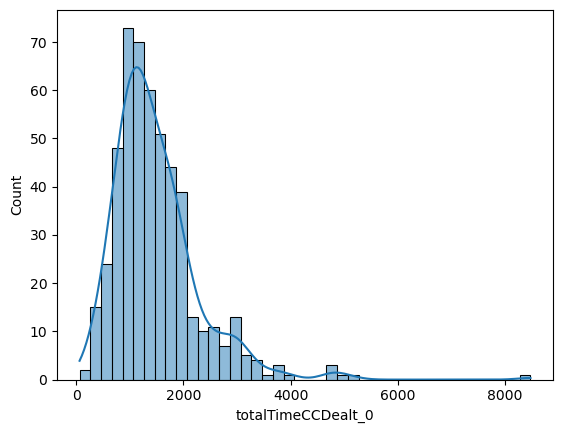

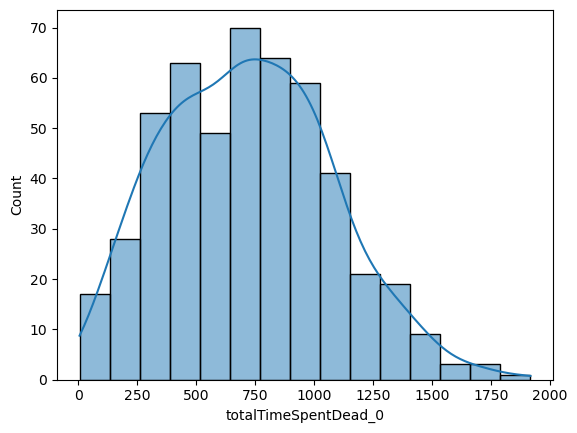

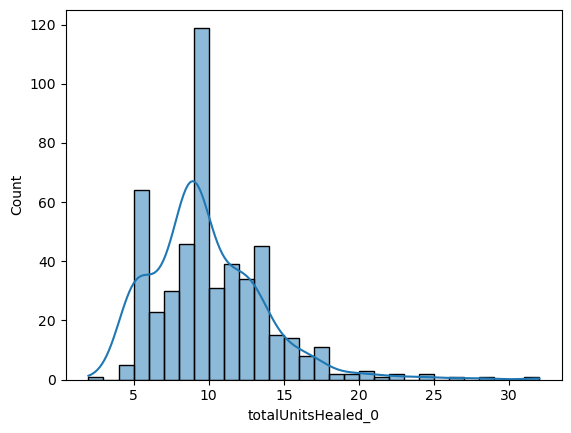

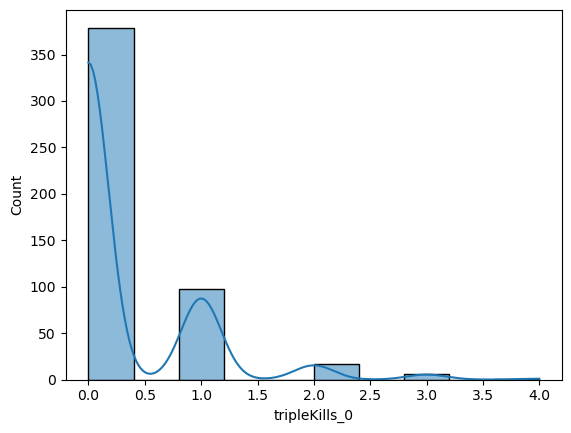

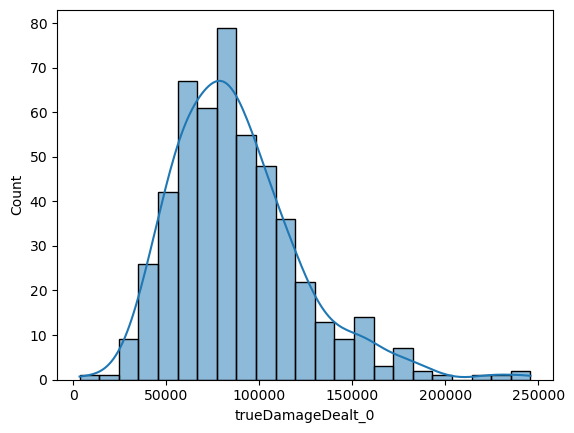

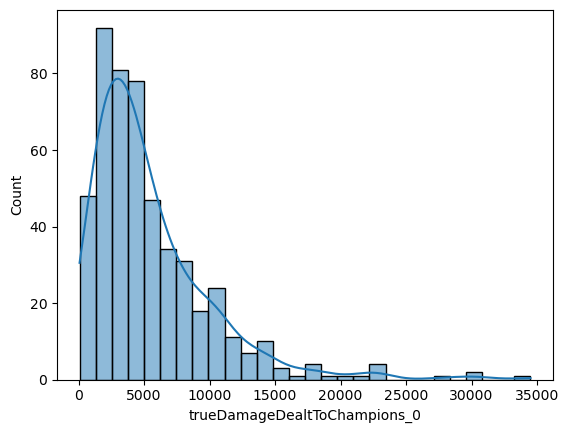

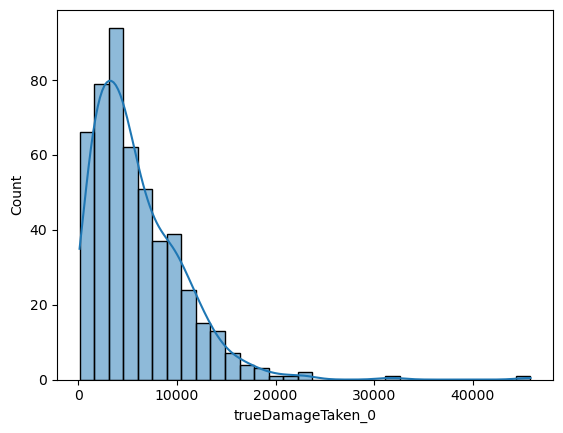

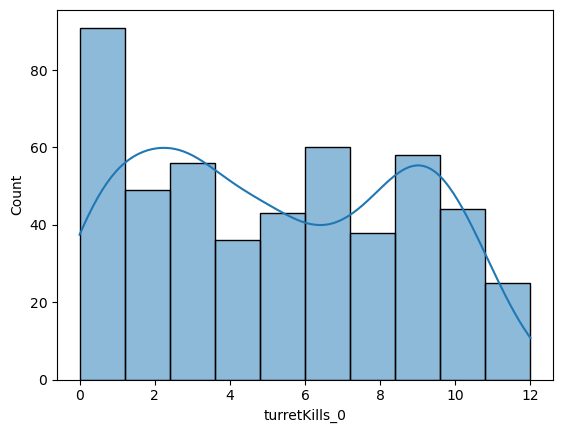

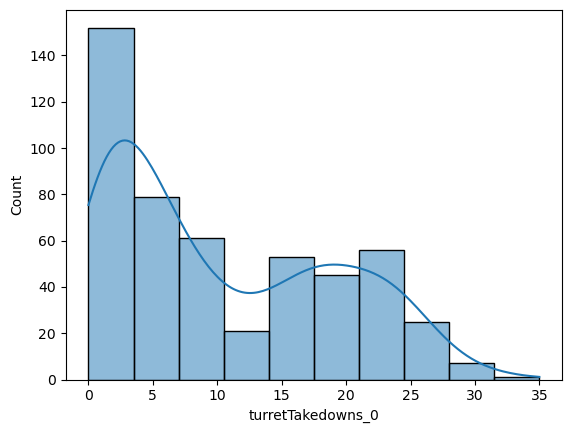

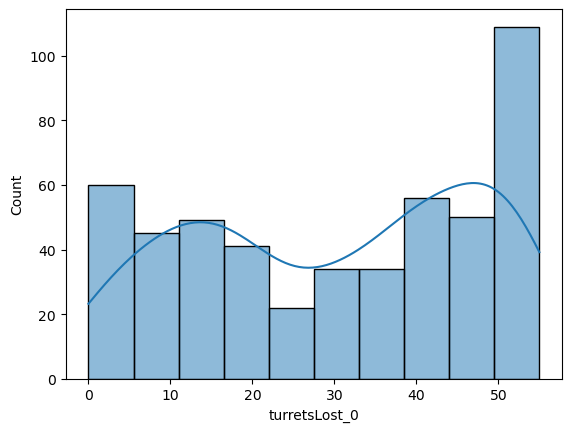

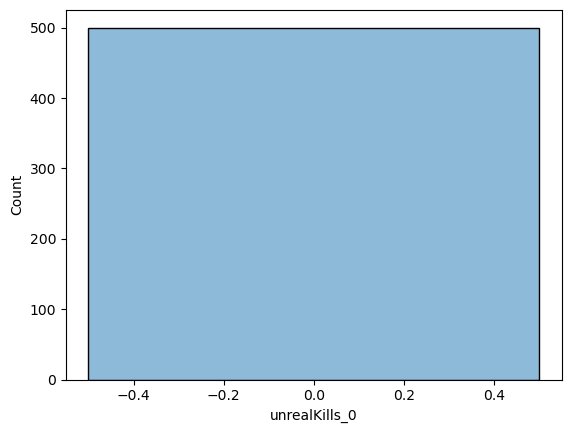

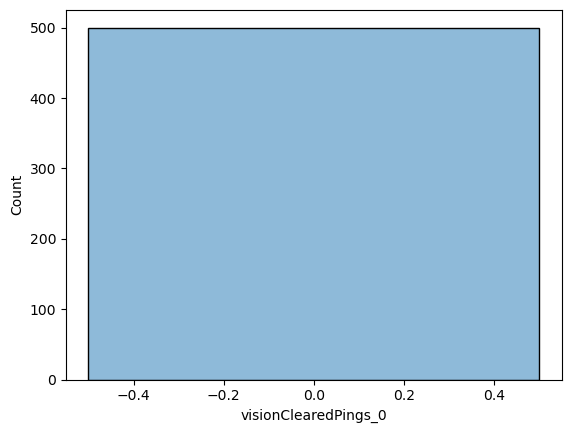

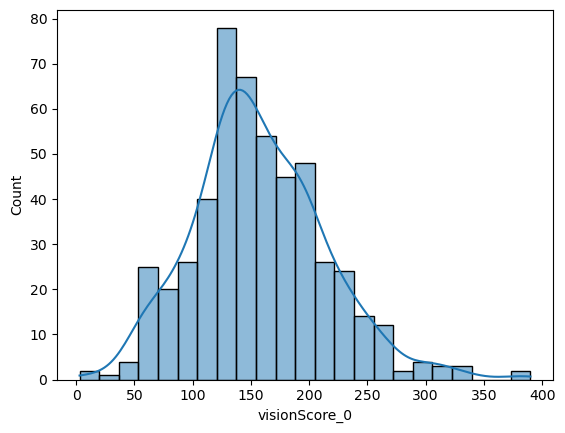

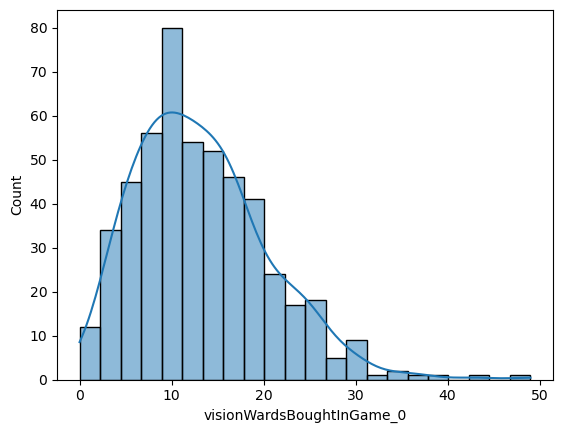

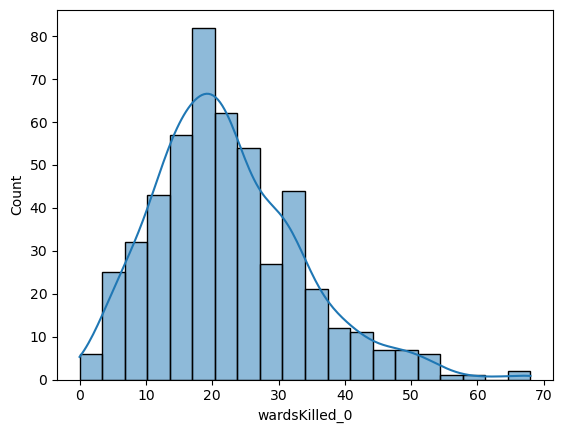

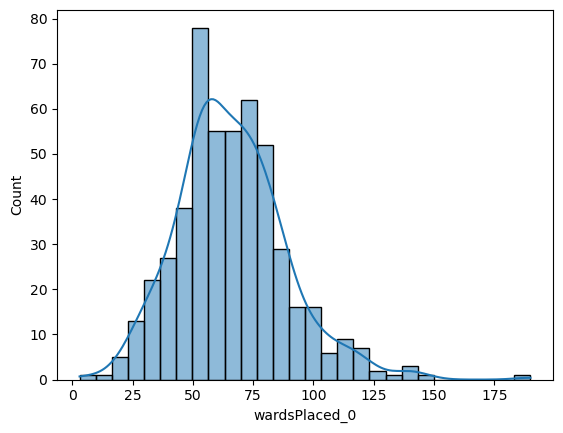

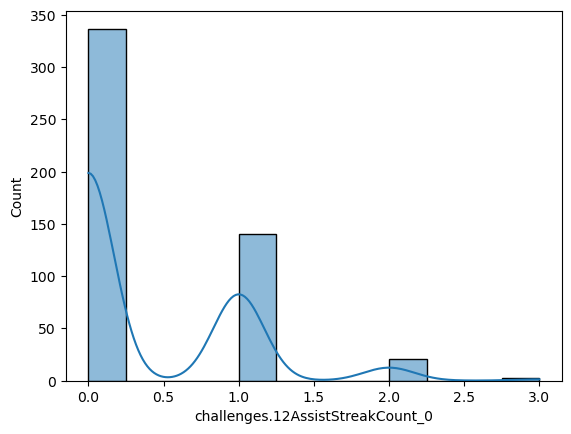

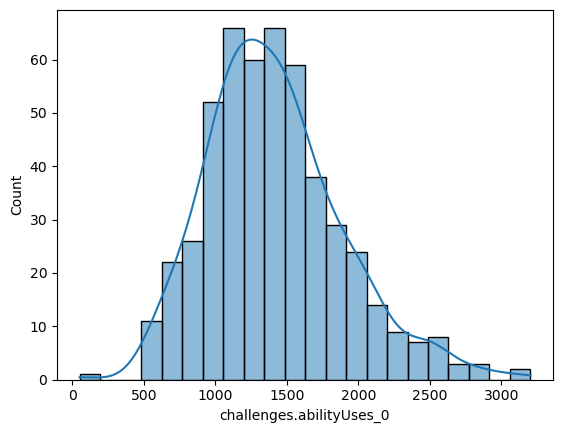

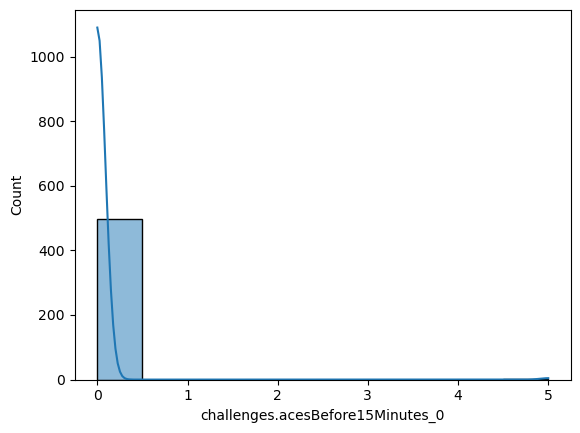

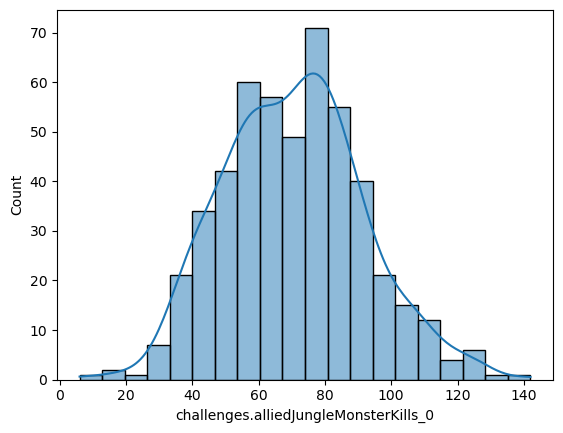

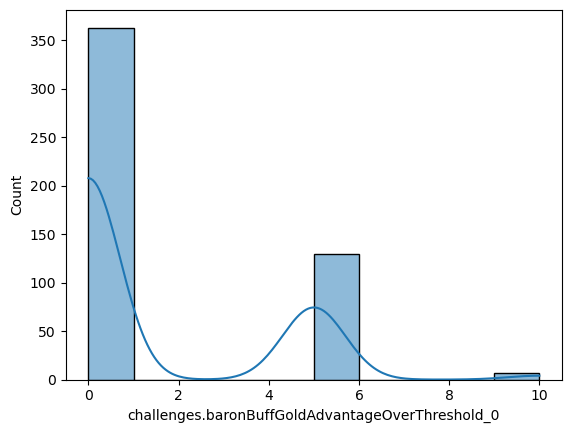

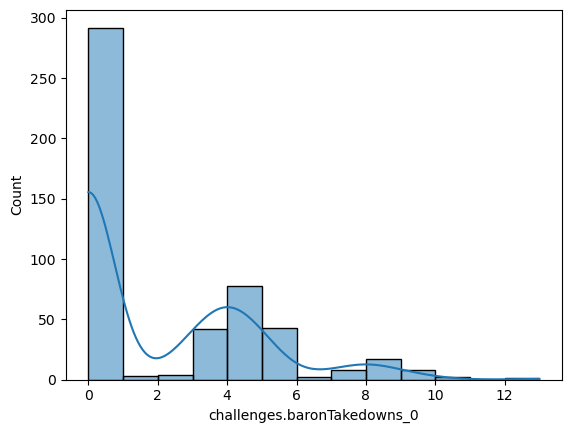

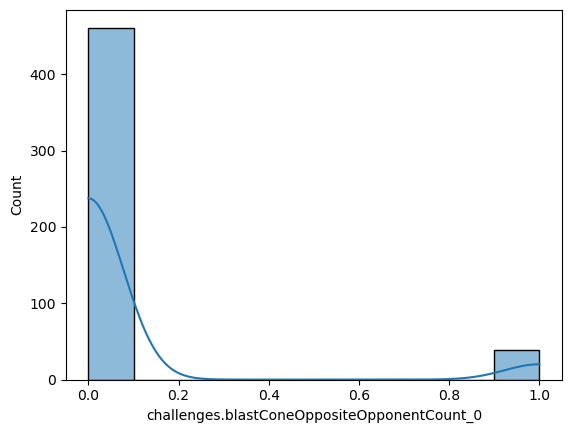

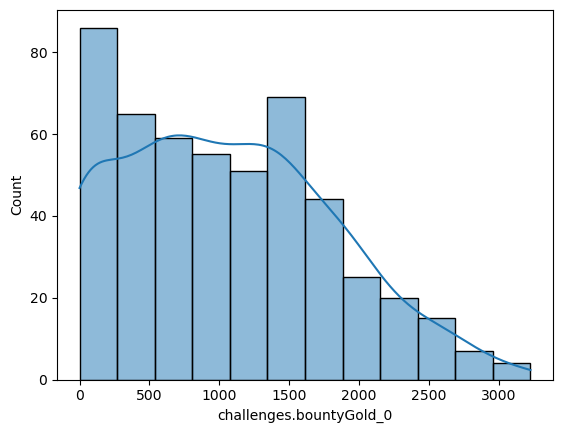

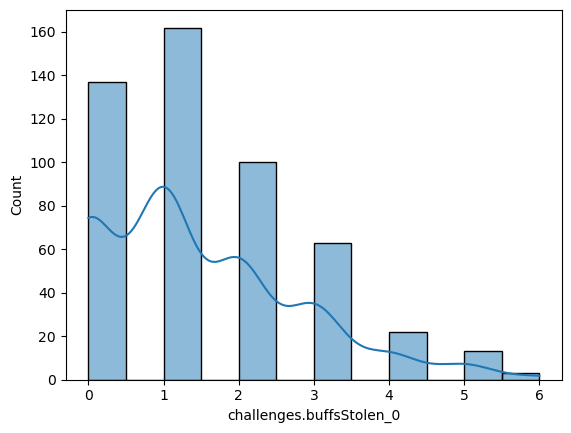

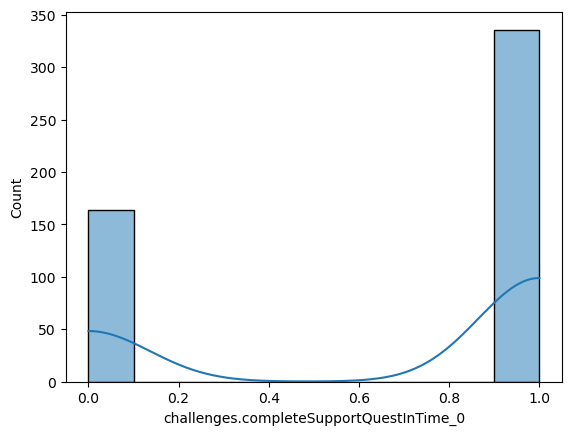

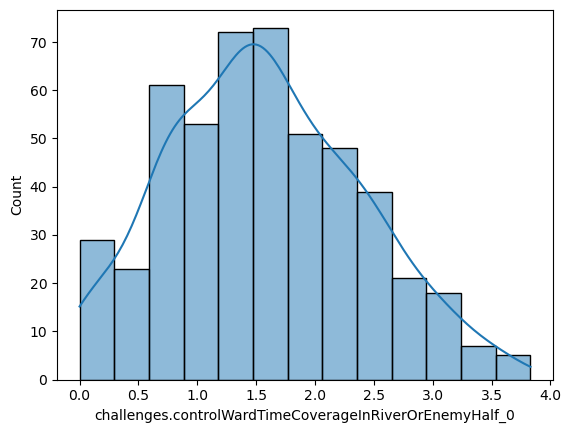

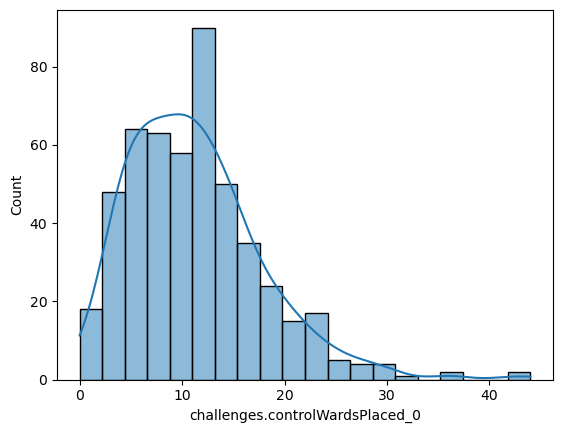

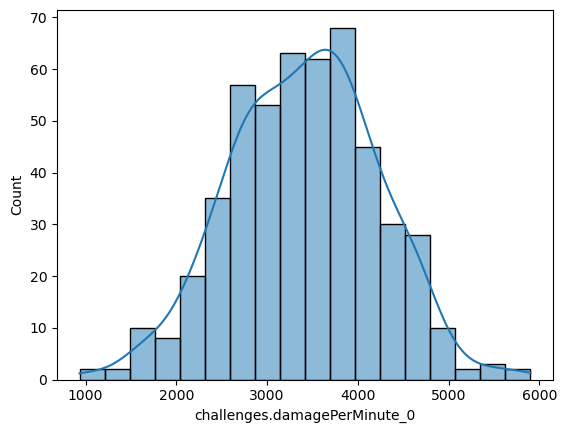

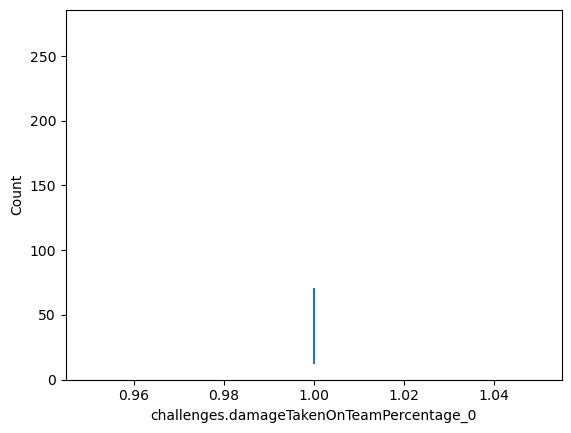

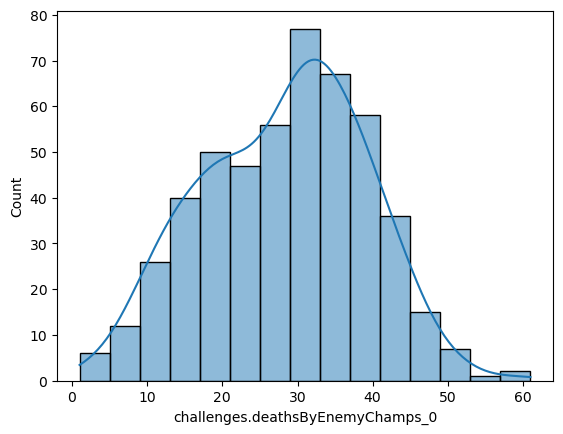

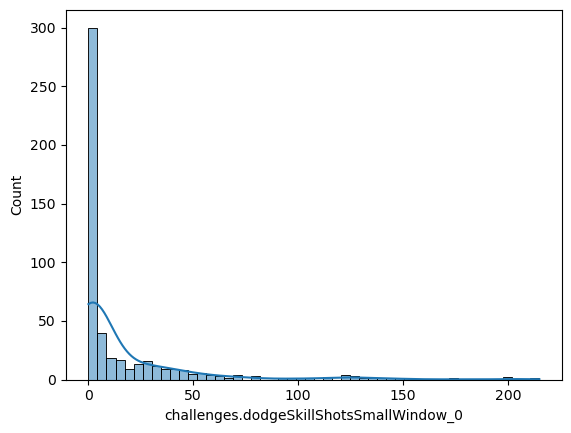

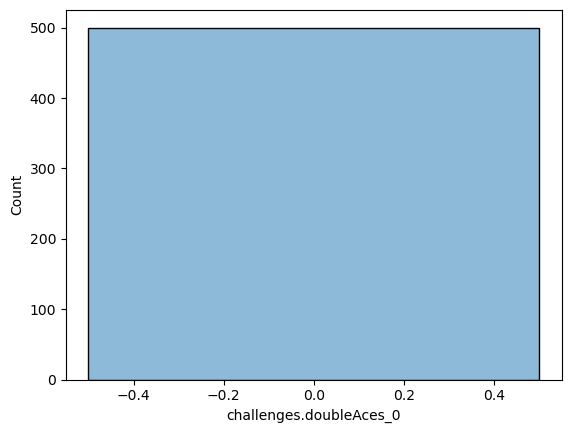

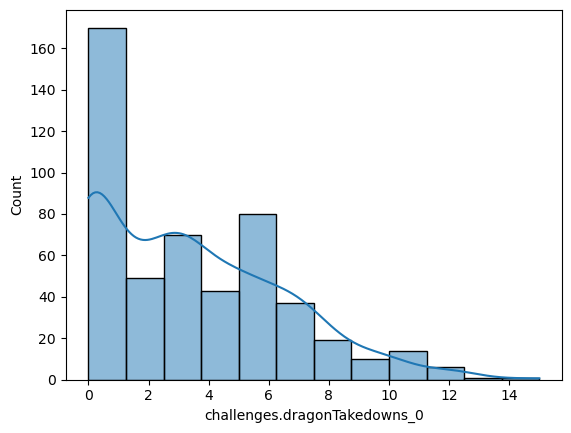

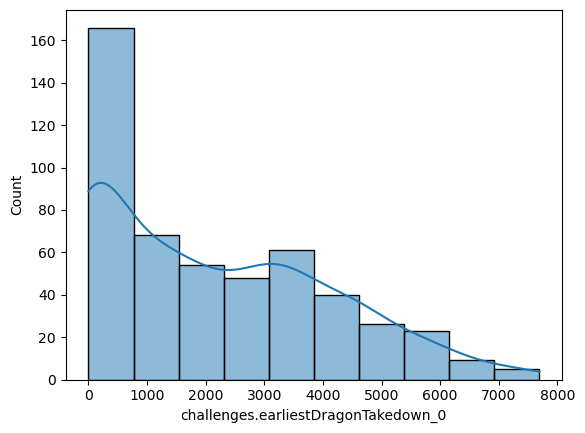

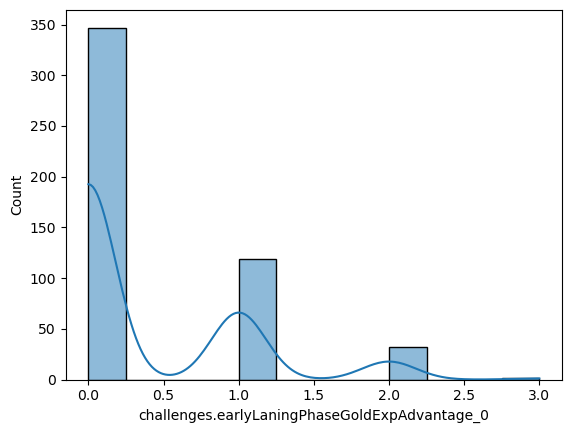

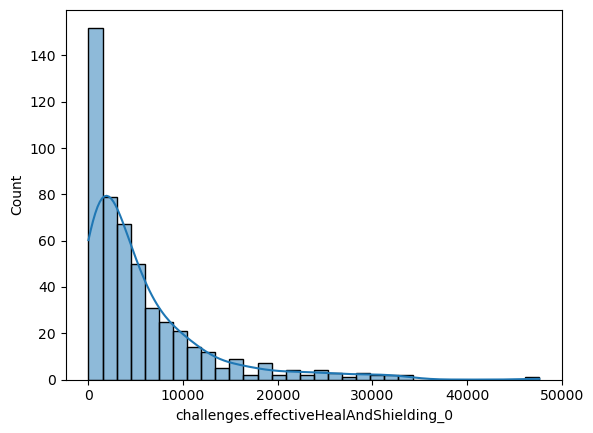

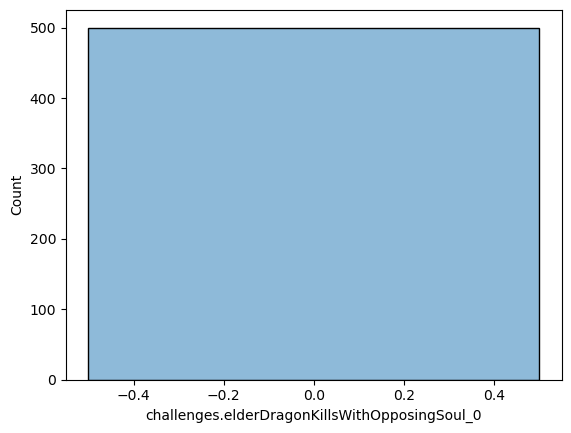

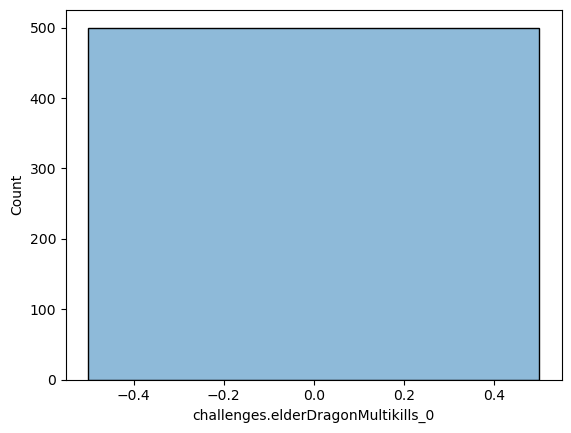

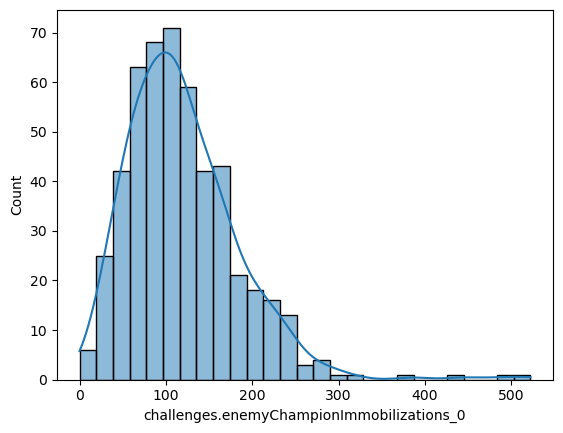

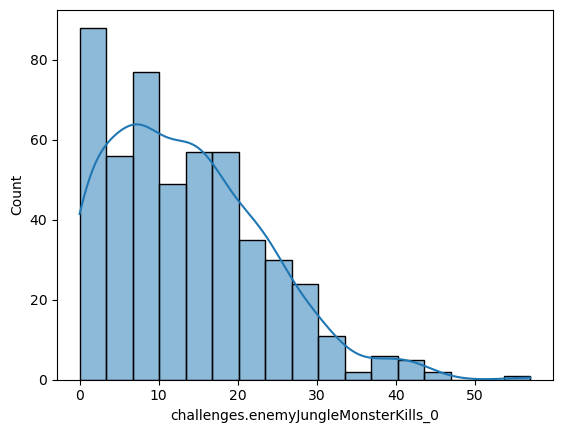

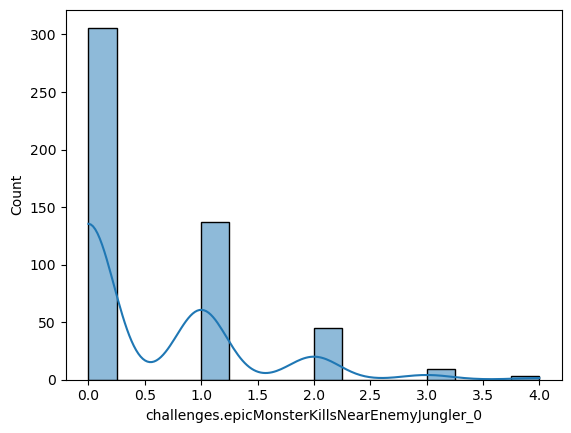

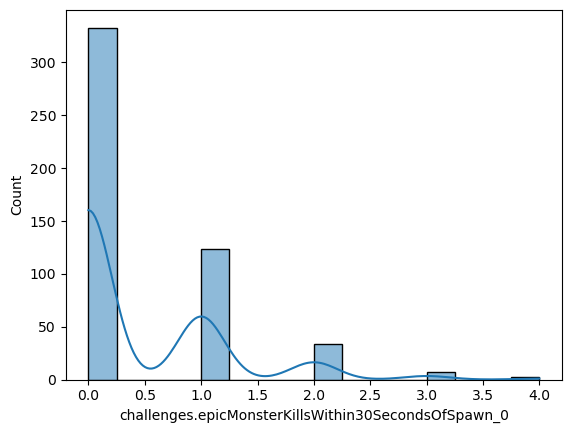

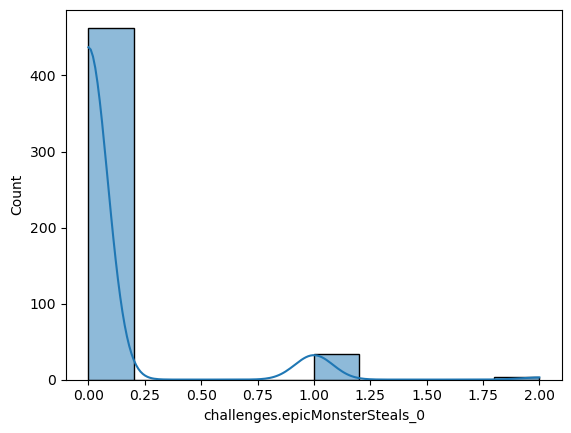

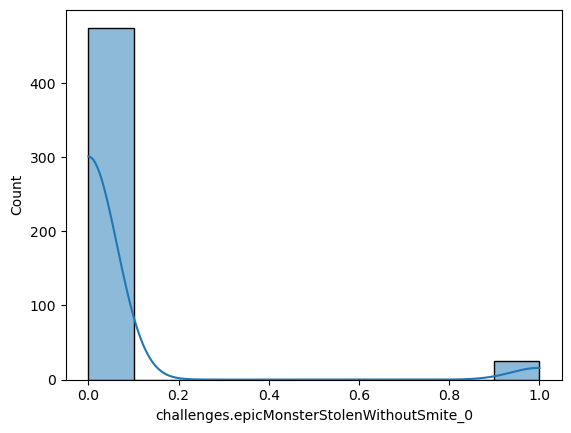

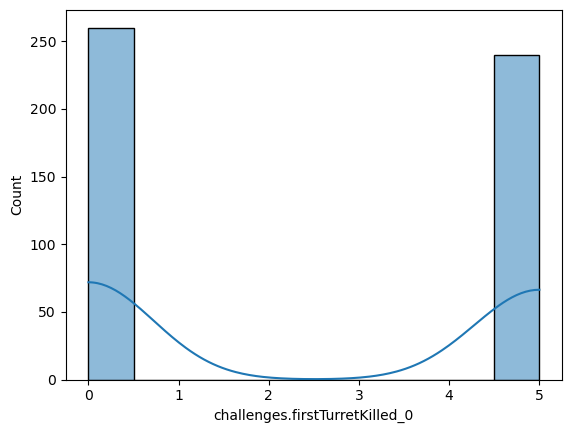

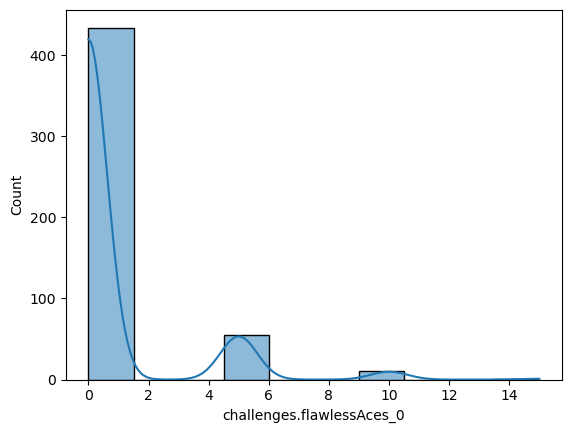

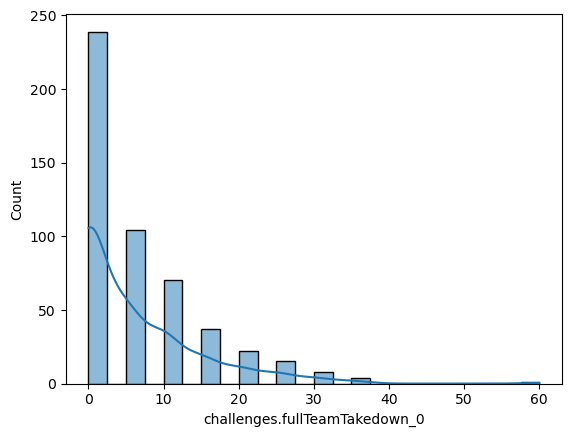

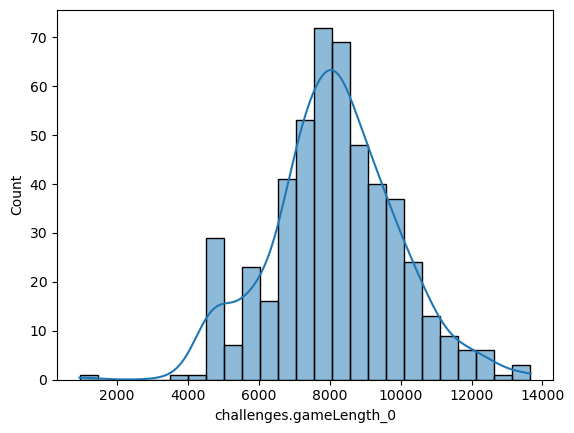

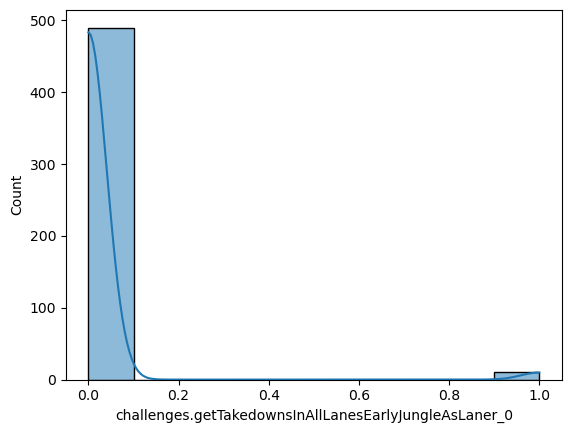

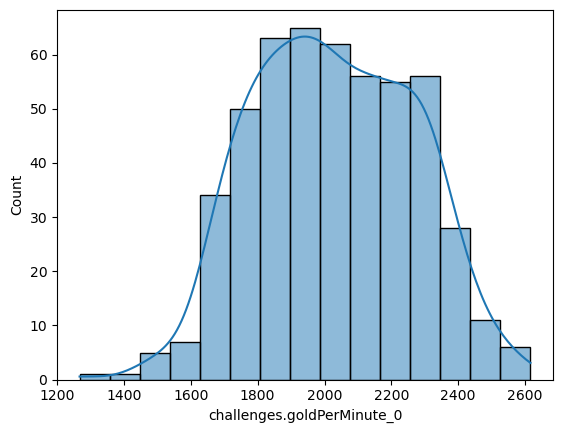

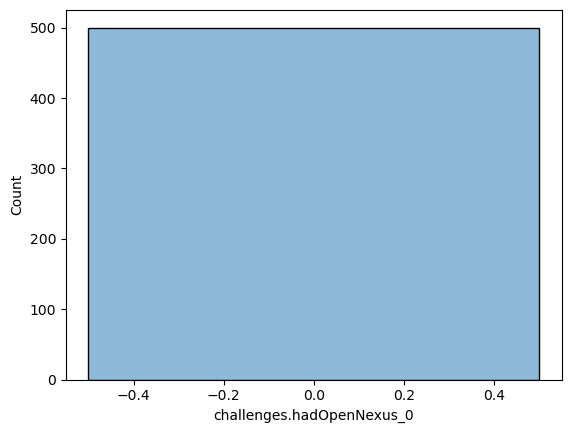

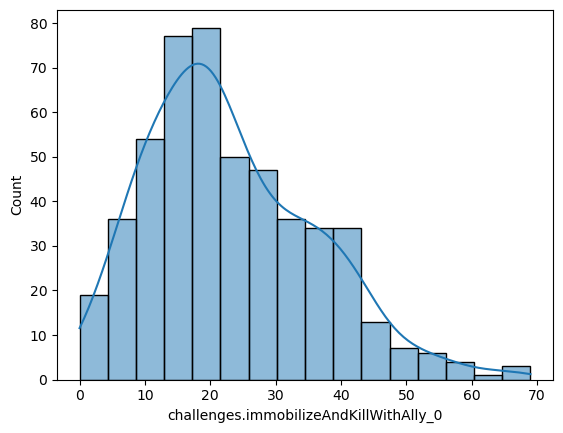

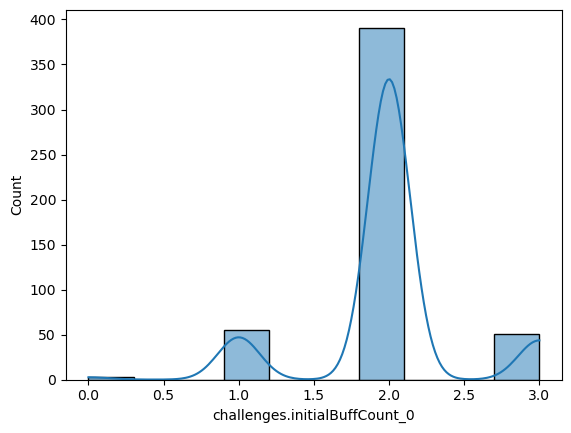

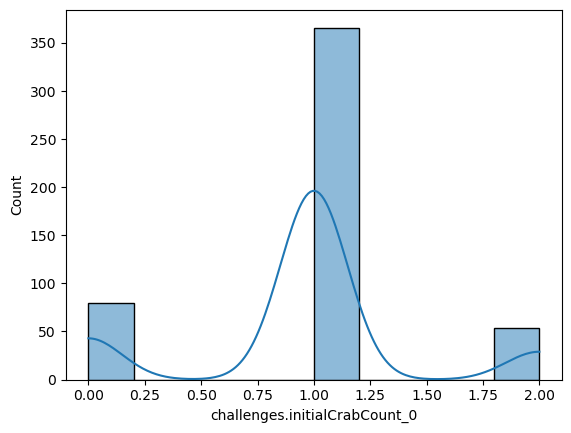

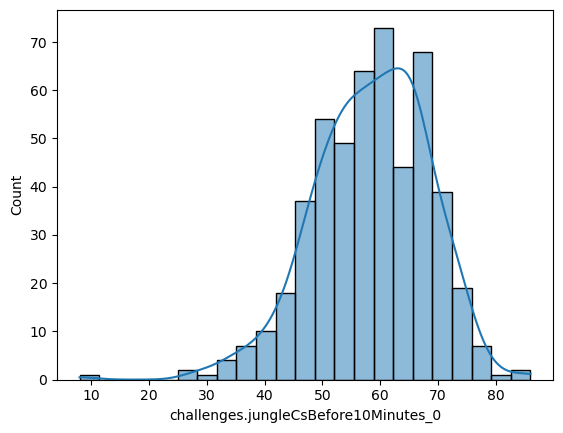

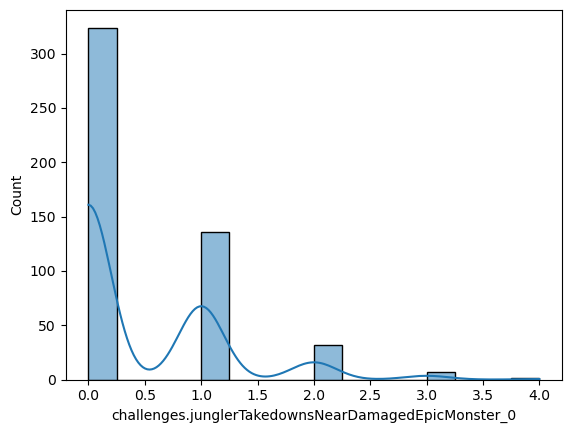

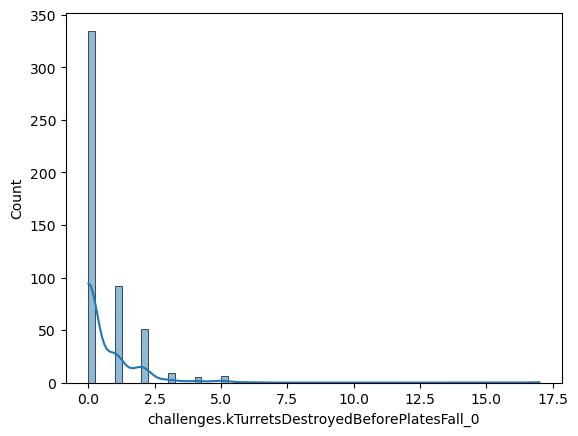

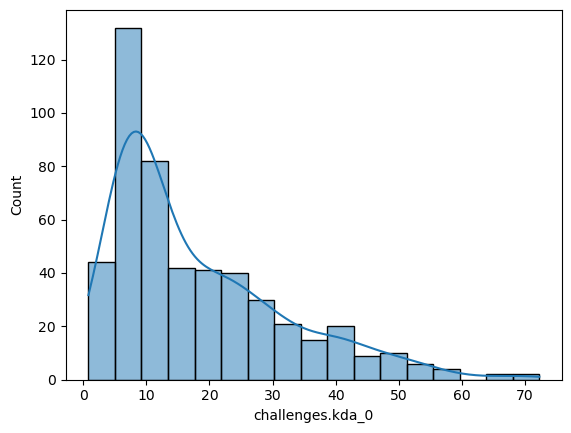

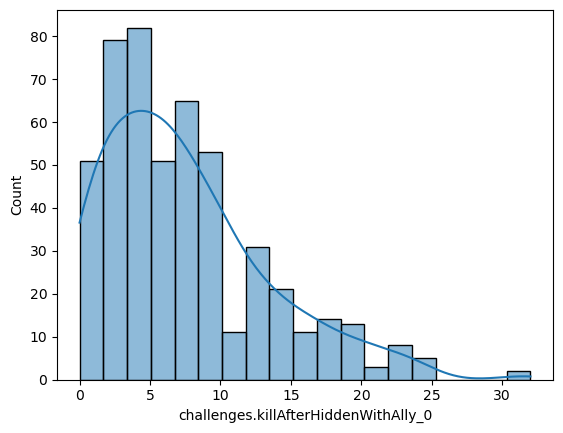

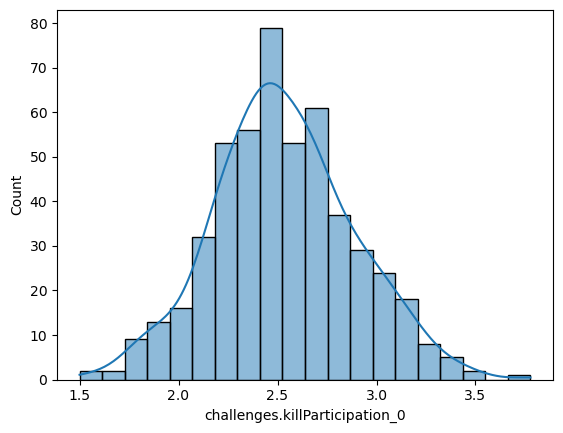

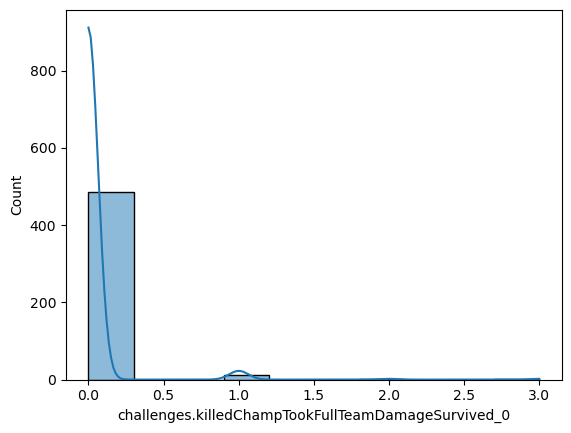

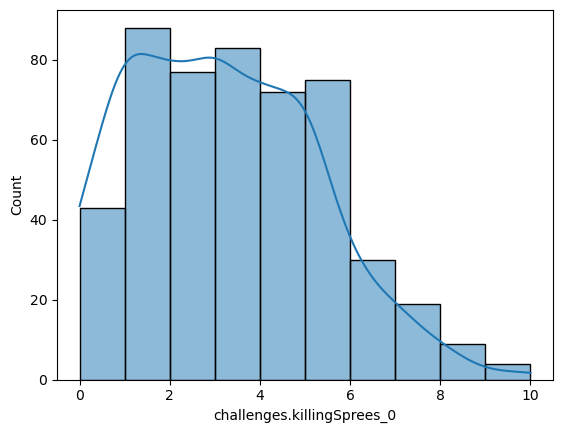

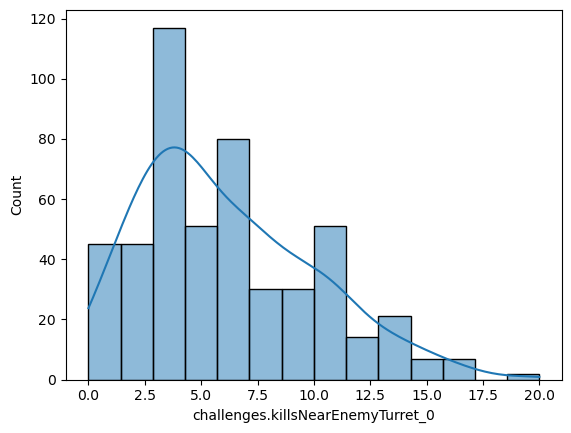

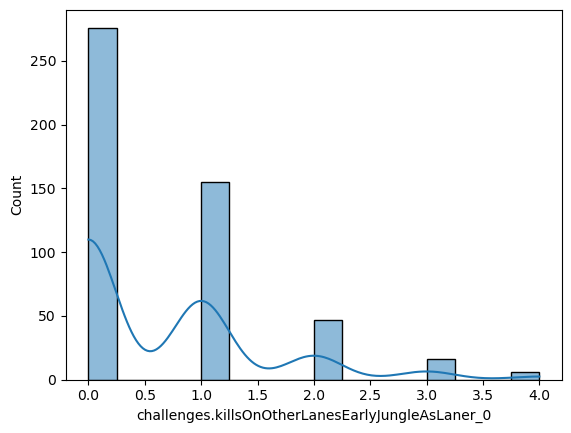

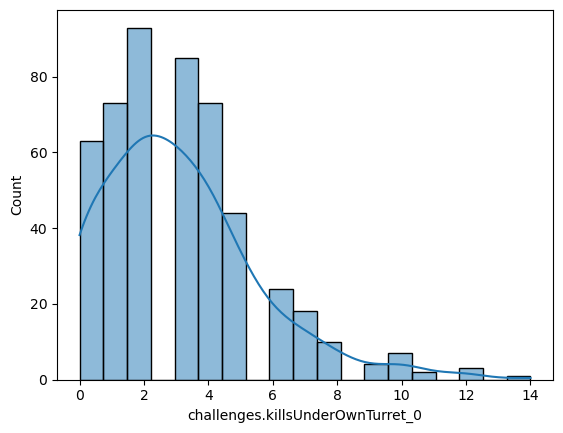

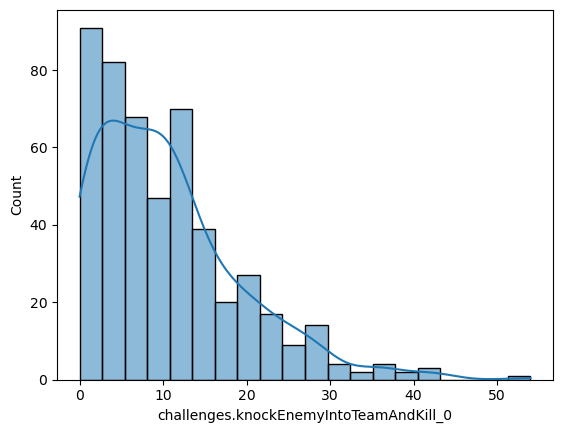

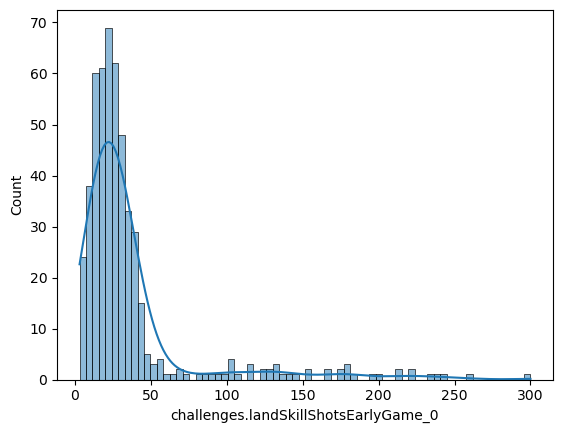

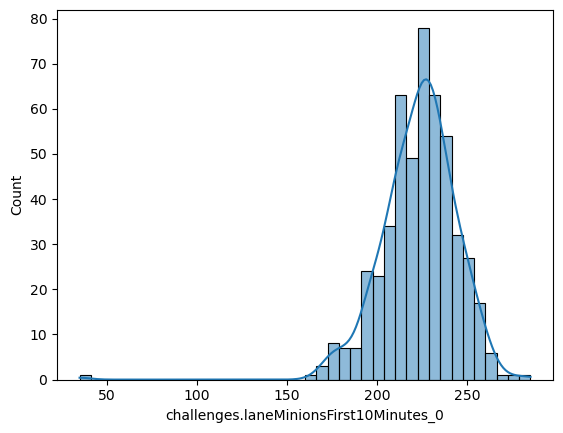

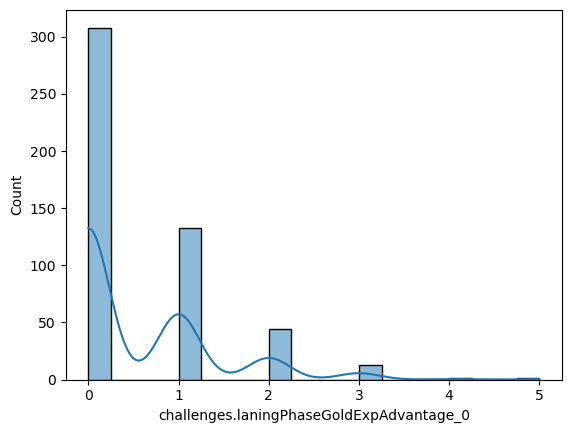

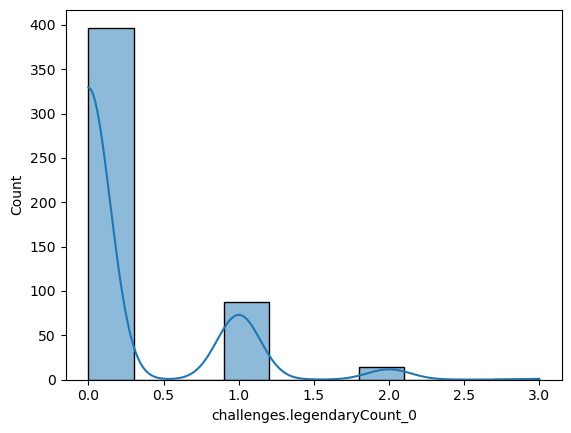

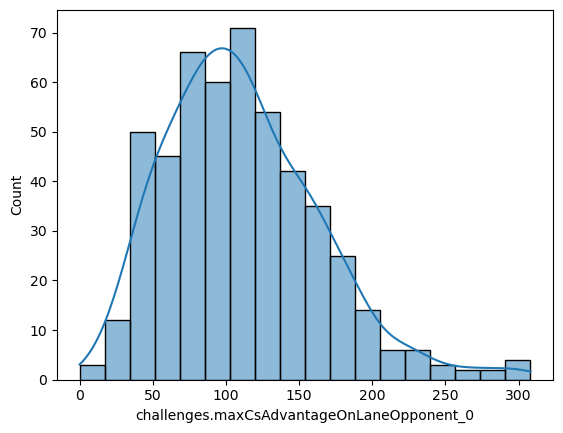

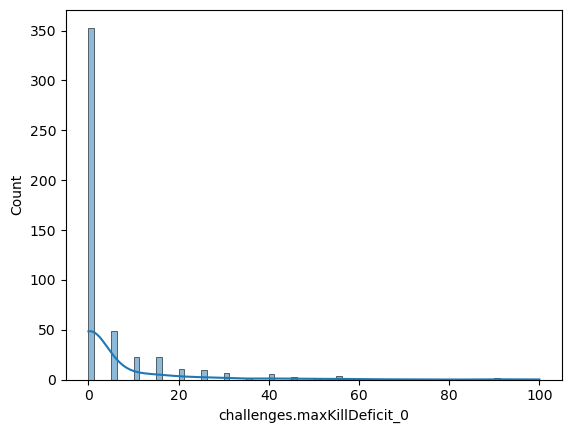

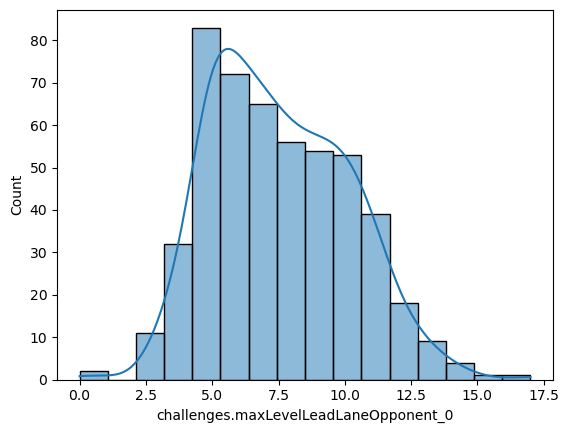

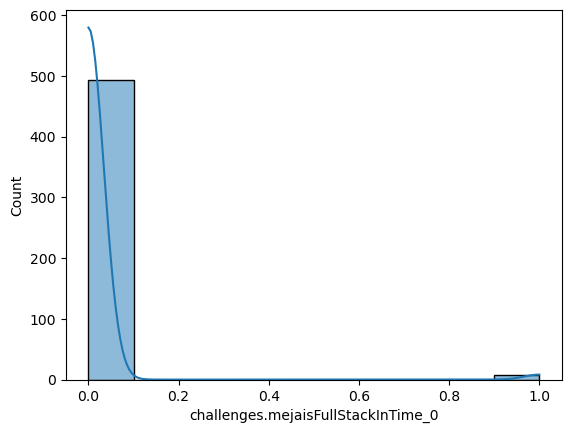

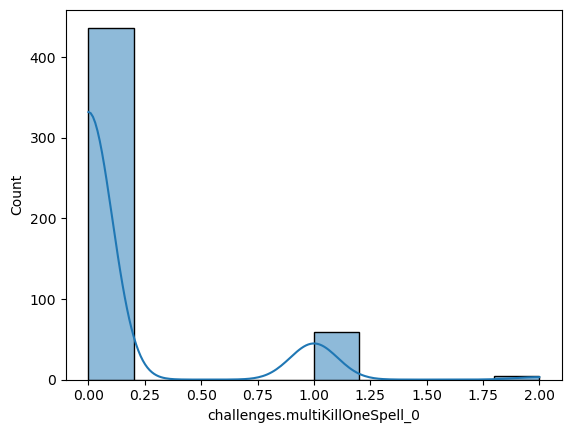

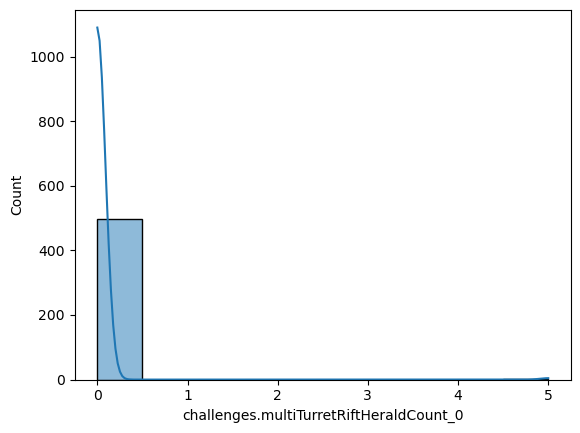

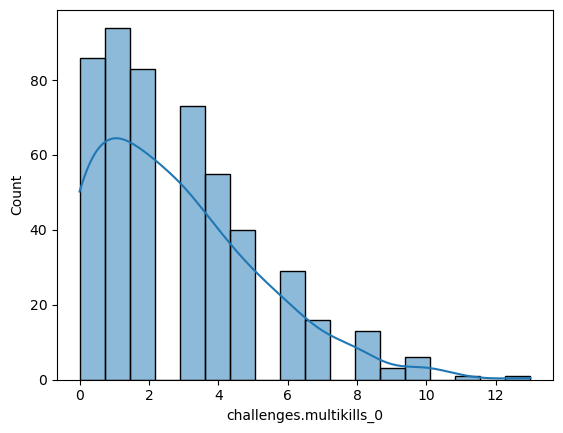

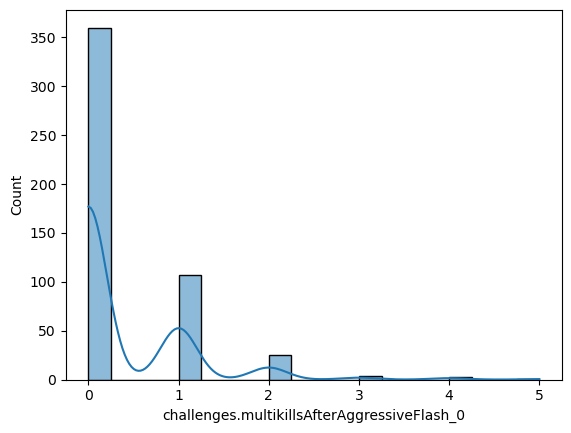

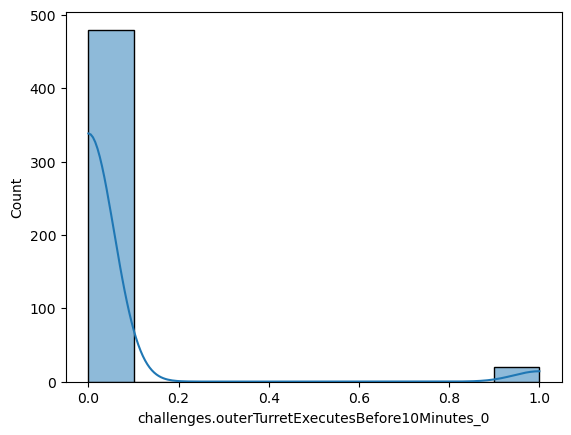

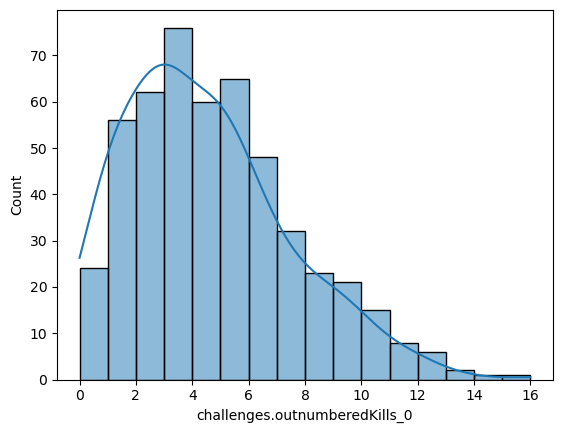

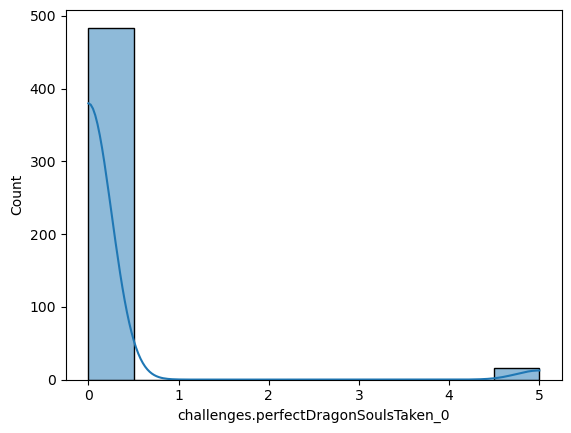

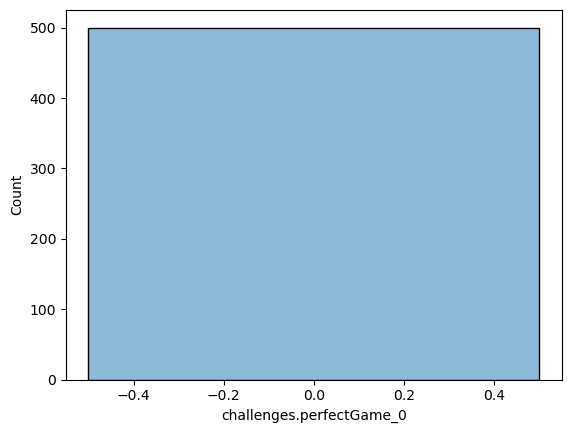

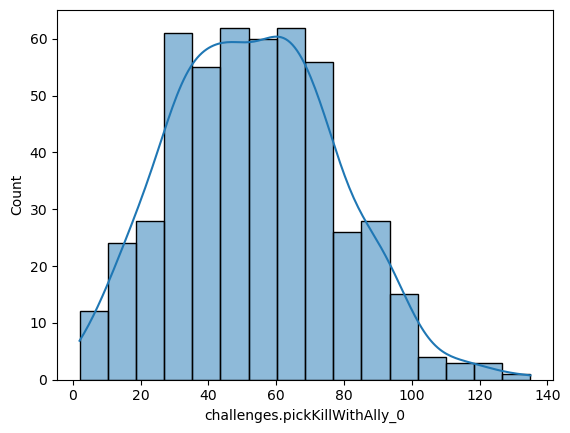

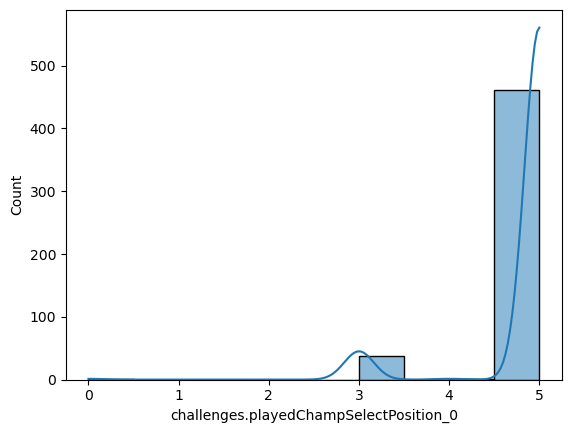

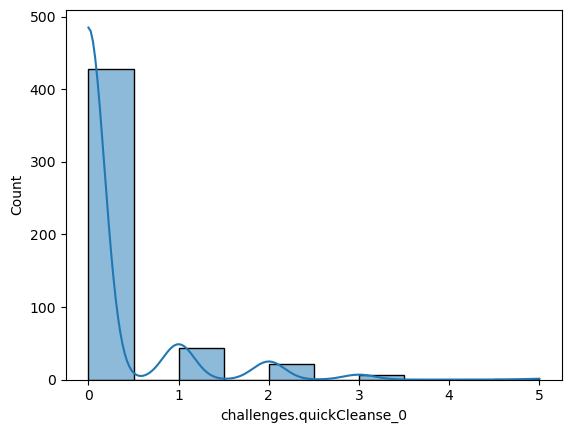

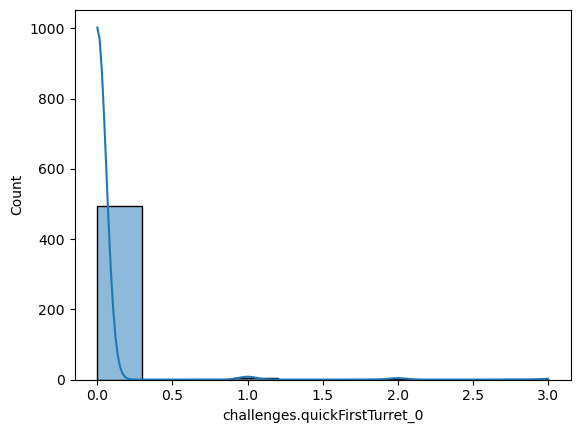

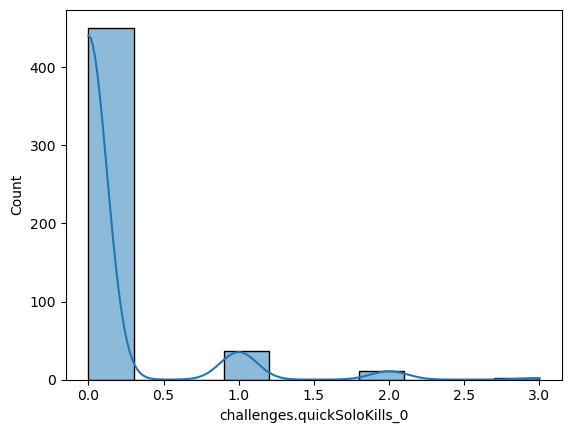

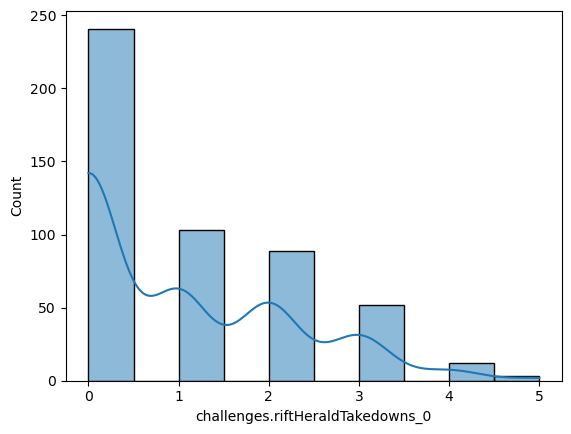

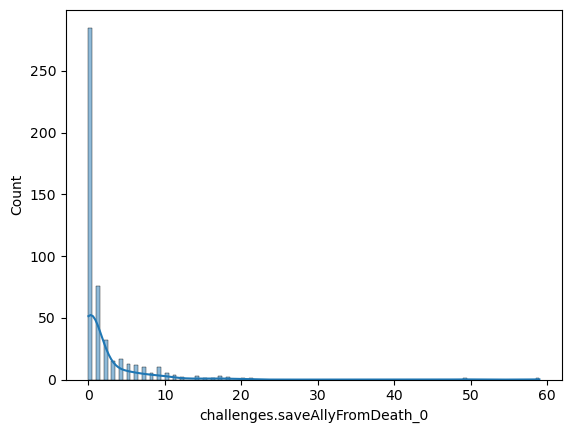

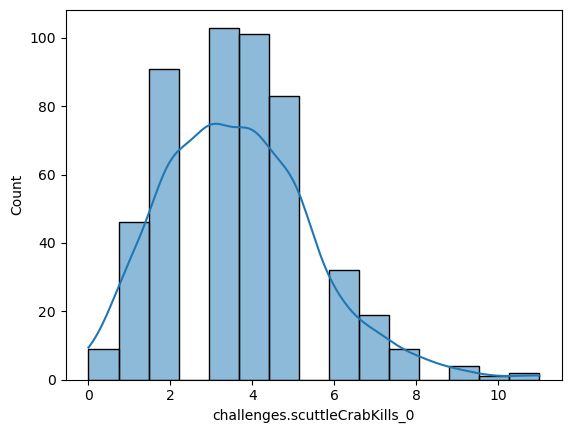

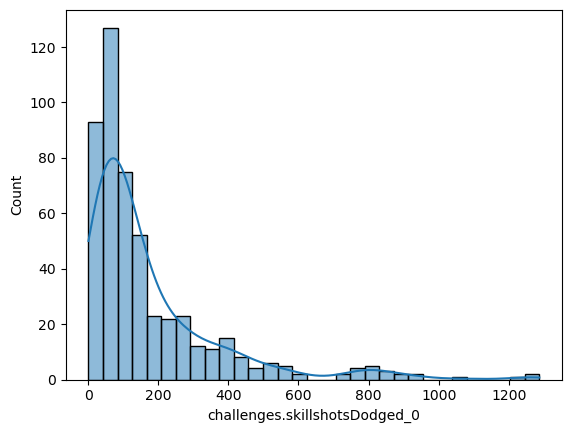

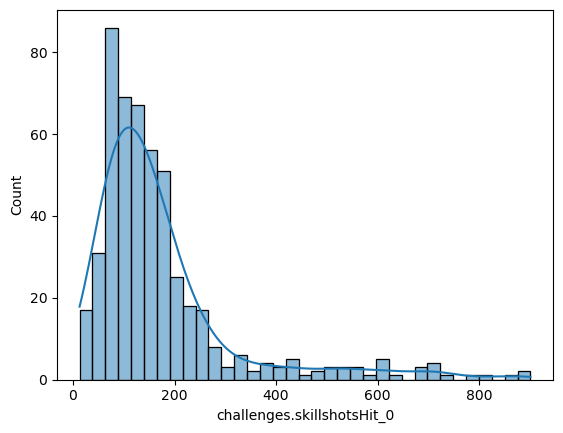

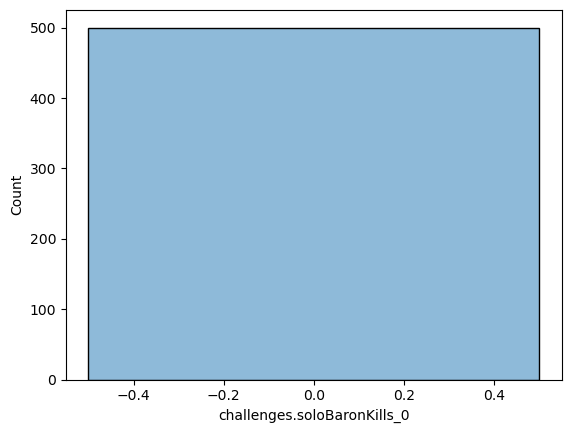

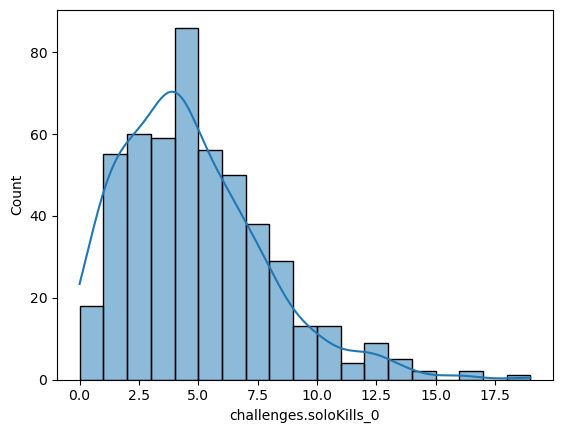

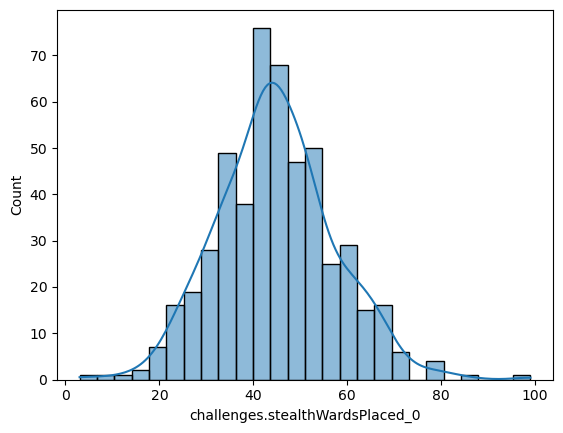

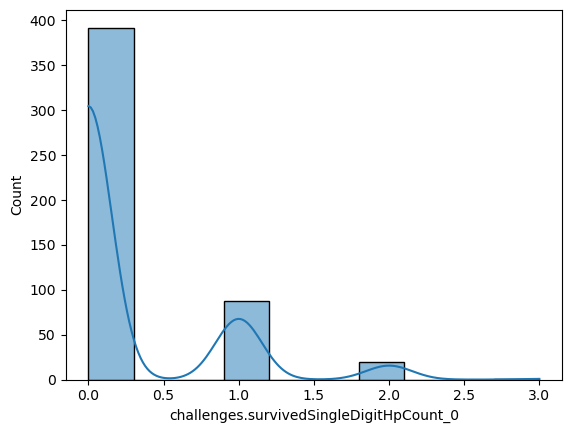

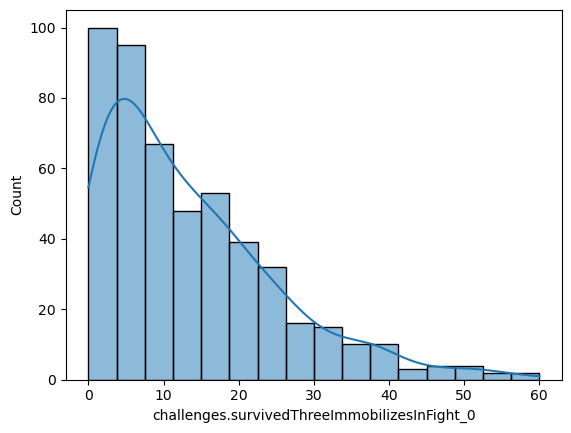

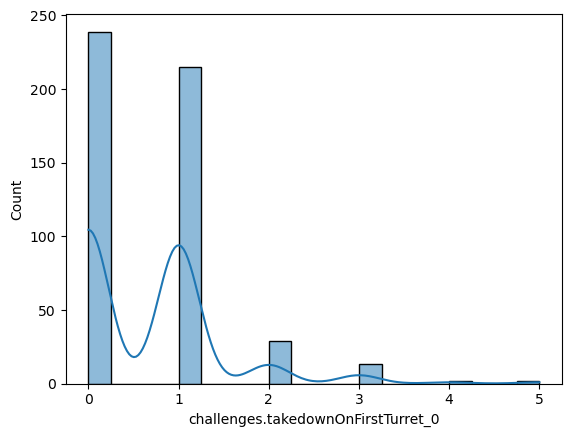

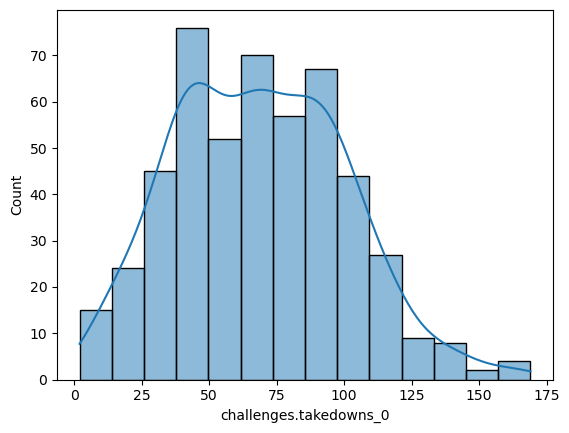

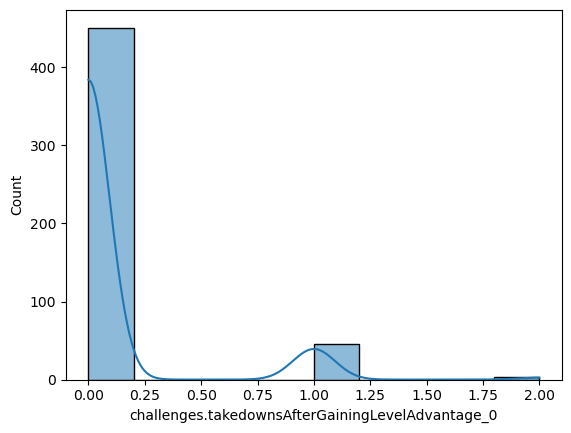

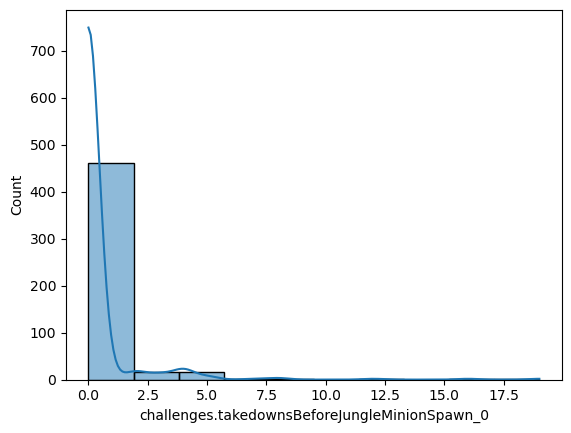

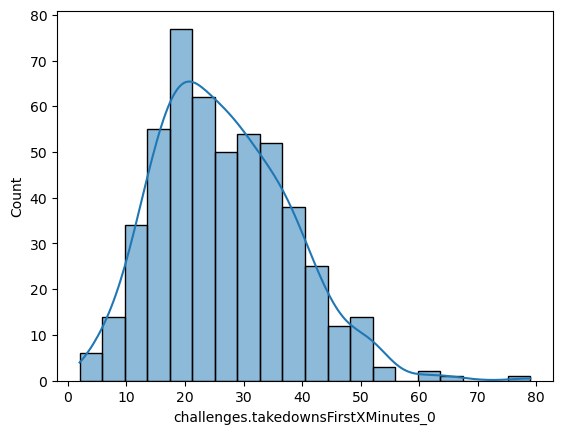

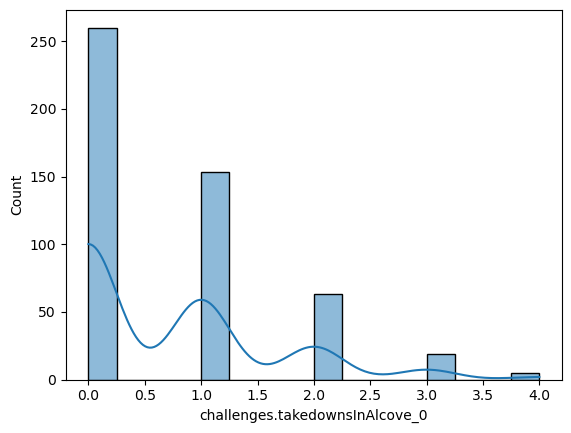

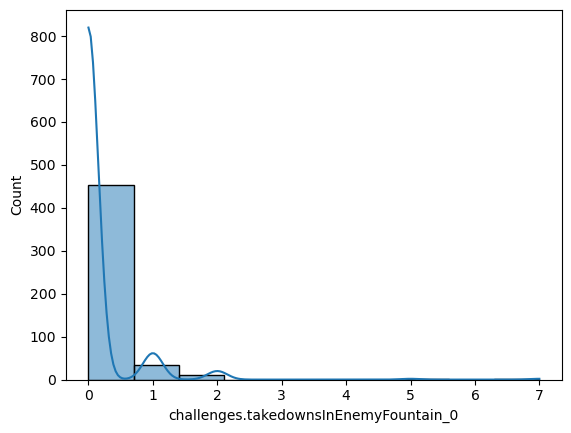

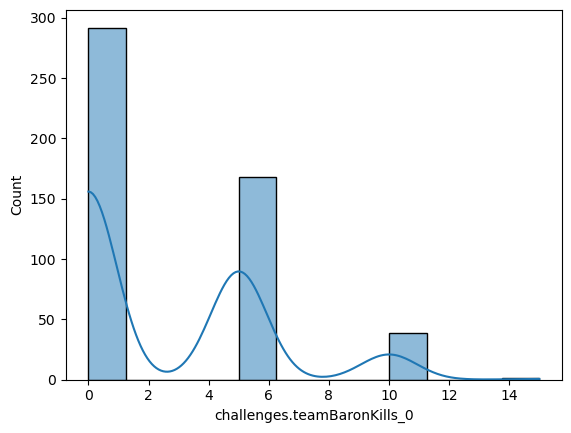

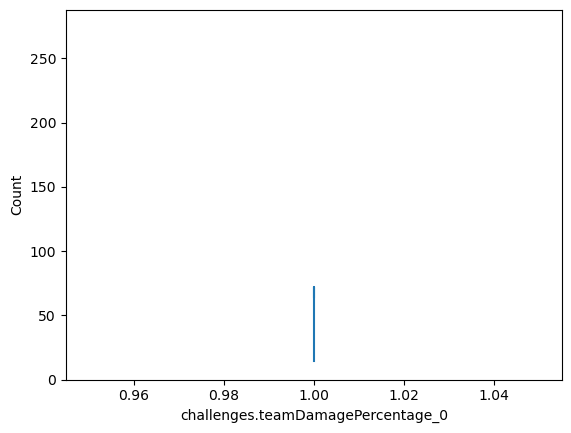

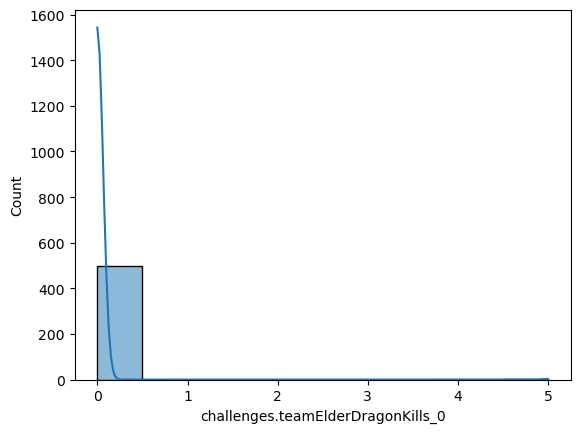

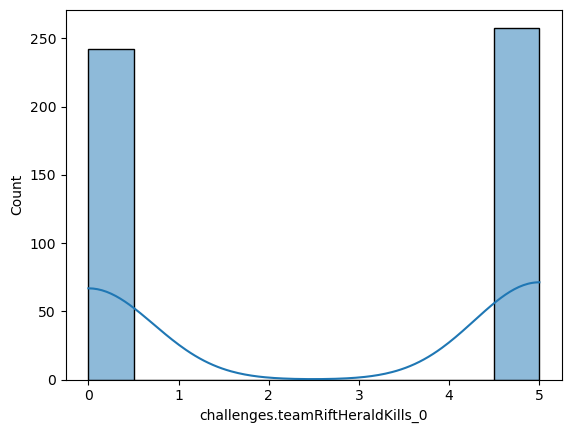

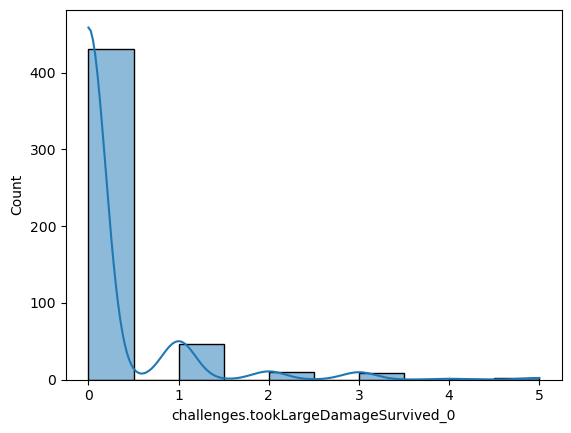

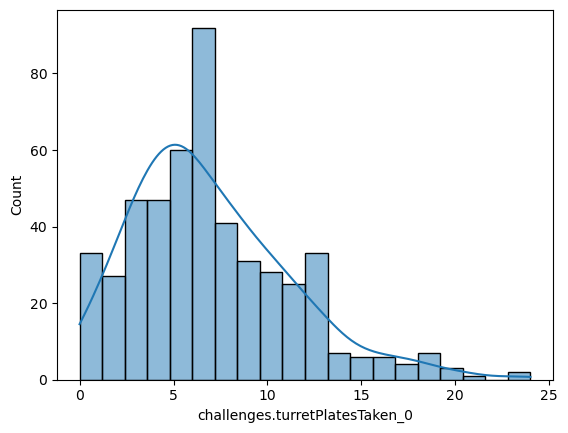

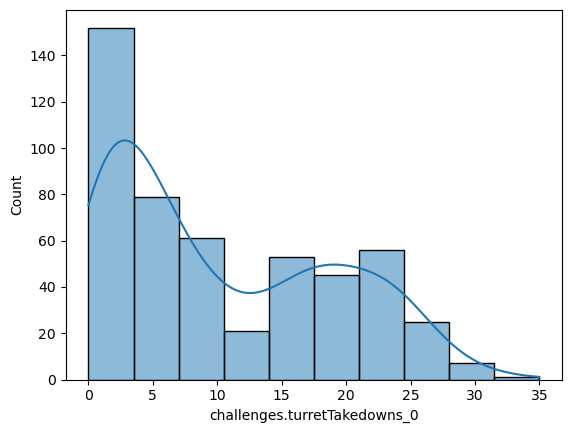

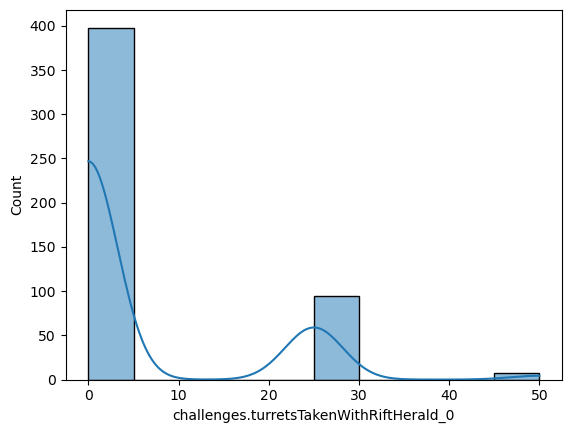

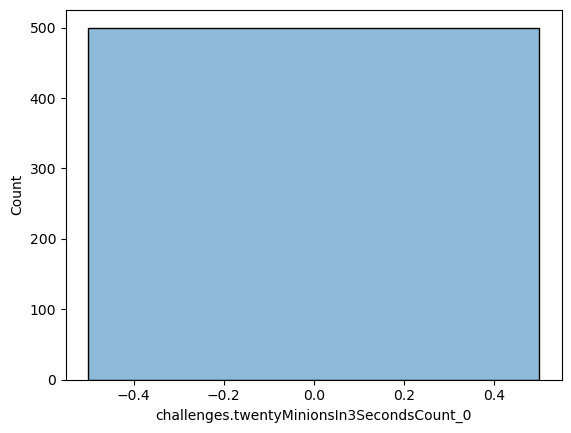

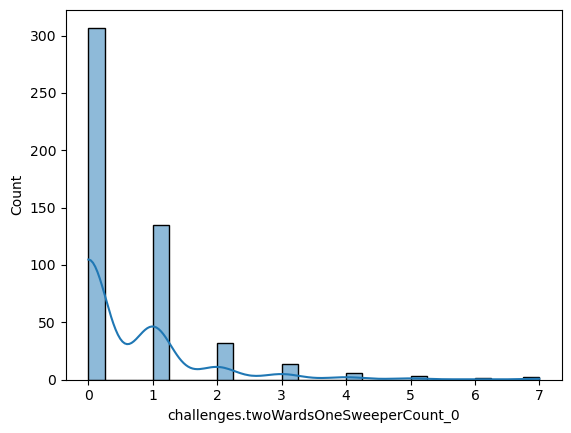

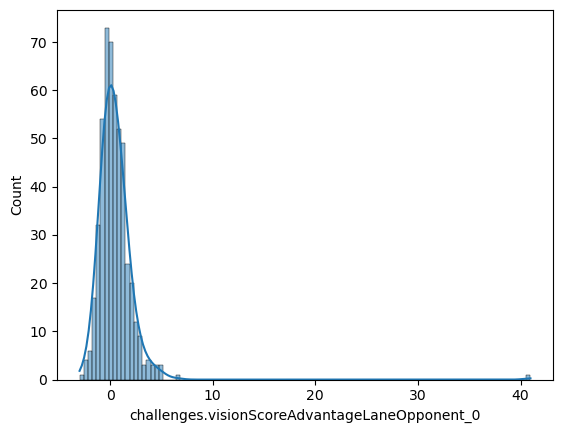

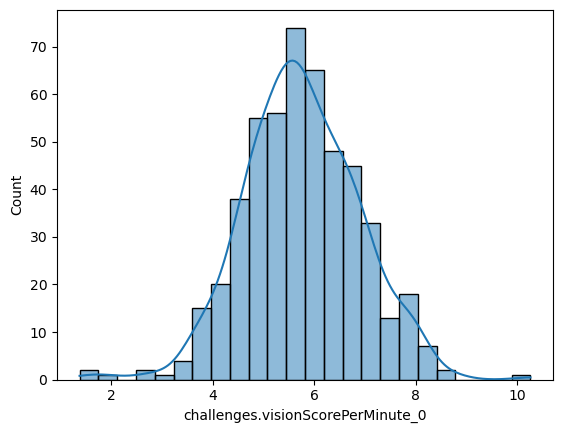

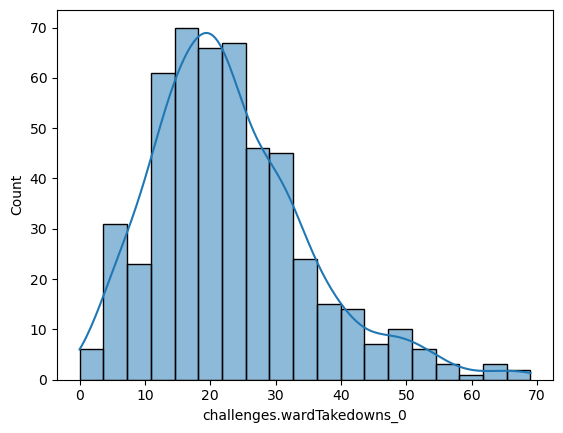

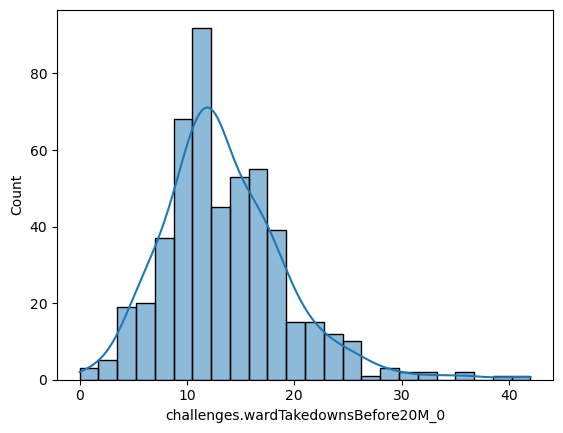

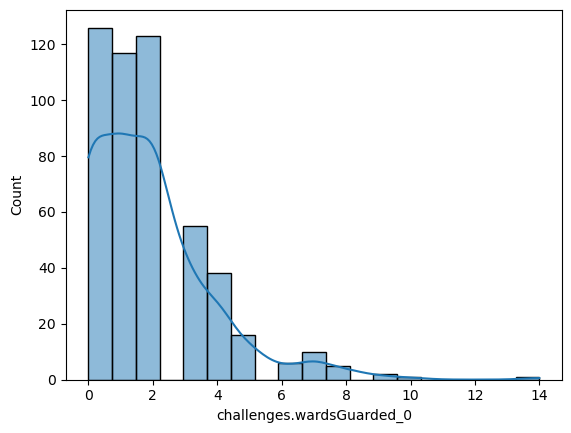

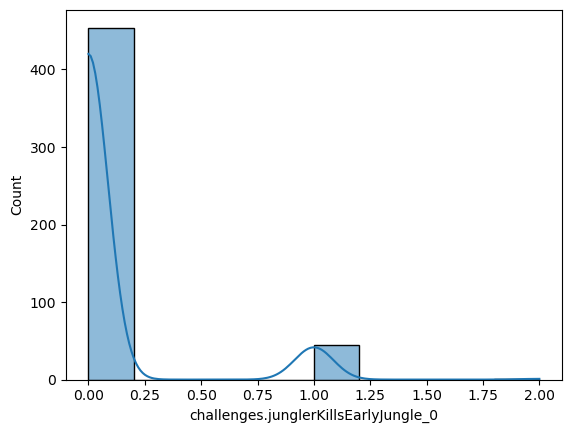

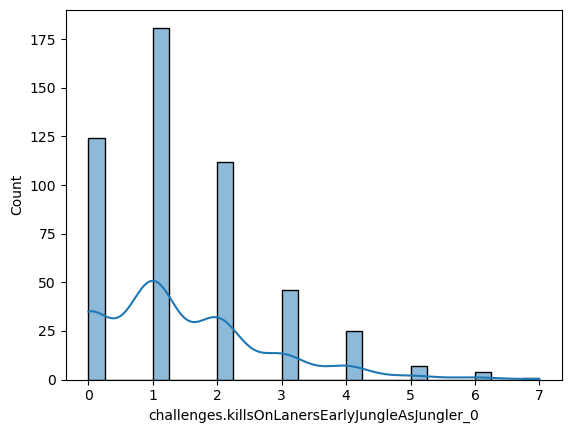

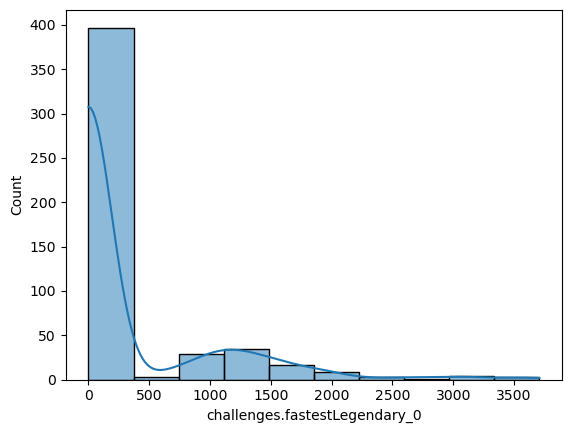

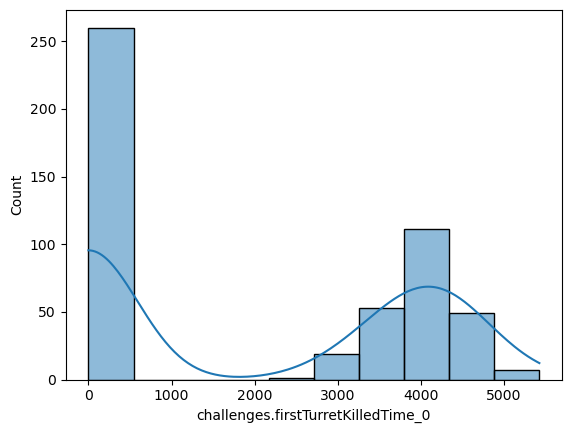

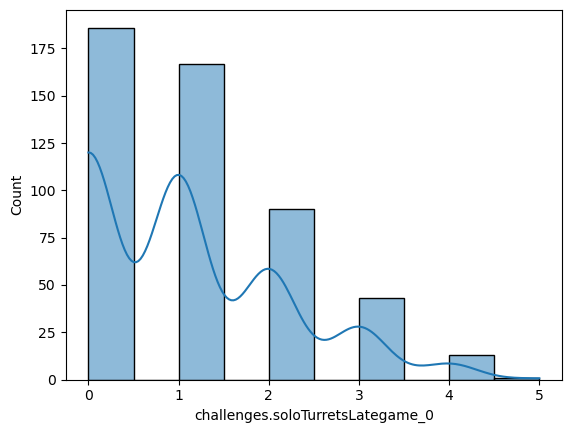

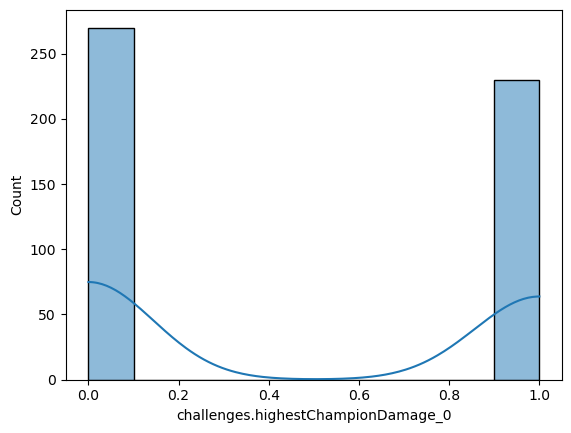

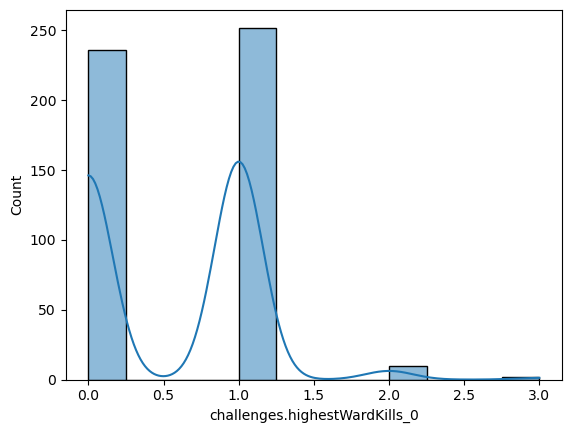

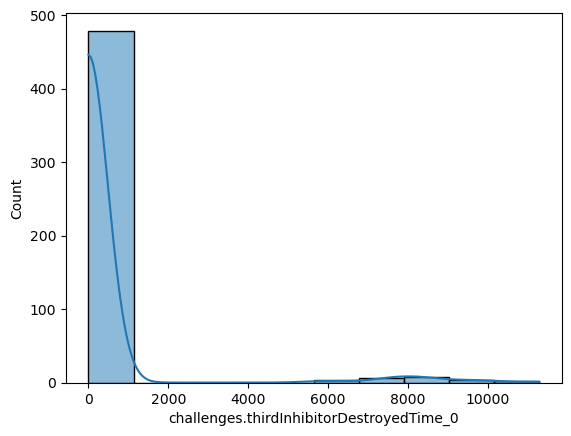

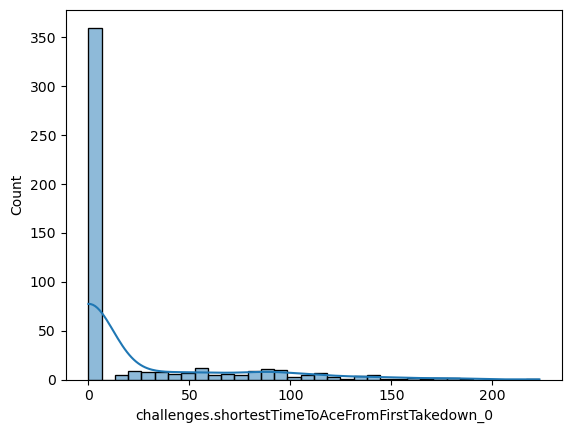

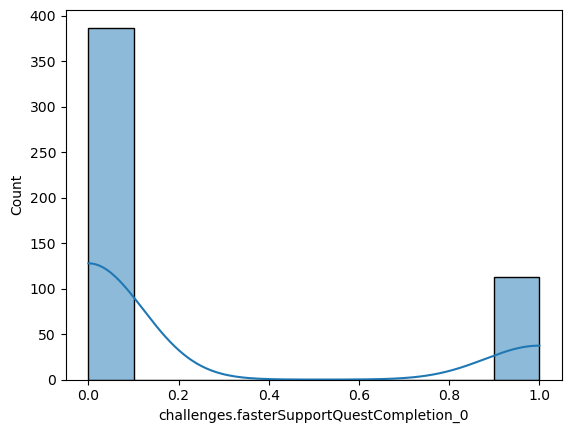

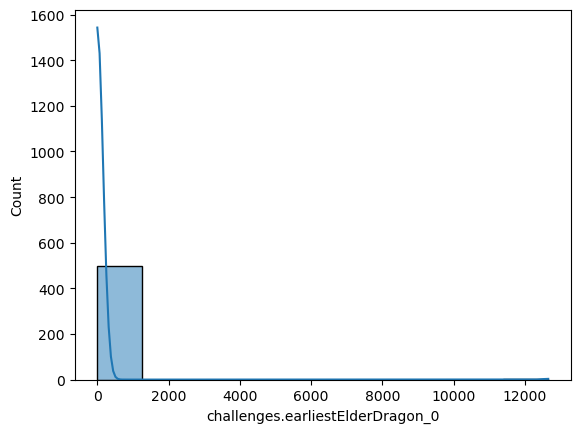

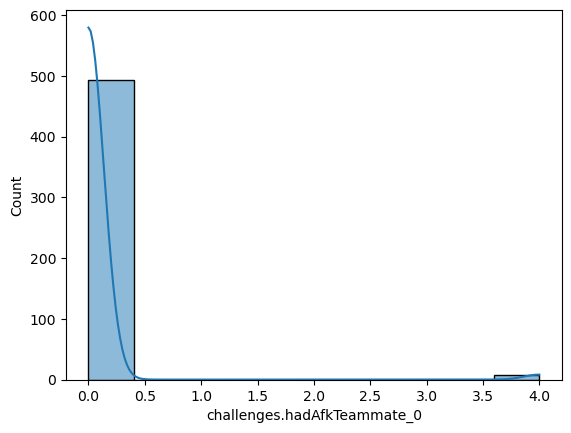

In [15]:
#We take the first half of the dataset to display variables distribution with seaborn
#display the distribution of the variables + the target

for i in range(len(data.columns)//2):
    sns.histplot(data_sample[data_sample.columns[i]], kde=True)
    plt.show()


In [80]:
data_to_display.describe()

allInPings_0  assistMePings_0    assists_0  baronKills_0  basicPings_0  \
count   3843.000000      3843.000000  3843.000000   3843.000000        3843.0   
mean       4.594067        24.534999    40.069737      0.480094           0.0   
std        5.829986        17.831737    20.668307      0.634187           0.0   
min        0.000000         0.000000     0.000000      0.000000           0.0   
25%        1.000000        12.000000    24.000000      0.000000           0.0   
50%        3.000000        20.000000    38.000000      0.000000           0.0   
75%        6.000000        33.000000    55.000000      1.000000           0.0   
max       76.000000       173.000000   114.000000      3.000000           0.0   

       bountyLevel_0  champExperience_0  champLevel_0  championTransform_0  \
count    3843.000000        3843.000000   3843.000000          3843.000000   
mean        4.900859       60266.040333     68.037731             0.098361   
std         5.906816       17925.609806     11.752806             0.424037   
min         0.000000           0.000000      5.000000             0.000000   
25%         0.000000       47991.500000     61.000000             0.000000   
50%         2.000000       60638.000000     69.000000             0.000000   
75%         9.000000       71865.000000     76.000000             0.000000   
max        28.000000      136150.000000     90.000000             2.000000   

       commandPings_0  ...  challenges.fastestLegendary_0  \
count     3843.000000  ...                    3843.000000   
mean        46.144418  ...                     305.562187   
std         24.790097  ...                     625.266087   
min          0.000000  ...                       0.000000   
25%         28.000000  ...                       0.000000   
50%         42.000000  ...                       0.000000   
75%         60.000000  ...                       0.000000   
max        199.000000  ...                    3927.783002   

       challenges.firstTurretKilledTime_0  challenges.soloTurretsLategame_0  \
count                         3843.000000                       3843.000000   
mean                          1864.116428                          1.021858   
std                           2021.383312                          1.086829   
min                              0.000000                          0.000000   
25%                              0.000000                          0.000000   
50%                              0.000000                          1.000000   
75%                           4006.667731                          2.000000   
max                           5529.415284                          6.000000   

       challenges.highestChampionDamage_0  challenges.highestWardKills_0  \
count                         3843.000000                    3843.000000   
mean                             0.456935                       0.583138   
std                              0.498207                       0.572715   
min                              0.000000                       0.000000   
25%                              0.000000                       0.000000   
50%                              0.000000                       1.000000   
75%                              1.000000                       1.000000   
max                              1.000000                       3.000000   

       challenges.thirdInhibitorDestroyedTime_0  \
count                               3843.000000   
mean                                 432.652489   
std                                 1878.250240   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                13056.566693   

       challenges.shortestTimeToAceFromFirstTakedown_0  \
count                                      3843.000000   
mean                                         24.567

In [81]:
sns.pairplot(data_to_display)

: 

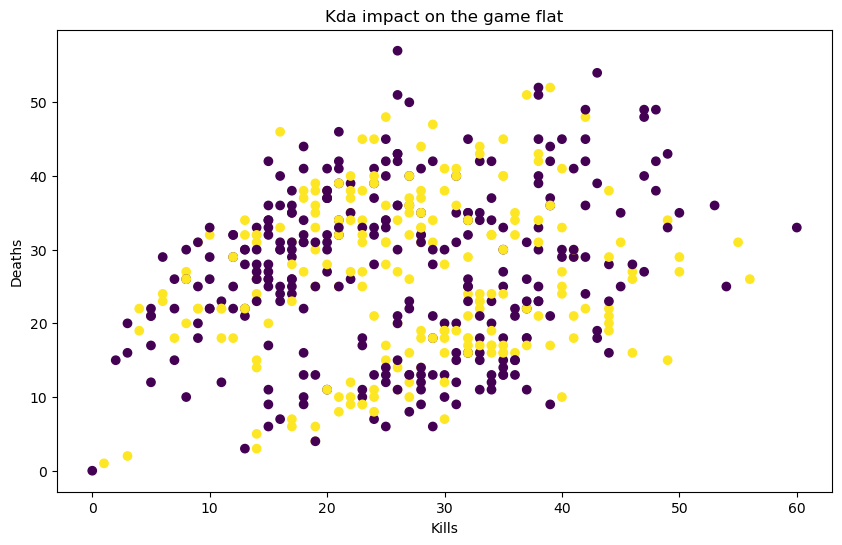

In [40]:
#Plot the data
plt.figure(figsize=(10,6))
plt.title('Kda impact on the game flat')

plt.scatter(data_sample['kills_0'], data_sample['deaths_0'], c=target_sample, cmap='viridis')
plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.show()

On observe que les kills d'une équipe en particulièe ne donne pas réellement d'informations à priori. C'est normal, toutes les parties ont des rythmes différentes, on peut très bien gagner dans une game passive et perdre dans une game à haute intensité. On va donc recommencer mais cette fois on prend en compte le temps de jeu de la partie.

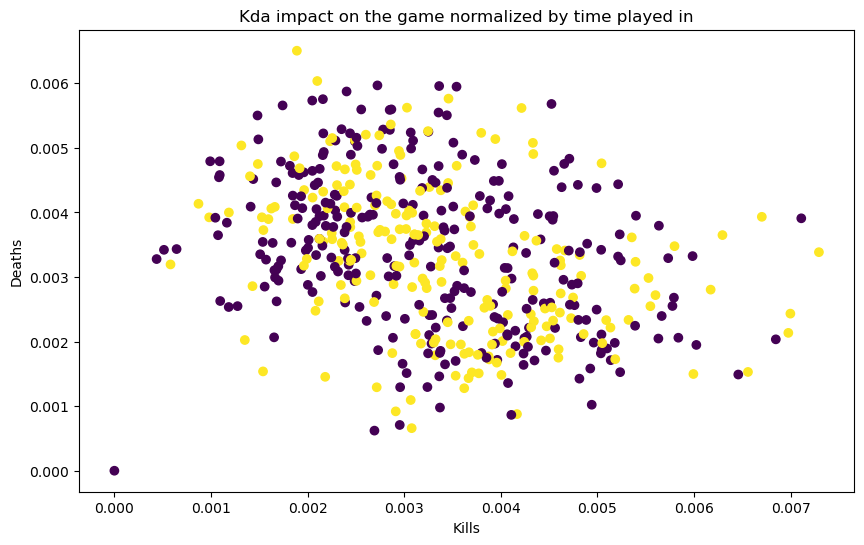

In [55]:
#Plot the data
plt.figure(figsize=(10,6))
plt.title('Kda impact on the game normalized by time played in')
plt.scatter(data_sample['kills_0'] / data_sample['timePlayed_0'], data_sample['deaths_0']/data_sample['timePlayed_0'], c=target_sample, cmap='viridis')
plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.show()

Le kda d'une équipe n'a pas l'air d'avoir temps d'impact même si on observe quand même groupes de défaites et de victoire. On affiche les mêmes valeurs en fonction du nombre de kills totaux dans la game

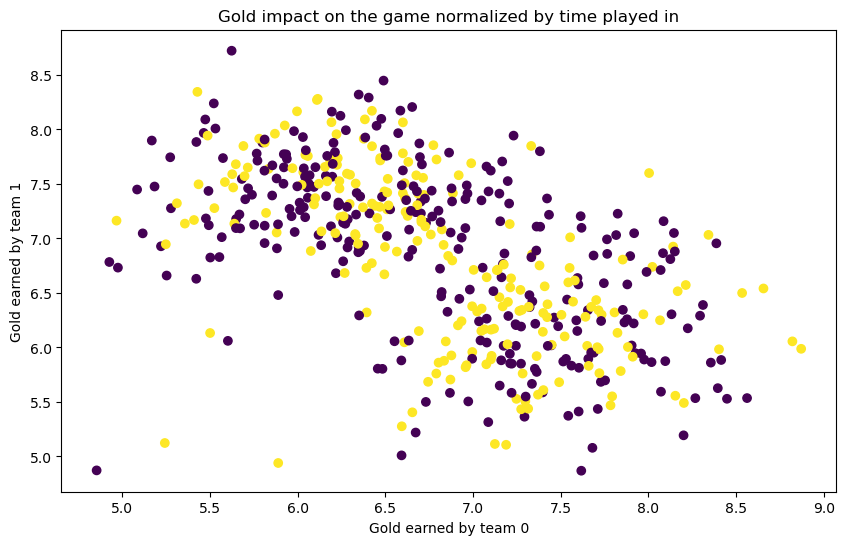

In [56]:
#Impact of golds on the game normalized by time played in
plt.figure(figsize=(10,6))
plt.title('Gold impact on the game normalized by time played in')
plt.scatter(data_sample['goldEarned_0']/data_sample['timePlayed_0'], data_sample['goldEarned_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Gold earned by team 0')
plt.ylabel('Gold earned by team 1')
plt.show()

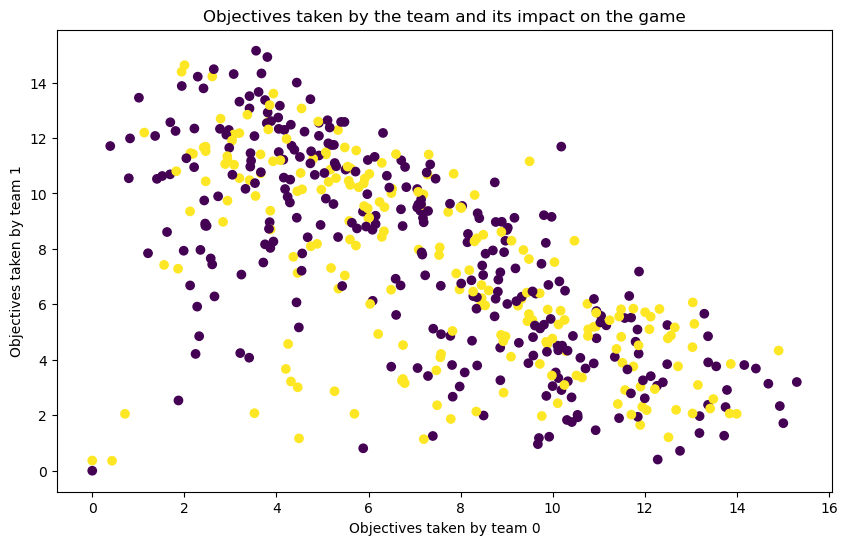

In [60]:
#Objectives taken by the teams normalized by time played in
plt.figure(figsize=(10,6))
plt.title('Objectives taken by the team and its impact on the game')
plt.scatter(data_sample['damageDealtToObjectives_0']/data_sample['timePlayed_0'], data_sample['damageDealtToObjectives_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Objectives taken by team 0')
plt.ylabel('Objectives taken by team 1')
plt.show()

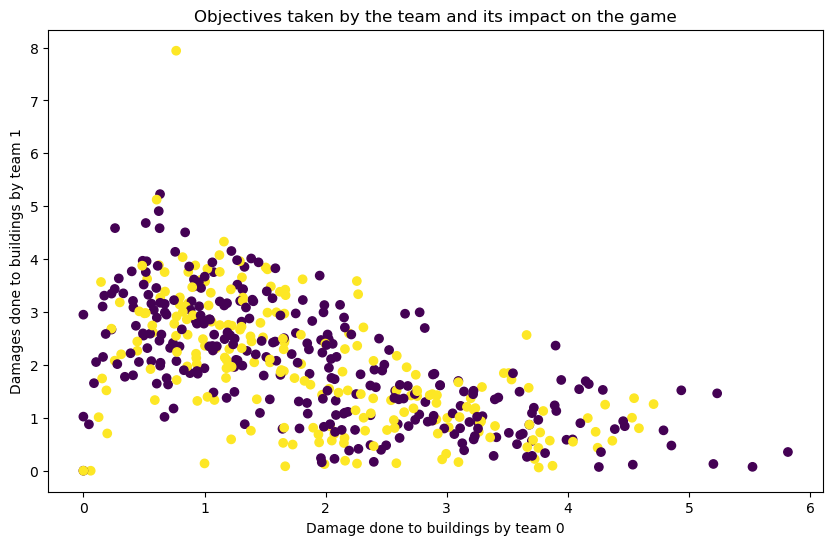

In [62]:
#Damages to buildings by teams and its impact on the game
plt.figure(figsize=(10,6))
plt.title('Objectives taken by the team and its impact on the game')
plt.scatter(data_sample['damageDealtToBuildings_0']/data_sample['timePlayed_0'], data_sample['damageDealtToBuildings_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Damage done to buildings by team 0')
plt.ylabel('Damages done to buildings by team 1')
plt.show()

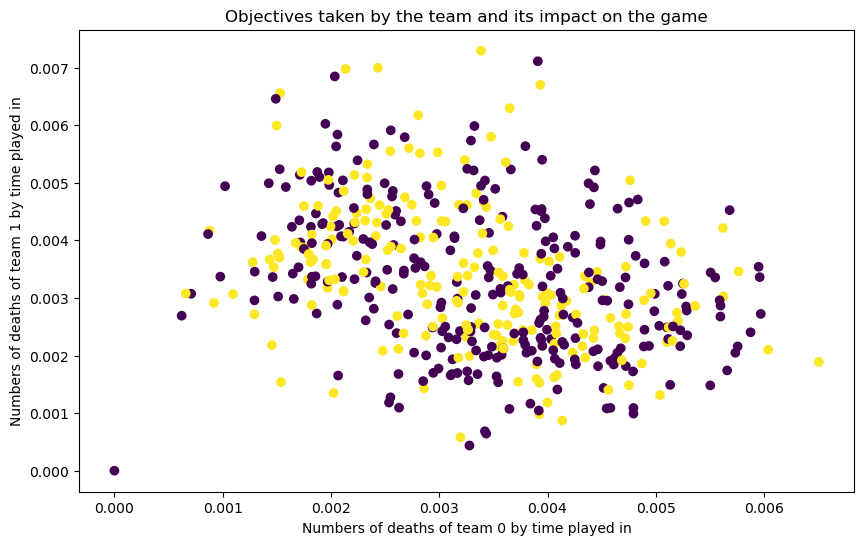

In [72]:
#Numbers of deaths and its impact on the game
plt.figure(figsize=(10,6))
plt.title('Objectives taken by the team and its impact on the game')
plt.scatter(data_sample['deaths_0']/data_sample['timePlayed_0'], data_sample['deaths_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Numbers of deaths of team 0 by time played in')
plt.ylabel('Numbers of deaths of team 1 by time played in')
plt.show()

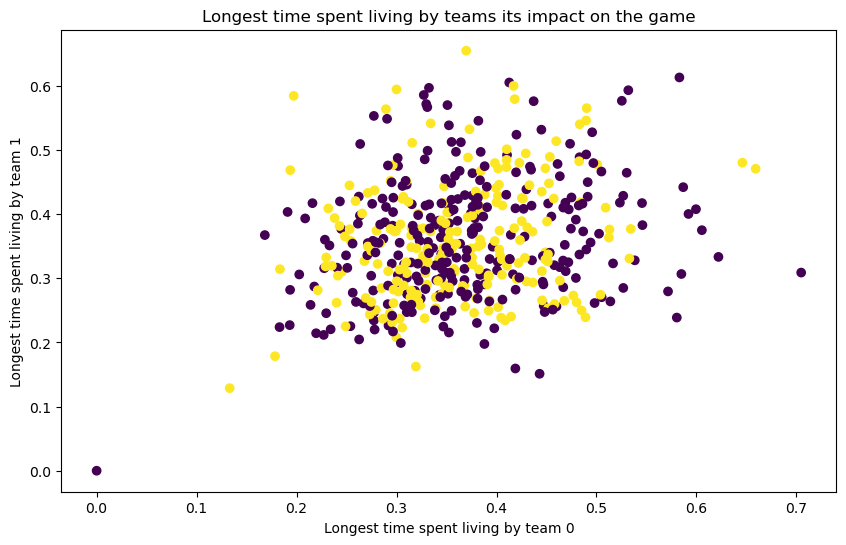

In [75]:
#Longest time alive of a team and its impact on the game
plt.figure(figsize=(10,6))
plt.title('Longest time spent living by teams its impact on the game')
plt.scatter(data_sample['longestTimeSpentLiving_0']/data_sample['timePlayed_0'], data_sample['longestTimeSpentLiving_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Longest time spent living by team 0')
plt.ylabel('Longest time spent living by team 1')
plt.show()

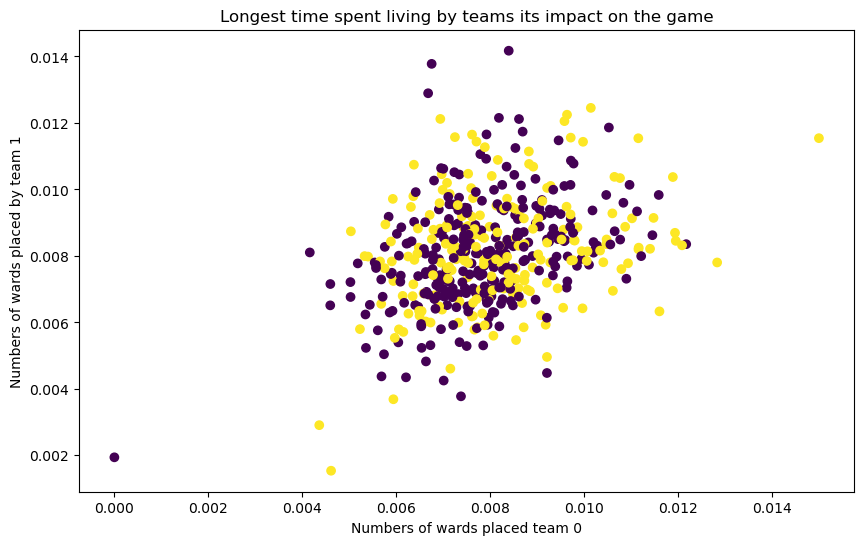

In [78]:
#Wards placed by teams and its impact on the game
plt.figure(figsize=(10,6))
plt.title('Longest time spent living by teams its impact on the game')
plt.scatter(data_sample['wardsPlaced_0']/data_sample['timePlayed_0'], data_sample['wardsPlaced_1']/data_sample['timePlayed_1'], c=target_sample, cmap='viridis')
plt.xlabel('Numbers of wards placed team 0')
plt.ylabel('Numbers of wards placed by team 1')
plt.show()